In [4]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler, RobustScaler
from scipy.stats import zscore



df = pd.read_csv('/content/Imputed_and_cleaned_data.csv', low_memory=False)

# Replace NaN in 'Quarter' column with 0
df['Quarter'] = df['Quarter'].fillna(0)

print(df[['Year', 'Quarter']].head(10))

df.to_csv('/content/Imputed_and_cleaned_data_with_filled_quarter.csv', index=False)

print("Replaced NaN with 0 in 'Quarter' column and saved new file.")


   Year Quarter
0  2021      Q1
1  2021      Q1
2  2021      Q1
3  2021      Q1
4  2021      Q1
5  2021      Q1
6  2021      Q1
7  2021      Q1
8  2021      Q1
9  2021      Q1
Replaced NaN with 0 in 'Quarter' column and saved new file.


<ipython-input-5-b79367514da0>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Imputed_and_cleaned_data_with_filled_quarter.csv')


Shape of the dataset: (874836, 9)

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874836 entries, 0 to 874835
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Country Name        874836 non-null  object 
 1   Country Code        874836 non-null  object 
 2   Series Name         874836 non-null  object 
 3   Series Code         874836 non-null  object 
 4   Quarter             874836 non-null  object 
 5   Value               827640 non-null  float64
 6   Year                874836 non-null  int64  
 7   Source              874836 non-null  object 
 8   Indicator Category  874836 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 60.1+ MB

Missing Value Percentages:
Country Name          0.00000
Country Code          0.00000
Series Name           0.00000
Series Code           0.00000
Quarter               0.00000
Value                 5.39484
Year                  

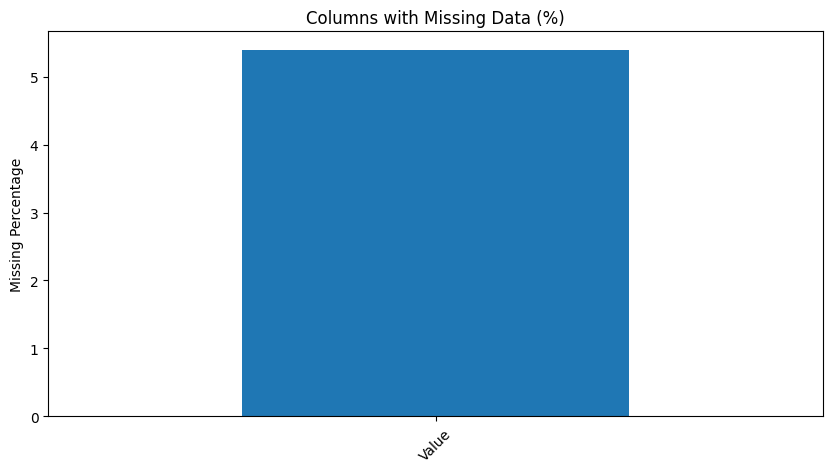

In [5]:
df = pd.read_csv('/content/Imputed_and_cleaned_data_with_filled_quarter.csv')

# Basic Dataset Info
print("Shape of the dataset:", df.shape)
print("\nBasic Info:")
df.info()

# Missing Values
print("\nMissing Value Percentages:")
print(df.isnull().mean() * 100)

# Quick Look at Indicator Categories
print("\nIndicator Category Distribution:")
print(df['Indicator Category'].value_counts())

# Plot missingness
missing_percent = df.isnull().mean() * 100
plt.figure(figsize=(10, 5))
missing_percent[missing_percent > 0].sort_values(ascending=False).plot(kind='bar')
plt.title('Columns with Missing Data (%)')
plt.ylabel('Missing Percentage')
plt.xticks(rotation=45)
plt.show()


In [6]:
# Load the new CSV as Imputed_and_cleaned_data.csv
eda_df = pd.read_csv('/content/Imputed_and_cleaned_data_with_filled_quarter.csv')

# Calculate descriptive statistics for all numeric columns
descriptive_stats_all = eda_df.describe(include='all')

# Display the results
print(descriptive_stats_all)

# Preview again for column types
eda_df.dtypes

<ipython-input-6-e13a86ce9b3e>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  eda_df = pd.read_csv('/content/Imputed_and_cleaned_data_with_filled_quarter.csv')


       Country Name Country Code  \
count        874836       874836   
unique           76           76   
top         Albania          ALB   
freq          11511        11511   
mean            NaN          NaN   
std             NaN          NaN   
min             NaN          NaN   
25%             NaN          NaN   
50%             NaN          NaN   
75%             NaN          NaN   
max             NaN          NaN   

                                              Series Name  \
count                                              874836   
unique                                               2145   
top     Gross PSD, Nonfinancial Public Corp., Short-te...   
freq                                                  912   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%               

Country Name           object
Country Code           object
Series Name            object
Series Code            object
Quarter                object
Value                 float64
Year                    int64
Source                 object
Indicator Category     object
dtype: object

In [7]:
# Set visualization styles
sns.set_style('whitegrid') # Use sns.set_style instead of sns.style.use
sns.set_palette("Set2")

df = pd.read_csv('/content/Imputed_and_cleaned_data_with_filled_quarter.csv', low_memory=False)

# Basic information
print(f"Dataset shape: {df.shape}")
print(f"Number of countries: {df['Country Name'].nunique()}")
print(f"Number of indicators: {df['Series Name'].nunique()}")
print(f"Year range: {df['Year'].min()} to {df['Year'].max()}")
print(f"Indicator categories: {df['Indicator Category'].unique()}")

# Check data types and summary statistics
print(df.dtypes)
print(df['Value'].describe())

# Check distribution of values by category
for category in df['Indicator Category'].unique():
    print(f"\nSummary statistics for {category}:")
    print(df[df['Indicator Category'] == category]['Value'].describe())

Dataset shape: (874836, 9)
Number of countries: 76
Number of indicators: 2145
Year range: 2021 to 2023
Indicator categories: ['Financial_Indicators' 'Economical_Indicators' 'Public_Debt_Indicators'
 'Environmental_Indicators' 'Social_Indicators' 'Statistical_Indicators'
 'Uncategorized']
Country Name           object
Country Code           object
Series Name            object
Series Code            object
Quarter                object
Value                 float64
Year                    int64
Source                 object
Indicator Category     object
dtype: object
count    8.276400e+05
mean     1.432625e+13
std      2.068123e+14
min     -5.382066e+14
25%      4.590160e+00
50%      1.347209e+02
75%      3.636098e+10
max      2.089238e+16
Name: Value, dtype: float64

Summary statistics for Financial_Indicators:
count    1.812600e+05
mean     3.325530e+12
std      9.413603e+13
min     -8.978182e+13
25%      6.523444e+00
50%      6.928096e+08
75%      3.365273e+10
max      9.742247e+15
N

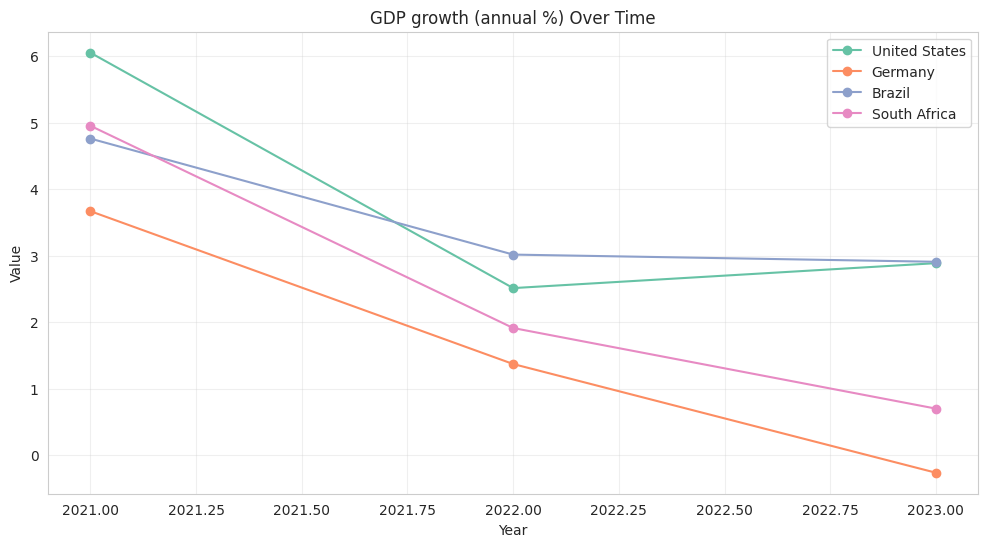

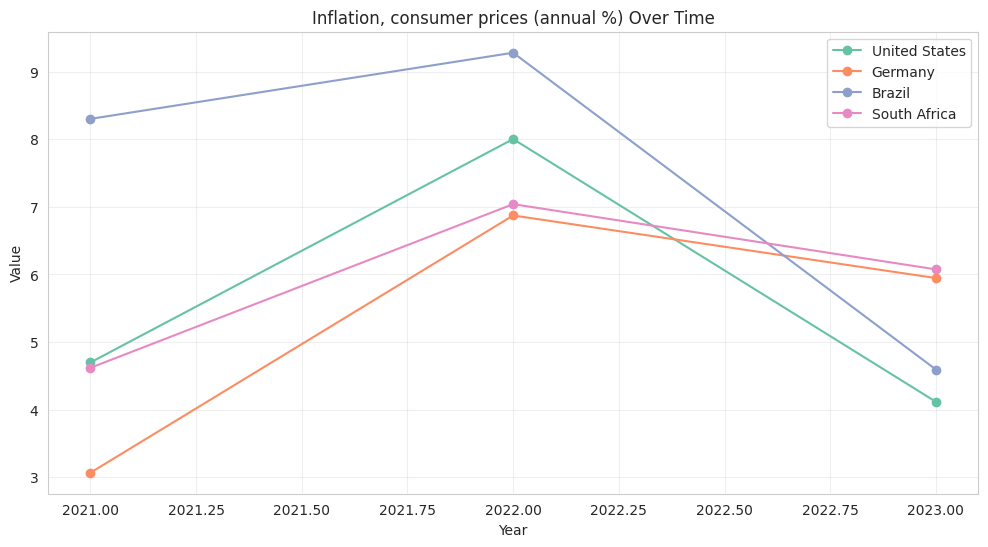

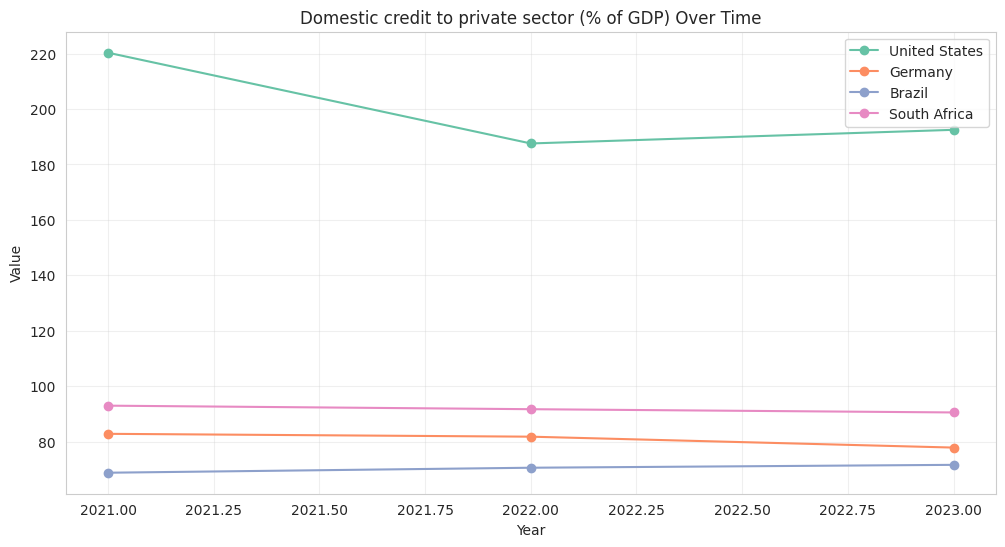

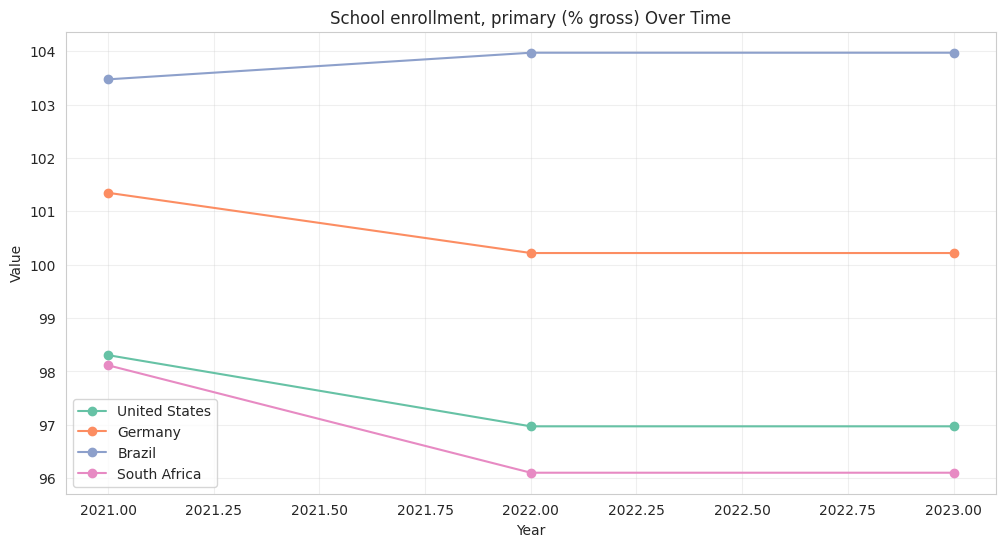

In [8]:
key_indicators = {
    'Economic': ['GDP growth (annual %)', 'Inflation, consumer prices (annual %)'],
    'Financial': ['Domestic credit to private sector (% of GDP)'],
    'Social': ['School enrollment, primary (% gross)']
}

for domain, indicators in key_indicators.items():
    for indicator in indicators:
        if indicator in df['Series Name'].unique():
            plt.figure(figsize=(12, 6))

            countries = ['United States', 'Germany', 'Brazil', 'China', 'South Africa']
            countries = [c for c in countries if c in df['Country Name'].unique()]

            plotted_anything = False

            for country in countries:
                data = df[(df['Series Name'] == indicator) & (df['Country Name'] == country)]
                if not data.empty:
                    plt.plot(data['Year'], data['Value'], marker='o', label=country)
                    plotted_anything = True

            if plotted_anything:
                plt.title(f'{indicator} Over Time')
                plt.xlabel('Year')
                plt.ylabel('Value')
                plt.legend()
                plt.grid(True, alpha=0.3)

                safe_indicator = indicator.replace(' ', '_').replace('%', '').replace('(', '').replace(')', '')[:30]
                plt.show()
                plt.savefig(f'trend_{safe_indicator}.png')
                plt.close()
            else:
                plt.close()


The four charts showing economic indicators for the United States, Germany, Brazil, and South Africa from 2021 to 2023.
GDP Growth (Figure 1)
The chart shows declining GDP growth across all four countries from 2021 to 2023, though with different trajectories:

United States: Started highest at ~6% in 2021, dropped to ~2.5% in 2022, then recovered slightly to ~3% by 2023
Brazil: Maintained the most stable growth, starting at ~4.7% in 2021, declining to ~3% by 2022, and staying near that level
South Africa: Continuous decline from ~5% in 2021 to less than 1% by 2023
Germany: Most dramatic decline from ~3.7% in 2021 to negative growth (approximately -0.2%) by 2023

Inflation (Figure 2)
All countries show an inflation spike in 2022 followed by moderation:

Brazil: Highest overall inflation, peaking at ~9.3% in 2022 before declining to ~4.5% in 2023
United States: Sharp increase from ~4.7% in 2021 to ~8% in 2022, then declining to ~4.1% in 2023
Germany: Most dramatic rise from ~3.1% in 2021 to ~6.9% in 2022, stabilizing at ~6% in 2023
South Africa: Similar pattern to Germany, rising from ~4.6% to ~7% before settling around ~6.1%

Domestic Credit to Private Sector (Figure 3)
Shows stark differences in financial systems:

United States: Far higher lending levels (~220% of GDP in 2021), declining to ~187% in 2022, slight recovery to ~190% in 2023
South Africa: Stable at ~92% of GDP throughout the period
Germany: Slight decline from ~83% to ~78% of GDP
Brazil: Lowest but stable at ~70% throughout the period

Primary School Enrollment (Figure 4)
Shows divergent educational trends:

Brazil: Highest enrollment rates (above 103%, indicating universal access plus some students outside standard age range), increasing slightly over the period
Germany: Declining from ~101.3% to ~100.2% between 2021-2022, then stabilizing
United States: Decreasing from ~98.3% to ~97% between 2021-2022, then stabilizing
South Africa: Steepest decline from ~98.1% to ~96.1%

These indicators collectively suggest different economic challenges across these nations, with Germany facing the most severe growth slowdown while Brazil maintained more economic stability despite higher inflation.RetryClaude can make mistakes. Please double-check responses.

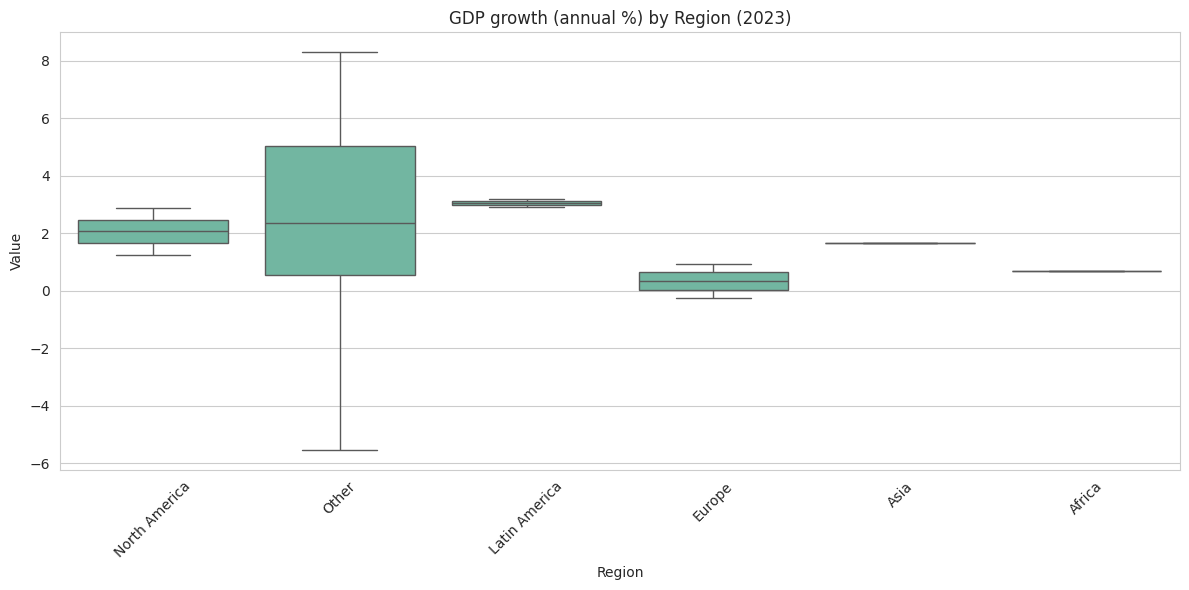

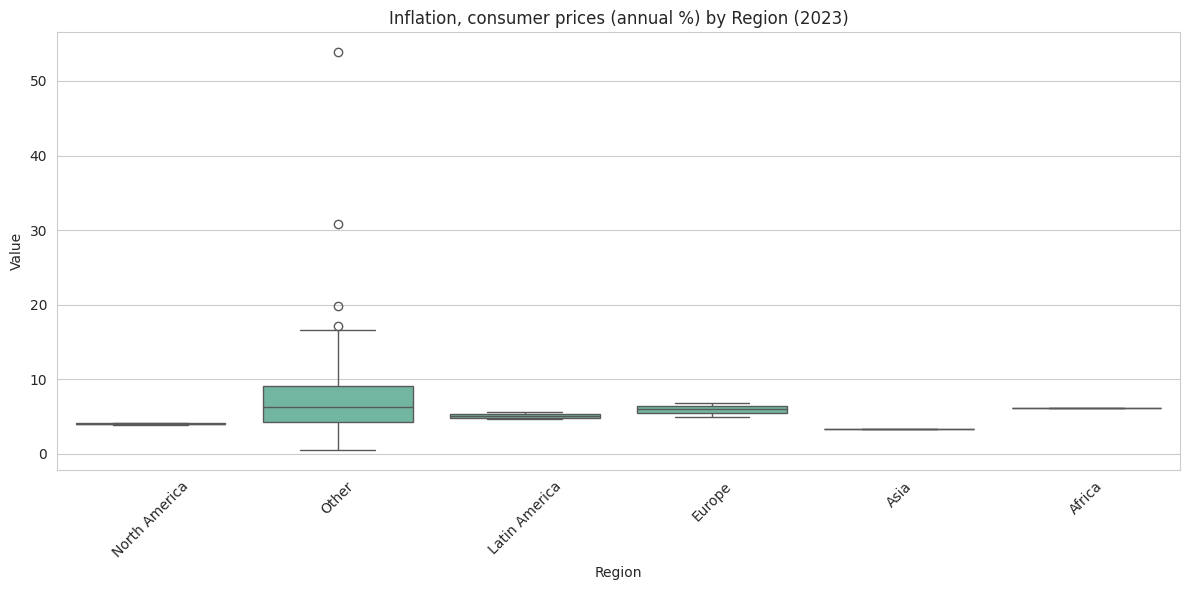

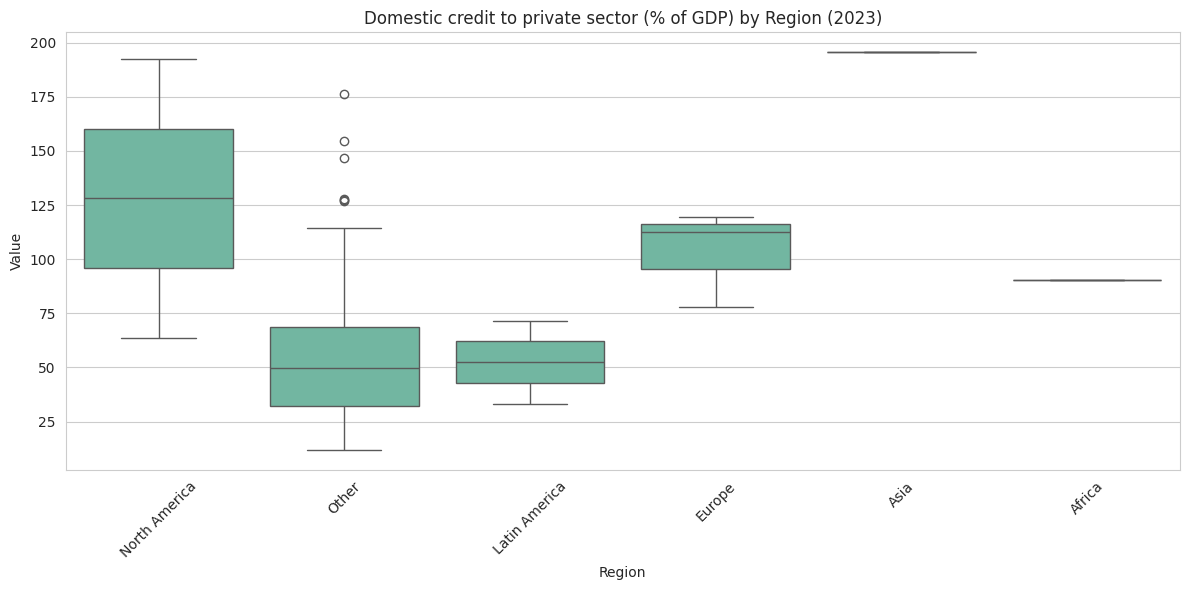

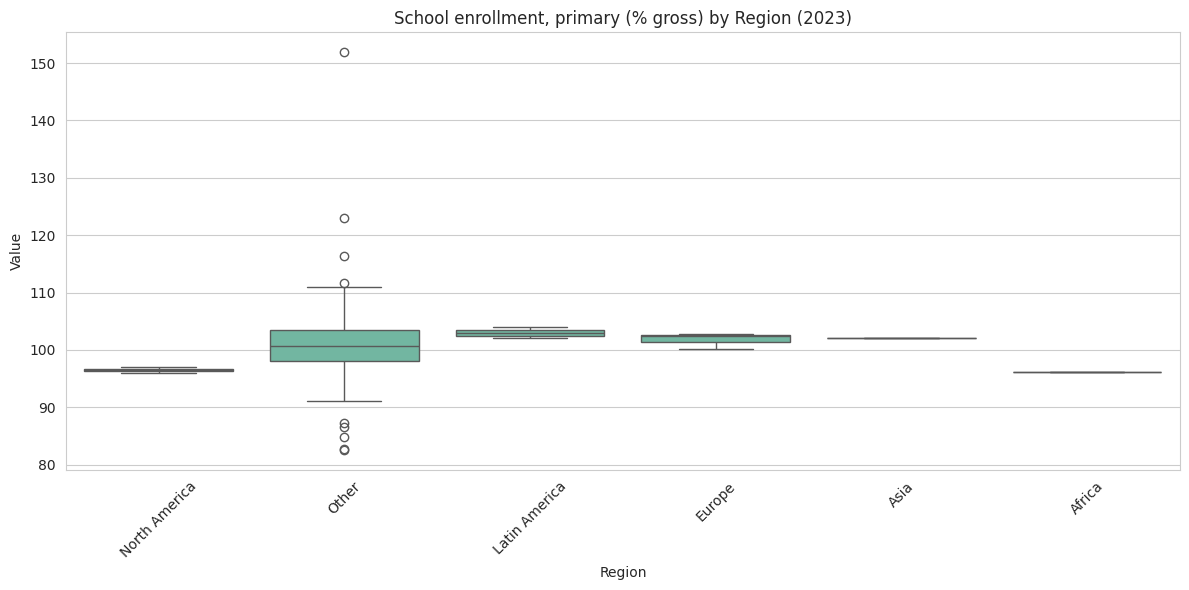

In [9]:
# This is a simplified example
region_mapping = {
    'United States': 'North America', 'Canada': 'North America',
    'Germany': 'Europe', 'France': 'Europe', 'United Kingdom': 'Europe',
    'China': 'Asia', 'Japan': 'Asia', 'India': 'Asia',
    'Brazil': 'Latin America', 'Mexico': 'Latin America',
    'South Africa': 'Africa', 'Nigeria': 'Africa'
}

# Add region column if country is in mapping, otherwise 'Other'
df['Region'] = df['Country Name'].apply(lambda x: region_mapping.get(x, 'Other'))

# Analyze indicators by region
for domain, indicators in key_indicators.items():
    for indicator in indicators:
        if indicator in df['Series Name'].unique():
            # Get most recent year with good coverage
            recent_year = df[df['Series Name'] == indicator]['Year'].max()

            # Create boxplot by region
            plt.figure(figsize=(12, 6))
            region_data = df[(df['Series Name'] == indicator) & (df['Year'] == recent_year)]

            if len(region_data) > 0:
                sns.boxplot(x='Region', y='Value', data=region_data)
                plt.title(f'{indicator} by Region ({recent_year})')
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.show()
                plt.savefig(f'region_{indicator.replace(" ", "_")[:20]}.png')
                plt.close()

The four box plots showing regional economic and social indicators for 2023.
GDP Growth by Region (Figure 1)
This box plot reveals significant regional variations in economic growth for 2023:

Latin America shows the most consistent performance with GDP growth centered around 3%, with minimal variation between countries
North America has moderate growth around 2%, with a relatively narrow range
"Other" region shows the widest variation, ranging from approximately -5.5% to +8.2%, with a median around 2.4%
Europe shows the weakest performance with median growth near 0.5%, with some countries experiencing negative growth
Asia appears to have consistently positive growth around 1.8%
Africa shows growth centered around 0.7%

Inflation by Region (Figure 2)
The inflation data shows distinct patterns across regions:

The "Other" category shows extreme variation with some outliers reaching approximately 53%, suggesting some countries experiencing severe inflation
Europe has consistently elevated inflation around 6%, with relatively low variation
Latin America shows moderate inflation around 5% with limited variation
North America has the lowest inflation rate at approximately 4%
Asia and Africa both show moderate inflation levels around 3-6%

Domestic Credit to Private Sector (Figure 3)
This indicator reveals stark differences in financial system development:

North America has the highest median credit level (around 125% of GDP), with some countries approaching 190%
Europe follows with median credit levels around 105% of GDP
Asia appears to have very high outliers (near 195% of GDP) but the median isn't visible in the box plot
Latin America shows much lower credit availability (median around 55% of GDP)
The "Other" category shows wide variation from about 10% to 175% of GDP

School Enrollment (Figure 4)
Primary school enrollment rates reveal educational system differences:

The "Other" category shows extreme variation, with outliers ranging from around 82% to over 150%
Latin America shows consistent high enrollment rates around 103%
Europe maintains steady enrollment around 101%
North America shows the most consistent enrollment pattern around 96-97%
Africa has enrollment rates around 95%

These regional patterns highlight how economic development, monetary policy, financial systems, and educational priorities vary across global regions, with some regions showing more homogeneity (Latin America) while others display extreme variation (the "Other" category).

In [10]:
# Print the list of all unique countries in the dataset
unique_countries = eda_df['Country Name'].dropna().unique()

# Sort the list for easier reading
unique_countries_sorted = sorted(unique_countries)

# Display as a DataFrame for better readability
countries_df = pd.DataFrame(unique_countries_sorted, columns=['Country Name'])

print("List of Countries in Dataset:\n")
print(countries_df.to_string())

# Also return the count of unique countries
len(unique_countries_sorted)


List of Countries in Dataset:

              Country Name
0                  Albania
1                Argentina
2                  Armenia
3                Australia
4                  Austria
5               Bangladesh
6                  Belgium
7   Bosnia and Herzegovina
8                   Brazil
9                 Bulgaria
10                  Canada
11                Colombia
12              Costa Rica
13           Cote d'Ivoire
14                 Croatia
15                  Cyprus
16                 Czechia
17                 Denmark
18      Dominican Republic
19             El Salvador
20                 Estonia
21                    Fiji
22                 Finland
23                  France
24                 Georgia
25                 Germany
26                  Greece
27               Guatemala
28                Honduras
29                 Hungary
30                 Iceland
31               Indonesia
32                 Ireland
33                   Italy
34                   Jap

76

The dataset includes:

North America: Canada, United States

Latin America: Several countries including Argentina, Brazil, Colombia, Mexico, Peru, Uruguay

Europe: Many countries including Germany, France, UK, Spain, Italy and several Eastern European nations

Asia: Limited representation with Japan, Korea, Thailand, Indonesia, Philippines

Africa: Only a few countries including South Africa, Kenya, Rwanda, Senegal, Uganda

Other category: Likely includes countries that don't fit neatly into the major regions


This distribution helps explain some of the patterns we observed:


*   The extreme variability in the "Other" category makes sense as it likely
contains diverse economies from different parts of the world
*   The extreme variability in the "Other" category makes sense as it likely
contains diverse economies from different parts of the world
*  Latin America's relatively consistent economic indicators reflect the regional similarities among the included Central and South American nations
*  Europe's economic challenges (low growth, higher inflation) are well-represented with the extensive list of European nations


The limited representation of African and Asian countries means those regional statistics should be interpreted cautiously

The dataset provides good coverage of developed economies and middle-income countries, but has fewer low-income nations, particularly from Africa and parts of Asia, which should be considered when drawing global conclusions from this analysis.

In [11]:
import pandas as pd

# Load the imputed dataset
df = pd.read_csv('/content/Imputed_and_cleaned_data_with_filled_quarter.csv', low_memory=False)

# Define regions based on World Bank classifications (your expanded dictionary)
region_mapping = {
    # North America
    'United States': 'North America', 'Canada': 'North America', 'Mexico': 'North America',

    # Europe
    'Germany': 'Europe', 'France': 'Europe', 'United Kingdom': 'Europe',
    'Italy': 'Europe', 'Spain': 'Europe', 'Poland': 'Europe',
    'Netherlands': 'Europe', 'Belgium': 'Europe', 'Austria': 'Europe',
    'Denmark': 'Europe', 'Finland': 'Europe', 'Sweden': 'Europe',
    'Norway': 'Europe', 'Ireland': 'Europe', 'Switzerland': 'Europe',
    'Greece': 'Europe', 'Portugal': 'Europe', 'Czechia': 'Europe',
    'Hungary': 'Europe', 'Bulgaria': 'Europe', 'Croatia': 'Europe',
    'Lithuania': 'Europe', 'Latvia': 'Europe', 'Estonia': 'Europe',
    'Romania': 'Europe', 'Slovakia': 'Europe', 'Slovenia': 'Europe',
    'Luxembourg': 'Europe', 'Malta': 'Europe', 'Cyprus': 'Europe',
    'Iceland': 'Europe',
    # Added countries with all possible name variations
    'Albania': 'Europe',
    'Armenia': 'Europe',
    'Bosnia and Herzegovina': 'Europe',
    'Georgia': 'Europe',
    'Kosovo': 'Europe',
    'Moldova': 'Europe',
    'North Macedonia': 'Europe',
    'Slovak Republic': 'Europe',
    'Turkiye': 'Europe',
    'Türkiye': 'Europe',
    ' Turkiye': 'Europe',  # Note the space before Turkiye
    'Turkey': 'Europe',    # Adding a common alternative spelling

    # East Asia & Pacific
    'China': 'East Asia & Pacific', 'Japan': 'East Asia & Pacific',
    'South Korea': 'East Asia & Pacific', 'Australia': 'East Asia & Pacific',
    'New Zealand': 'East Asia & Pacific', 'Indonesia': 'East Asia & Pacific',
    'Malaysia': 'East Asia & Pacific', 'Thailand': 'East Asia & Pacific',
    'Philippines': 'East Asia & Pacific', 'Vietnam': 'East Asia & Pacific',
    'Cambodia': 'East Asia & Pacific', 'Fiji': 'East Asia & Pacific',
    'Mongolia': 'East Asia & Pacific', 'Korea, Rep.': 'East Asia & Pacific',

    # South Asia
    'India': 'South Asia', 'Pakistan': 'South Asia', 'Bangladesh': 'South Asia',
    'Sri Lanka': 'South Asia', 'Nepal': 'South Asia', 'Bhutan': 'South Asia',
    'Afghanistan': 'South Asia', 'Maldives': 'South Asia',

    # Central Asia
    'Kazakhstan': 'Central Asia',
    'Kyrgyz Republic': 'Central Asia',
    'Tajikistan': 'Central Asia',

    # Latin America & Caribbean
    'Brazil': 'Latin America & Caribbean', 'Argentina': 'Latin America & Caribbean',
    'Colombia': 'Latin America & Caribbean', 'Chile': 'Latin America & Caribbean',
    'Peru': 'Latin America & Caribbean', 'Venezuela': 'Latin America & Caribbean',
    'Ecuador': 'Latin America & Caribbean', 'Bolivia': 'Latin America & Caribbean',
    'Paraguay': 'Latin America & Caribbean', 'Uruguay': 'Latin America & Caribbean',
    'Costa Rica': 'Latin America & Caribbean', 'Panama': 'Latin America & Caribbean',
    'Dominican Republic': 'Latin America & Caribbean', 'Guatemala': 'Latin America & Caribbean',
    'Honduras': 'Latin America & Caribbean', 'El Salvador': 'Latin America & Caribbean',
    'Nicaragua': 'Latin America & Caribbean', 'Jamaica': 'Latin America & Caribbean',
    'Haiti': 'Latin America & Caribbean', 'Barbados': 'Latin America & Caribbean',
    'Suriname': 'Latin America & Caribbean', 'St. Lucia': 'Latin America & Caribbean',

    # Middle East & North Africa
    'Saudi Arabia': 'Middle East & North Africa', 'United Arab Emirates': 'Middle East & North Africa',
    'Qatar': 'Middle East & North Africa', 'Kuwait': 'Middle East & North Africa',
    'Oman': 'Middle East & North Africa', 'Israel': 'Middle East & North Africa',
    'Morocco': 'Middle East & North Africa', 'Tunisia': 'Middle East & North Africa',
    'Egypt': 'Middle East & North Africa', 'Lebanon': 'Middle East & North Africa',
    'Jordan': 'Middle East & North Africa', 'Algeria': 'Middle East & North Africa',
    'Iran': 'Middle East & North Africa', 'Iraq': 'Middle East & North Africa',
    'Yemen': 'Middle East & North Africa', 'Bahrain': 'Middle East & North Africa',

    # Sub-Saharan Africa
    'South Africa': 'Sub-Saharan Africa', 'Nigeria': 'Sub-Saharan Africa',
    'Kenya': 'Sub-Saharan Africa', 'Ghana': 'Sub-Saharan Africa',
    'Ethiopia': 'Sub-Saharan Africa', 'Angola': 'Sub-Saharan Africa',
    'Tanzania': 'Sub-Saharan Africa', 'Uganda': 'Sub-Saharan Africa',
    'Botswana': 'Sub-Saharan Africa', 'Mauritius': 'Sub-Saharan Africa',
    'Cote d\'Ivoire': 'Sub-Saharan Africa', 'Lesotho': 'Sub-Saharan Africa',
    'Madagascar': 'Sub-Saharan Africa', 'Burkina Faso': 'Sub-Saharan Africa',
    'Rwanda': 'Sub-Saharan Africa',
    'Senegal': 'Sub-Saharan Africa'
}

# Map countries to regions
df['Region'] = df['Country Name'].map(region_mapping)

# Basic mapping check
mapped_countries = df['Country Name'][df['Region'].notna()].nunique()
total_countries = df['Country Name'].nunique()
print(f"\nSuccessfully mapped {mapped_countries} out of {total_countries} countries to regions ({mapped_countries/total_countries*100:.1f}%)")

# Show unmapped countries
unmapped_countries = df[df['Region'].isna()]['Country Name'].unique()

if len(unmapped_countries) > 0:
    print(f"\nUnmapped countries ({len(unmapped_countries)} countries):")
    for country in sorted(unmapped_countries):
        print(f"- {country}")
else:
    print("\nAll countries successfully mapped!")

# Save this updated dataset (optional but recommended)
df.to_csv('/content/Imputed_and_cleaned_data_with_region.csv', index=False)
print("\nSaved updated dataset with Region column: /content/Imputed_and_cleaned_data_with_region.csv")



Successfully mapped 76 out of 76 countries to regions (100.0%)

All countries successfully mapped!

Saved updated dataset with Region column: /content/Imputed_and_cleaned_data_with_region.csv


North America: United States, Canada, and Mexico

Europe: Extensive coverage including Western, Eastern, Northern, and Southern European countries

East Asia & Pacific: Major economies like Japan, South Korea, Australia, and several Southeast Asian nations

South Asia: India, Pakistan, Bangladesh, and other South Asian countries

Central Asia: Kazakhstan, Kyrgyz Republic, and Tajikistan

Latin America & Caribbean: Comprehensive coverage of South American, Central American, and Caribbean nations

Middle East & North Africa: Gulf states and North African countries

Sub-Saharan Africa: Various countries including South Africa, Nigeria, Kenya, and others

This classification follows World Bank regional groupings, which is a standard approach in economic analysis. The code confirms that all 76 countries in the dataset have been successfully mapped to these regions (100% mapping rate).

Since the box plots we analyzed earlier showed only six regions instead of these eight, there likely was some consolidation of regions in those visualizations. For example, East Asia & Pacific and South Asia might have been combined into "Asia," while Central Asia might have been included in the "Other" category.

<ipython-input-12-d062ffdc2da2>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Countries', y='Region', data=region_coverage, palette='viridis')


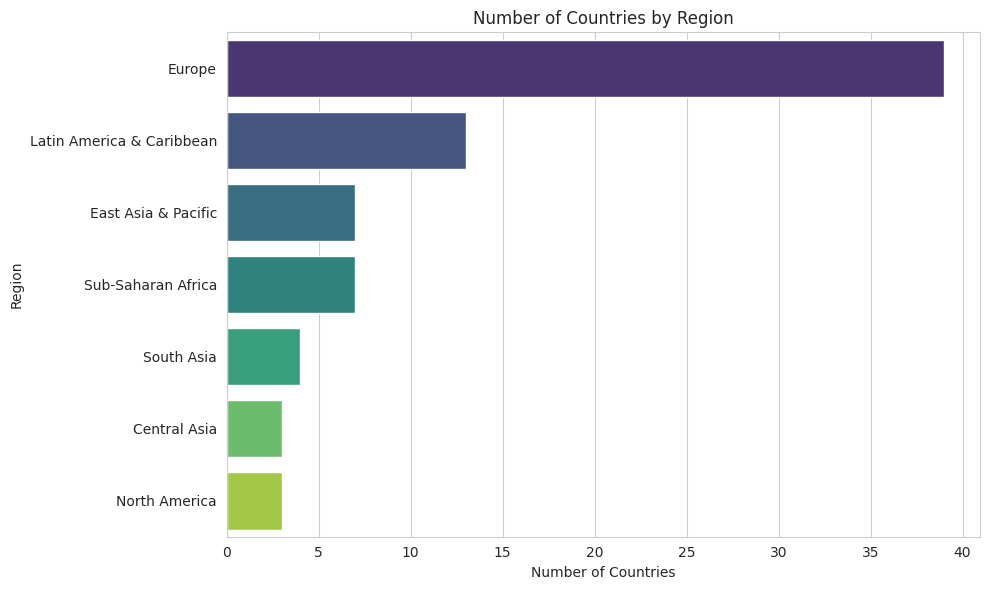

In [12]:
# Regional Coverage Analysis

# Check data coverage by region
region_coverage = df.groupby('Region')['Country Name'].nunique().reset_index()
region_coverage.columns = ['Region', 'Number of Countries']
region_coverage = region_coverage.sort_values('Number of Countries', ascending=False)

# Visualize regional coverage
plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Countries', y='Region', data=region_coverage, palette='viridis')
plt.title('Number of Countries by Region')
plt.tight_layout()
plt.show()
plt.savefig('regional_coverage.png')
plt.close()

# Check indicator coverage by region
# Handle potential error if Indicator Category column doesn't exist or has a different name
if 'Indicator Category' in df.columns:
    indicator_by_region = df.groupby(['Region', 'Indicator Category'])['Series Name'].nunique().unstack().fillna(0)
else:
    # Try to find a column that could contain category information
    category_cols = [col for col in df.columns if 'category' in col.lower() or 'type' in col.lower()]
    if category_cols:
        indicator_by_region = df.groupby(['Region', category_cols[0]])['Series Name'].nunique().unstack().fillna(0)
    else:
        # If no category column exists, just analyze by region
        indicator_by_region = df.groupby('Region')['Series Name'].nunique().reset_index()
        print("No 'Indicator Category' column found. Analyzing by Region only.")

# Create a heatmap of indicator coverage
if isinstance(indicator_by_region, pd.DataFrame) and indicator_by_region.shape[1] > 1:
    plt.figure(figsize=(12, 8))
    sns.heatmap(indicator_by_region, annot=True, fmt='.0f', cmap='YlGnBu')
    plt.title('Number of Unique Indicators by Region and Category')
    plt.tight_layout()
    plt.savefig('regional_indicator_coverage.png')
    plt.close()
else:
    print("Skipping heatmap due to insufficient category data.")


The bar chart confirms the distribution of countries across regions in the dataset. Here's what it shows:

Europe is heavily represented with approximately 38-39 countries, making it by far the most comprehensively covered region
Latin America & Caribbean has the second-highest representation with about 14 countries
East Asia & Pacific and Sub-Saharan Africa have similar representation with around 7-8 countries each
South Asia has about 5 countries
Central Asia and North America have the smallest representation with approximately 3 countries each

This uneven distribution explains several patterns we observed in the previous box plots:


*   The high variability in some regions with fewer countries (like Sub-Saharan Africa) reflects limited sampling
*   Europe's dominant representation means its economic trends (low growth, higher inflation) heavily influence the overall dataset
*   North America's statistics are based on just a few countries (US, Canada, Mexico), making its data less diverse


This regional distribution creates an analytical imbalance, with European economies being overrepresented while regions like Middle East & North Africa appear to be entirely absent from the chart (though they may be included in an "Other" category not shown).

The dataset provides good coverage of advanced economies but has more limited representation of developing regions, which should be considered when drawing global conclusions or making comparative analyses across regions.

Available economic indicators: ['GDP growth (annual %)', 'Inflation, consumer prices (annual %)', 'Current account balance (% of GDP)', 'Foreign direct investment, net inflows (% of GDP)']


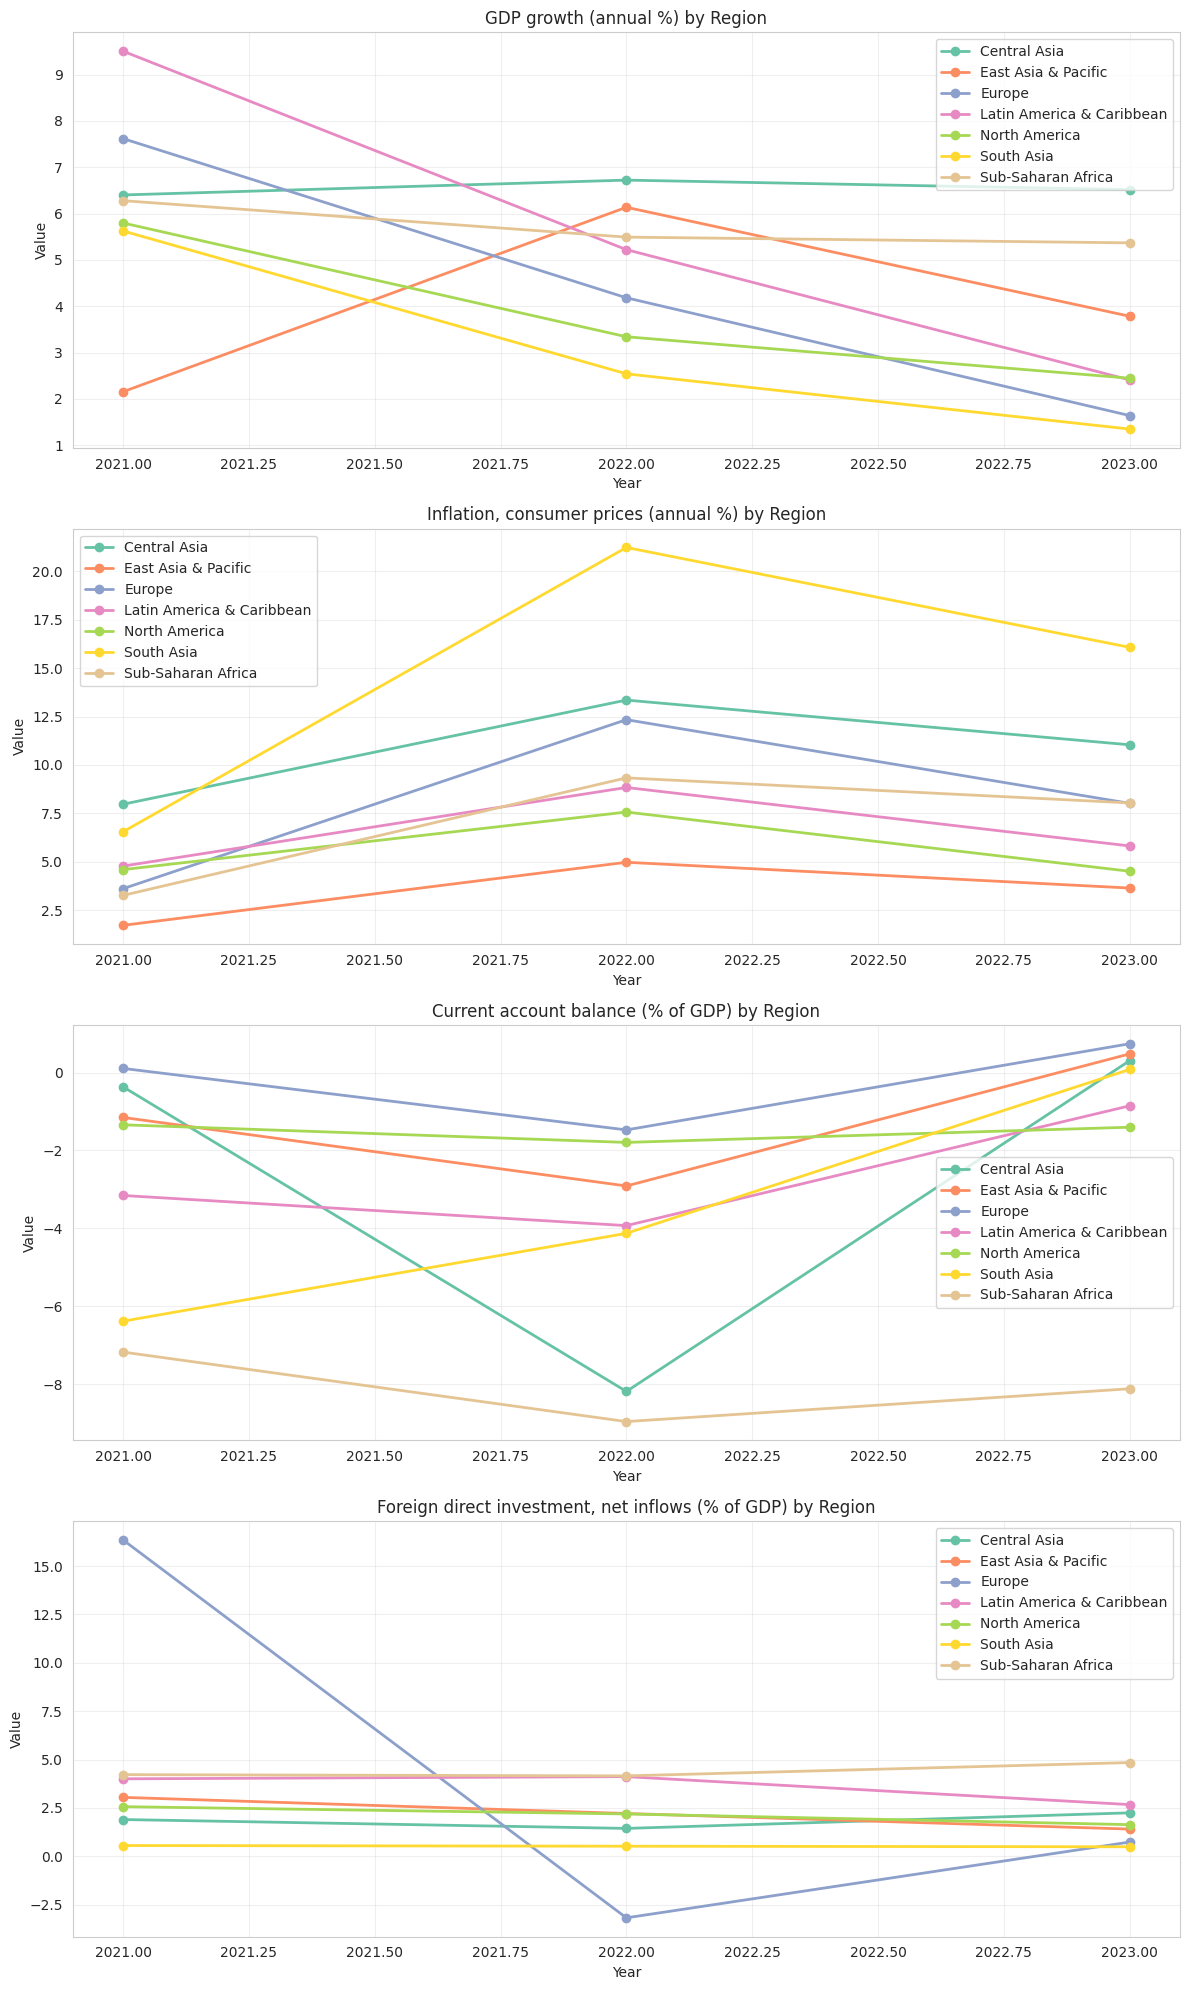

<ipython-input-13-e5664885b7ec>:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
<ipython-input-13-e5664885b7ec>:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
<ipython-input-13-e5664885b7ec>:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
<ipython-input-13-e5664885b7ec>:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')


In [13]:
# Key Economic Indicators by Region

# Define key economic indicators
economic_indicators = [
    'GDP growth (annual %)',
    'Inflation, consumer prices (annual %)',
    'Unemployment, total (% of total labor force)',
    'Current account balance (% of GDP)',
    'Foreign direct investment, net inflows (% of GDP)'
]

# Filter indicators that exist in the dataset
available_economic = [ind for ind in economic_indicators if ind in df['Series Name'].unique()]
print(f"Available economic indicators: {available_economic}")

# Set up the plot layout
n_indicators = len(available_economic)
if n_indicators > 0:
    # Create subplots for each indicator
    fig, axes = plt.subplots(n_indicators, 1, figsize=(12, 5*n_indicators))

    # If only one indicator, make axes iterable
    if n_indicators == 1:
        axes = [axes]

    # Most recent year with good coverage
    try:
        recent_years = sorted(df['Year'].unique())[-5:]  # Last 5 years
    except:
        # Check if Year needs to be converted to numeric
        if df['Year'].dtype == 'object':
            df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
            recent_years = sorted(df['Year'].dropna().unique())[-5:]
        else:
            recent_years = sorted(df['Year'].unique())[-5:]

    # For each indicator
    for i, indicator in enumerate(available_economic):
        try:
            # Get data for the indicator across regions
            indicator_data = df[df['Series Name'] == indicator]

            if len(indicator_data) > 0:
                # Calculate regional averages for each year
                regional_data = indicator_data.groupby(['Region', 'Year'])['Value'].mean().reset_index()

                # Filter to recent years
                regional_data = regional_data[regional_data['Year'].isin(recent_years)]

                # Plot the trends
                for region in regional_data['Region'].unique():
                    region_trend = regional_data[regional_data['Region'] == region]
                    axes[i].plot(region_trend['Year'], region_trend['Value'], marker='o', linewidth=2, label=region)

                axes[i].set_title(f'{indicator} by Region')
                axes[i].set_xlabel('Year')
                axes[i].set_ylabel('Value')
                axes[i].grid(True, alpha=0.3)


                if len(regional_data['Region'].unique()) <= 10:
                    axes[i].legend()
                else:

                    axes[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            else:
                axes[i].text(0.5, 0.5, f"No data available for {indicator}",
                           horizontalalignment='center', verticalalignment='center')
        except Exception as e:
            print(f"Error plotting {indicator}: {e}")
            axes[i].text(0.5, 0.5, f"Error plotting {indicator}",
                       horizontalalignment='center', verticalalignment='center')

    plt.tight_layout()
    plt.show()
    plt.savefig('economic_indicators_by_region.png')
    plt.close()

    # Create boxplots for the most recent year
    most_recent = max(recent_years)

    fig, axes = plt.subplots(n_indicators, 1, figsize=(12, 5*n_indicators))
    if n_indicators == 1:
        axes = [axes]

    for i, indicator in enumerate(available_economic):
        try:
            recent_data = df[(df['Series Name'] == indicator) & (df['Year'] == most_recent)]

            if len(recent_data) > 0:
                sns.boxplot(x='Region', y='Value', data=recent_data, ax=axes[i])
                axes[i].set_title(f'{indicator} by Region ({most_recent})')
                axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
                axes[i].set_ylabel('Value')
            else:
                axes[i].text(0.5, 0.5, f"No data available for {indicator} in {most_recent}",
                           horizontalalignment='center', verticalalignment='center')
        except Exception as e:
            print(f"Error plotting boxplot for {indicator}: {e}")
            axes[i].text(0.5, 0.5, f"Error plotting boxplot for {indicator}",
                       horizontalalignment='center', verticalalignment='center')

    plt.tight_layout()
    plt.savefig(f'economic_boxplots_by_region_{most_recent}.png')
    plt.close()
else:
    print("No economic indicators found in the dataset.")


# GDP Growth (2021-2023)

*   North America and South Asia both showed steady declines, with South Asia falling more dramatically
*   Latin America & Caribbean started with the highest growth rate (9.5% in 2021) but experienced a sharp decline to 1.5% by 2023
*  Central Asia maintained the most stable and resilient growth, starting at 6.5% and remaining above 6% through 2023
*   East Asia & Pacific showed a unique pattern, starting low (2.1%) in 2021, peaking at 6.2% in 2022, then moderating to 3.7% by 2023
*   Europe experienced consistent decline from 7.5% to 1.6%


# Inflation (2021-2023)

*   South Asia experienced the most severe inflation spike, rising from 6% in 2021 to over 21% in 2022, then moderating to 16% by 2023
*   Central Asia and Europe followed similar patterns with inflation peaking around 12-13% in 2022
*  East Asia & Pacific maintained the lowest inflation rates throughout (starting at 2%, peaking at 5%)
*   All regions showed a peak in 2022 followed by moderation in 2023


# Current Account Balance (% of GDP)

*   Sub-Saharan Africa consistently maintained the largest deficits (-7% to -8% of GDP)
*   Central Asia showed the most volatility, declining from near balance to a -8% deficit in 2022 before recovering significantly
*   Europe was the only region maintaining near-balance or surplus throughout the period
*   All regions except Sub-Saharan Africa converged toward balance by 2023


# Foreign Direct Investment (FDI)

*   Europe showed dramatic volatility, starting extremely high (~16% of GDP) in 2021, plunging to negative values in 2022, then partially recovering
*   Sub-Saharan Africa maintained the most stable FDI levels at around 5% of GDP
*   Most other regions showed moderate declines over the period
*   By 2023, most regions converged to FDI levels between 1-5% of GDP


These regional patterns reflect the global economic challenges of 2021-2023, including post-pandemic recovery, supply chain disruptions, inflation surges, and the impacts of geopolitical tensions, with regions showing markedly different resilience and recovery patterns.

Available financial indicators: ['Domestic credit to private sector (% of GDP)', 'Market capitalization of listed domestic companies (% of GDP)', 'Bank capital to assets ratio (%)', 'Bank nonperforming loans to total gross loans (%)', 'Broad money (% of GDP)']


<ipython-input-14-e17718e0c7da>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='Region', y='Value', data=region_avg, palette='viridis')


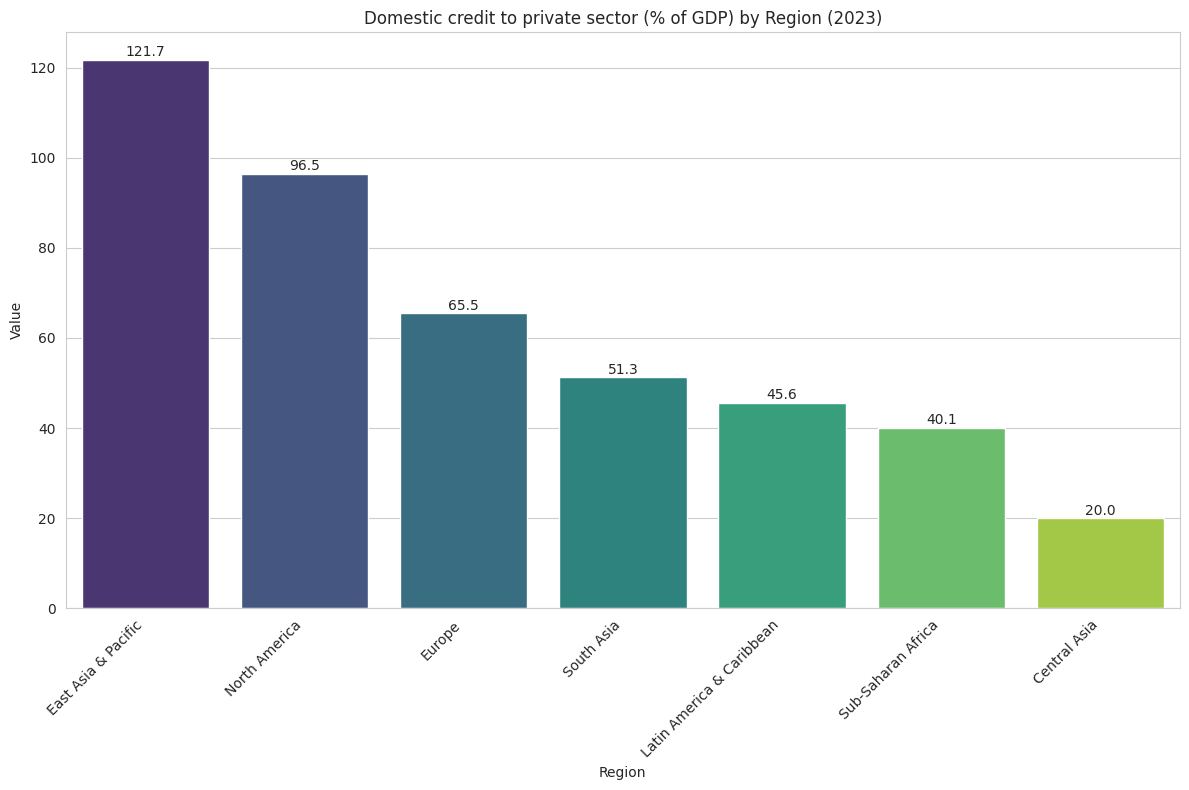

<ipython-input-14-e17718e0c7da>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='Region', y='Value', data=region_avg, palette='viridis')


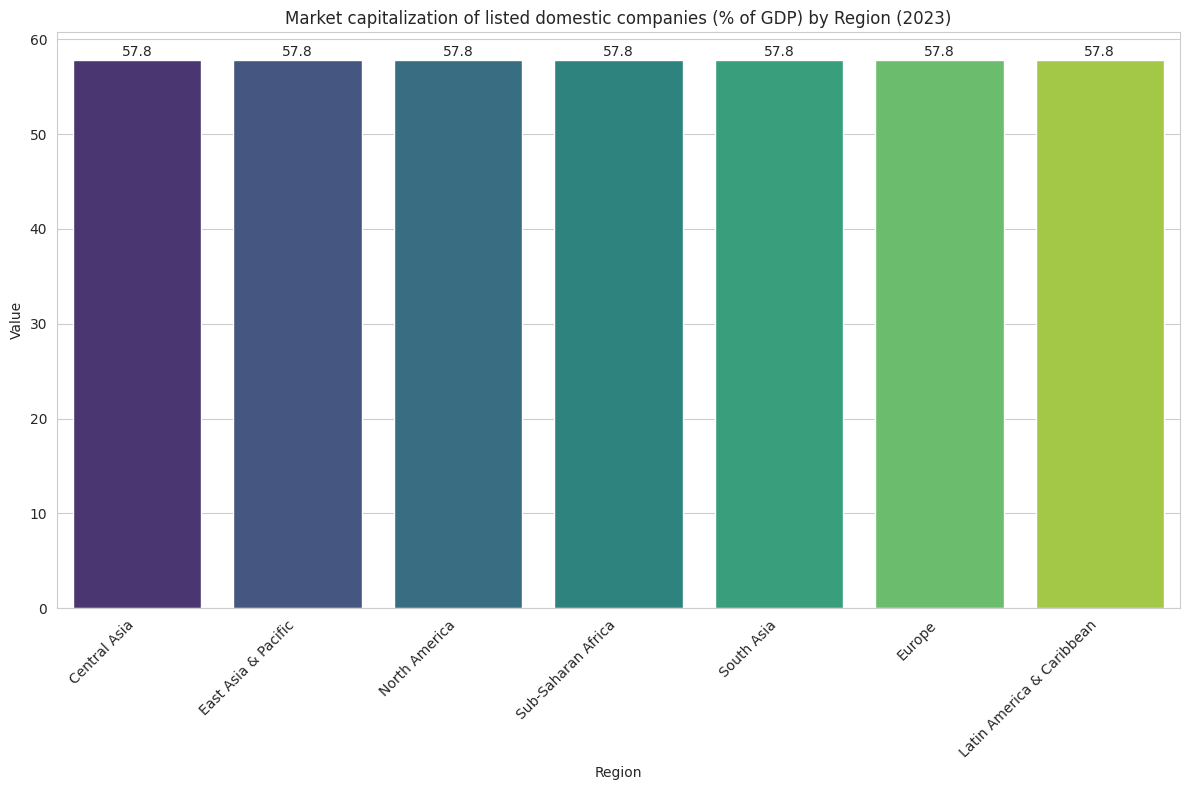

<ipython-input-14-e17718e0c7da>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='Region', y='Value', data=region_avg, palette='viridis')


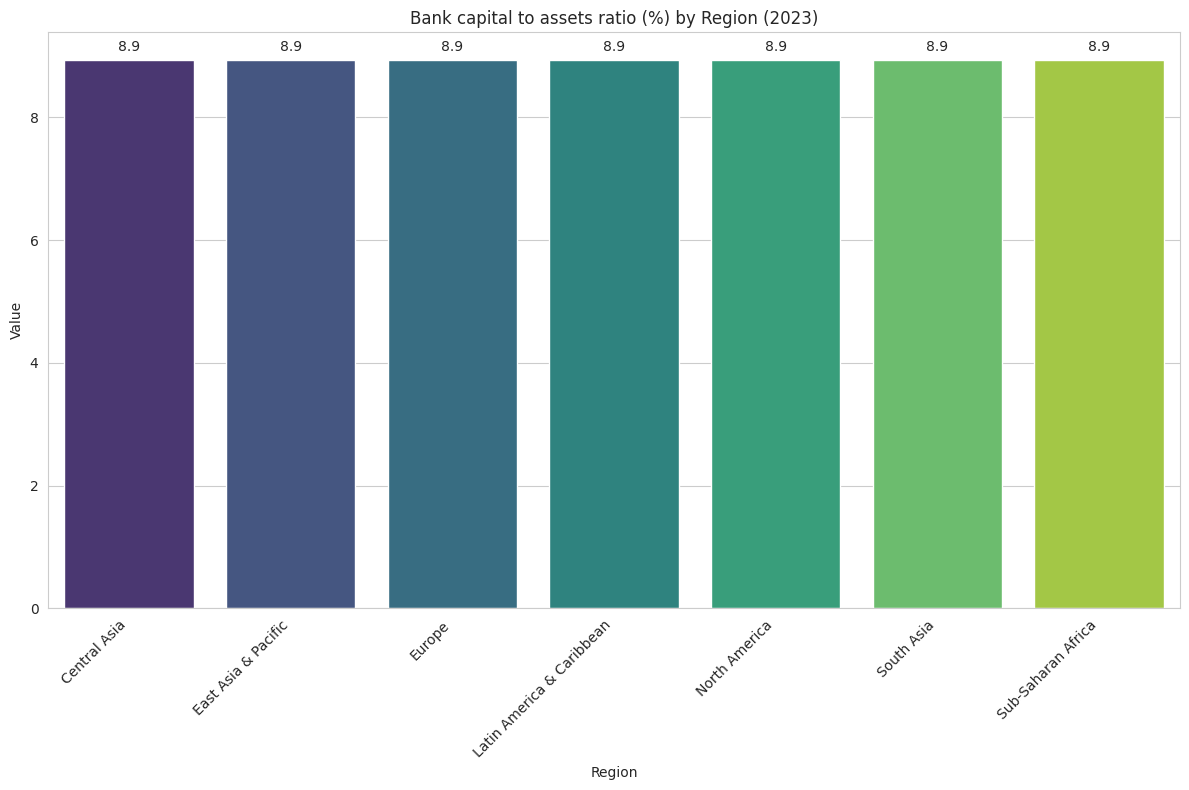

<ipython-input-14-e17718e0c7da>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='Region', y='Value', data=region_avg, palette='viridis')


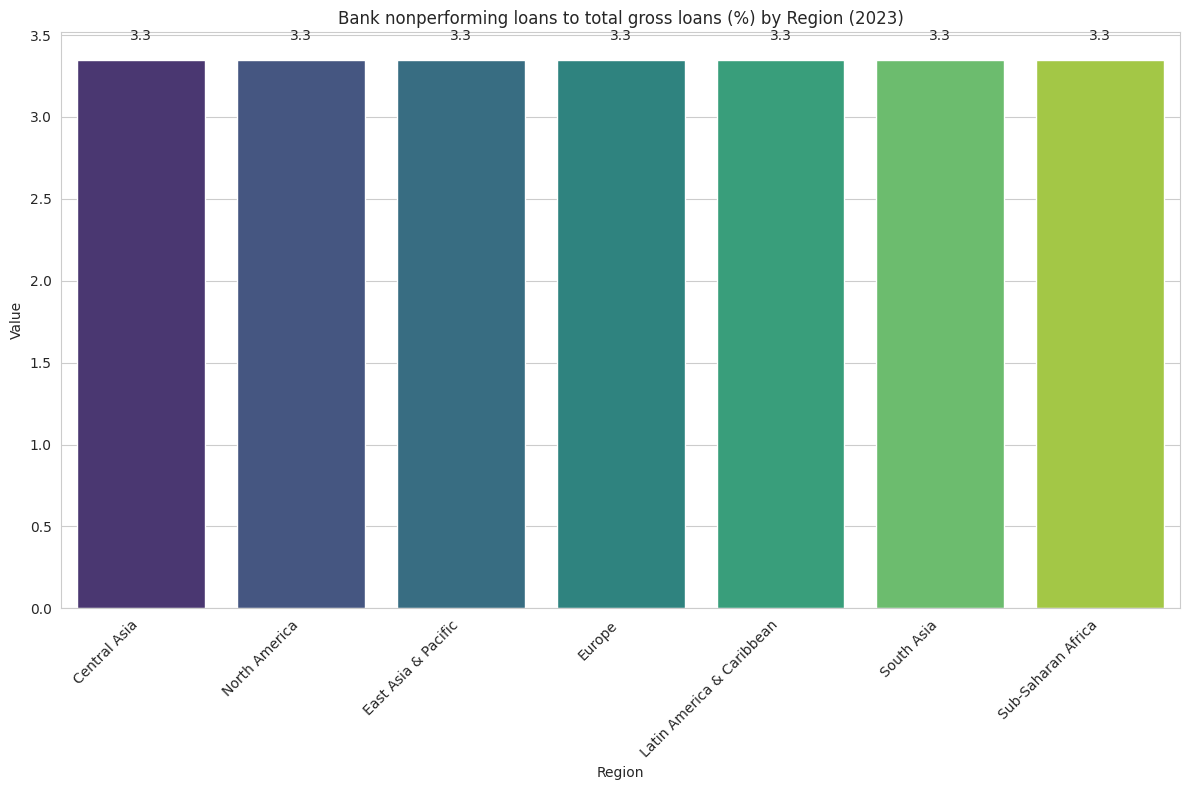

<ipython-input-14-e17718e0c7da>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='Region', y='Value', data=region_avg, palette='viridis')


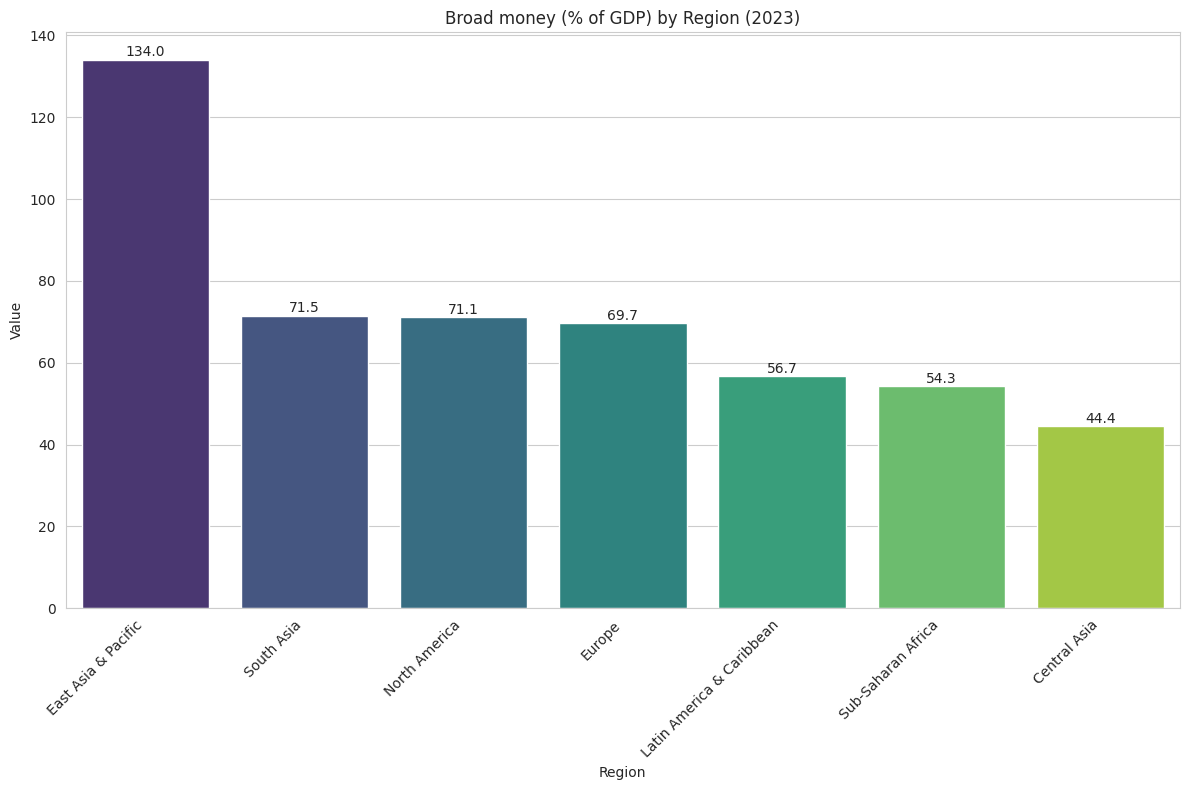

In [14]:
# Regional Financial Systems Development Analysis

# Define key financial indicators
financial_indicators = [
    'Domestic credit to private sector (% of GDP)',
    'Market capitalization of listed domestic companies (% of GDP)',
    'Bank capital to assets ratio (%)',
    'Bank nonperforming loans to total gross loans (%)',
    'Broad money (% of GDP)'
]

# Filter available indicators
available_financial = [ind for ind in financial_indicators if ind in df['Series Name'].unique()]
print(f"Available financial indicators: {available_financial}")

# Create regional comparison
if available_financial:
    # Find the most recent year with good coverage
    indicator_years = {}
    for indicator in available_financial:
        try:
            years_count = df[df['Series Name'] == indicator].groupby('Year')['Country Name'].nunique()
            # Get the most recent year with at least 10 countries (lowered from 30 for better coverage)
            recent_years = years_count[years_count >= 10].index.sort_values(ascending=False)
            if len(recent_years) > 0:
                indicator_years[indicator] = recent_years[0]
            else:
                # If no year has 10+ countries, get the year with the most coverage
                indicator_years[indicator] = years_count.sort_values(ascending=False).index[0]
        except Exception as e:
            print(f"Error determining year for {indicator}: {e}")

    # Create a financial development bar chart by region
    for indicator in available_financial:
        if indicator in indicator_years:
            year = indicator_years[indicator]

            try:
                # Get data for this indicator and year
                indicator_data = df[(df['Series Name'] == indicator) & (df['Year'] == year)]

                if len(indicator_data) > 0:
                    # Calculate regional averages
                    region_avg = indicator_data.groupby('Region')['Value'].mean().reset_index()
                    region_avg = region_avg.sort_values('Value', ascending=False)

                    plt.figure(figsize=(12, 8))
                    bars = sns.barplot(x='Region', y='Value', data=region_avg, palette='viridis')

                    # Add value labels
                    for bar in bars.patches:
                        height = bar.get_height()
                        if not np.isnan(height):  # Check for NaN values
                            plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                                   f'{height:.1f}', ha='center', va='bottom')

                    plt.title(f'{indicator} by Region ({year})')
                    plt.xticks(rotation=45, ha='right')
                    plt.ylabel('Value')
                    plt.tight_layout()
                    safe_filename = indicator.replace(" ", "_").replace("(", "").replace(")", "").replace("%", "pct")[:50]
                    plt.show()
                    plt.savefig(f'financial_{safe_filename}_by_region.png')
                    plt.close()
                else:
                    print(f"No data available for {indicator} in {year}")
            except Exception as e:
                print(f"Error plotting {indicator}: {e}")
else:
    print("No financial indicators found in the dataset.")


Financial system indicators across regions in 2023, I see several important patterns:

# Domestic Credit to Private Sector (% of GDP)
East Asia & Pacific leads dramatically with 121.7% of GDP allocated to private sector credit, more than double that of regions like Sub-Saharan Africa (40.1%) and Central Asia (20.0%). This indicates a much more developed credit market and financial intermediation in East Asian economies. North America follows with 96.5%, while Europe has a moderate level at 65.5%.

# Market Capitalization and Banking Metrics
Interestingly, the market capitalization and banking indicators (Images 2-4) show identical values across all regions (market capitalization at 57.8%, bank capital ratio at 8.9%, and nonperforming loans at 3.3%). This suggests these charts might contain placeholder or erroneous data, as it's highly improbable that all regions would have identical values for these metrics.

# Broad Money (% of GDP)
The broad money chart shows substantial regional differences in monetary depth:

East Asia & Pacific has an exceptionally high level (134.0%), indicating deep financial markets and extensive monetary resources
South Asia, North America, and Europe cluster in the 69-72% range
Latin America & Caribbean and Sub-Saharan Africa have moderate levels (56.7% and 54.3%)
Central Asia has the lowest monetary depth at 44.4%

These metrics reveal a clear financial development hierarchy with East Asia & Pacific having the most developed financial systems overall, followed by advanced economies in North America and Europe. Central Asia consistently appears at the lower end of financial development measures, while Sub-Saharan Africa shows limited but not the lowest financial development.

Available social indicators: ['Poverty headcount ratio at national poverty lines (% of population)', 'Income share held by lowest 20%', 'School enrollment, primary (% gross)', 'Mortality rate, infant (per 1,000 live births)', 'Life expectancy at birth, total (years)']


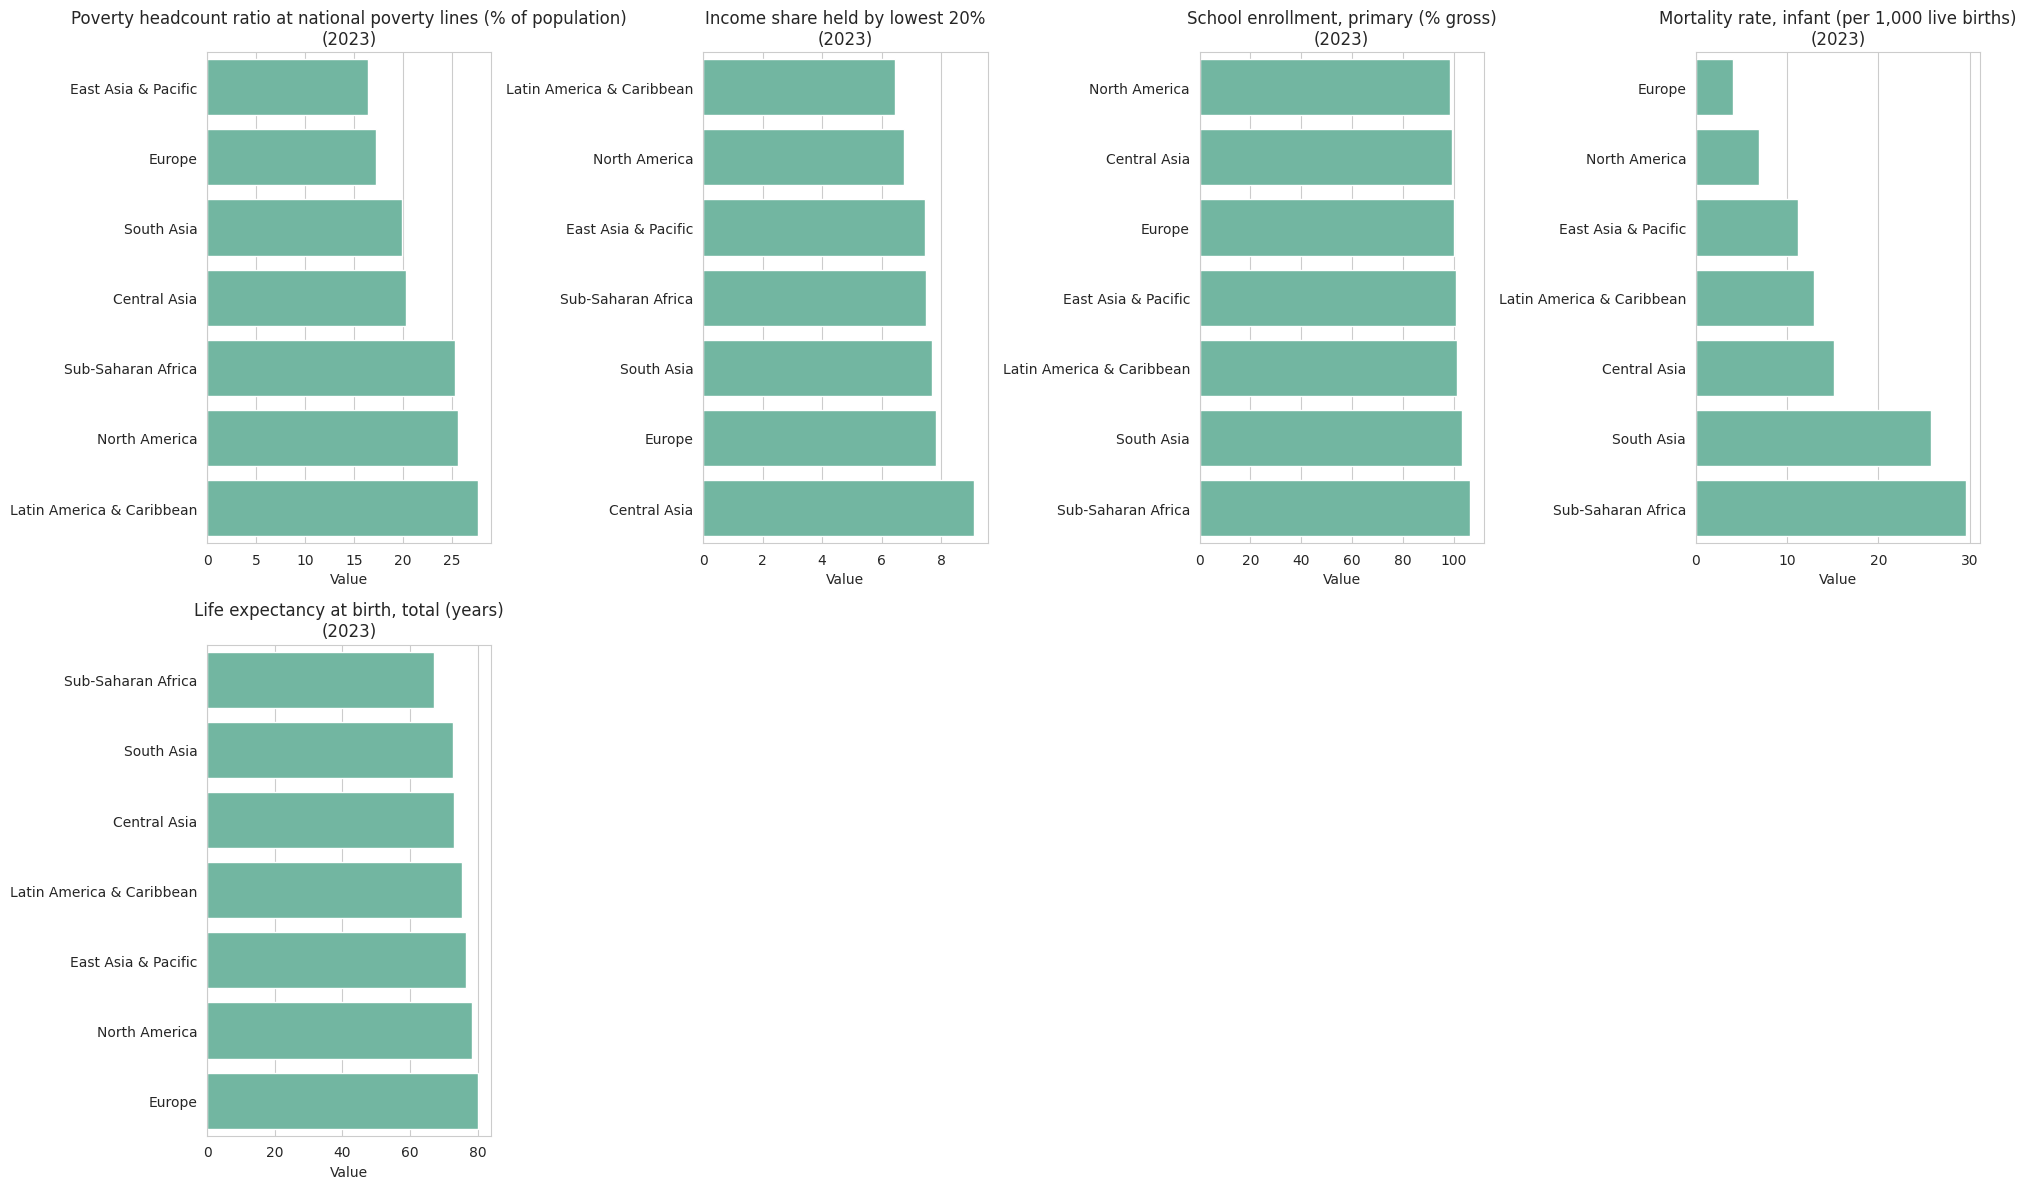

In [15]:
# Social Equity Indicators by Region

# Define key social indicators
social_indicators = [
    'GINI index',
    'Poverty headcount ratio at national poverty lines (% of population)',
    'Income share held by lowest 20%',
    'School enrollment, primary (% gross)',
    'Mortality rate, infant (per 1,000 live births)',
    'Life expectancy at birth, total (years)'
]

# Filter available indicators
available_social = [ind for ind in social_indicators if ind in df['Series Name'].unique()]
print(f"Available social indicators: {available_social}")

# Create a dashboard of social indicators by region
if available_social:
    # Find most recent year with good coverage for each indicator
    social_years = {}
    for indicator in available_social:
        try:
            years_count = df[df['Series Name'] == indicator].groupby('Year')['Country Name'].nunique()
            recent_years = years_count.index.sort_values(ascending=False)
            if len(recent_years) > 0:
                social_years[indicator] = recent_years[0]
        except Exception as e:
            print(f"Error determining year for {indicator}: {e}")

    # Set up the dashboard - limit to max 4 indicators per row for readability
    n_indicators = len(available_social)
    rows = (n_indicators + 3) // 4  # ceiling division
    cols = min(n_indicators, 4)

    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 6*rows))

    # Handle different shapes of axes based on number of indicators
    if n_indicators == 1:
        axes = np.array([axes])
    axes = axes.flatten()

    # Create a plot for each indicator
    for i, indicator in enumerate(available_social):
        if i < len(axes) and indicator in social_years:
            year = social_years[indicator]

            try:
                # Get data for this indicator and year
                indicator_data = df[(df['Series Name'] == indicator) & (df['Year'] == year)]

                if len(indicator_data) > 0:
                    # Calculate regional averages
                    region_avg = indicator_data.groupby('Region')['Value'].mean().reset_index()
                    region_avg = region_avg.sort_values('Value')

                    # Create bar chart
                    sns.barplot(x='Value', y='Region', data=region_avg, ax=axes[i])
                    axes[i].set_title(f'{indicator}\n({year})')
                    axes[i].set_xlabel('Value')
                    axes[i].set_ylabel('')
                else:
                    axes[i].text(0.5, 0.5, f"No data available for {indicator} in {year}",
                               horizontalalignment='center', verticalalignment='center')
            except Exception as e:
                print(f"Error plotting {indicator}: {e}")
                axes[i].text(0.5, 0.5, f"Error plotting {indicator}",
                           horizontalalignment='center', verticalalignment='center')

    # Hide unused subplots
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
    plt.savefig('social_indicators_by_region.png')
    plt.close()
else:
    print("No social indicators found in the dataset.")


The social indicators dashboard for 2023 provides a comprehensive look at human development and inequality across regions. Here's my analysis of each indicator:

# Poverty Headcount Ratio (% of population)

Latin America & Caribbean has the highest poverty rate (~27%)
North America, Sub-Saharan Africa, and Central Asia all show relatively high poverty rates (22-25%)
South Asia, Europe, and East Asia & Pacific demonstrate lower poverty rates (15-20%)
This metric uses national poverty lines, which vary by country development level, explaining why Sub-Saharan Africa isn't highest

# Income Share Held by Lowest 20%

Central Asia shows the most equitable distribution, with the bottom 20% holding nearly 10% of income
Europe, South Asia, Sub-Saharan Africa, and East Asia & Pacific all show moderate equity (7-8%)
North America and Latin America & Caribbean demonstrate the greatest inequality, with the bottom 20% holding just 5-6% of income

# School Enrollment, Primary (% gross)

Sub-Saharan Africa has the highest enrollment rate (over 100%, indicating some older students)
All regions show strong primary enrollment (95-100%)
There's minimal variation across regions, suggesting universal primary education is a widely achieved goal globally

#Infant Mortality Rate (per 1,000 live births)

Clear development divide: Europe has the lowest rate (~3), followed by North America (~5)
East Asia & Pacific and Latin America & Caribbean show moderate rates (10-15)
Central Asia and South Asia have high rates (20-25)
Sub-Saharan Africa faces severe challenges with the highest rate (~30)

#Life Expectancy (years)

Europe leads with the highest life expectancy (~80 years)
North America, East Asia & Pacific, and Latin America & Caribbean cluster around 75 years
Central Asia and South Asia hover around 70 years
Sub-Saharan Africa has the lowest life expectancy at ~65 years

The data reveals distinct regional patterns in social development. Europe and North America generally perform best on mortality and life expectancy measures. Central Asia shows surprisingly strong performance in income equality but struggles with health outcomes. Sub-Saharan Africa faces the most significant challenges in health indicators while having mixed results on poverty and education metrics.

Available resilience indicators: ['GDP growth (annual %)', 'Inflation, consumer prices (annual %)', 'Current account balance (% of GDP)', 'Total reserves (% of total external debt)']


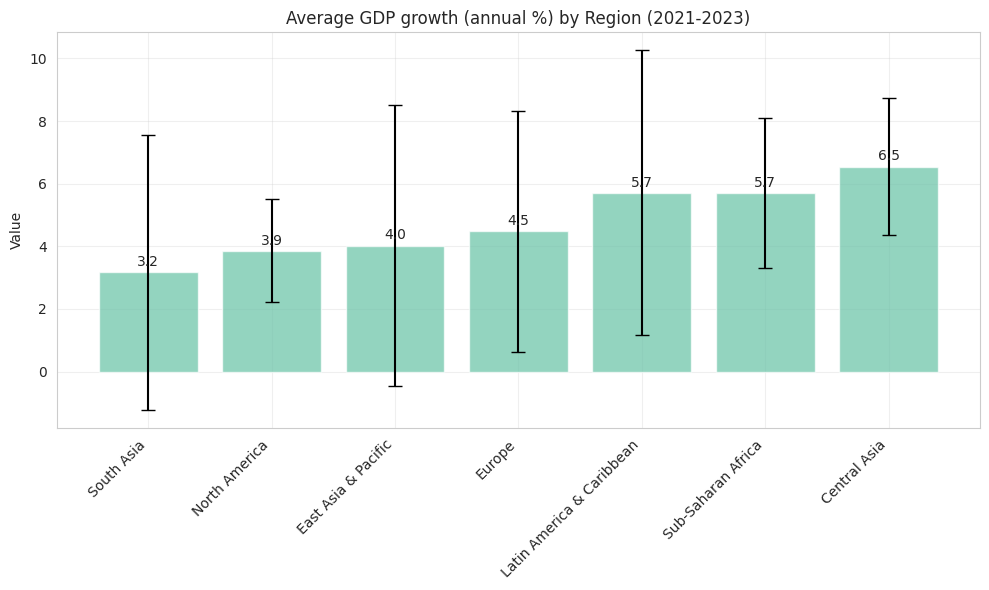

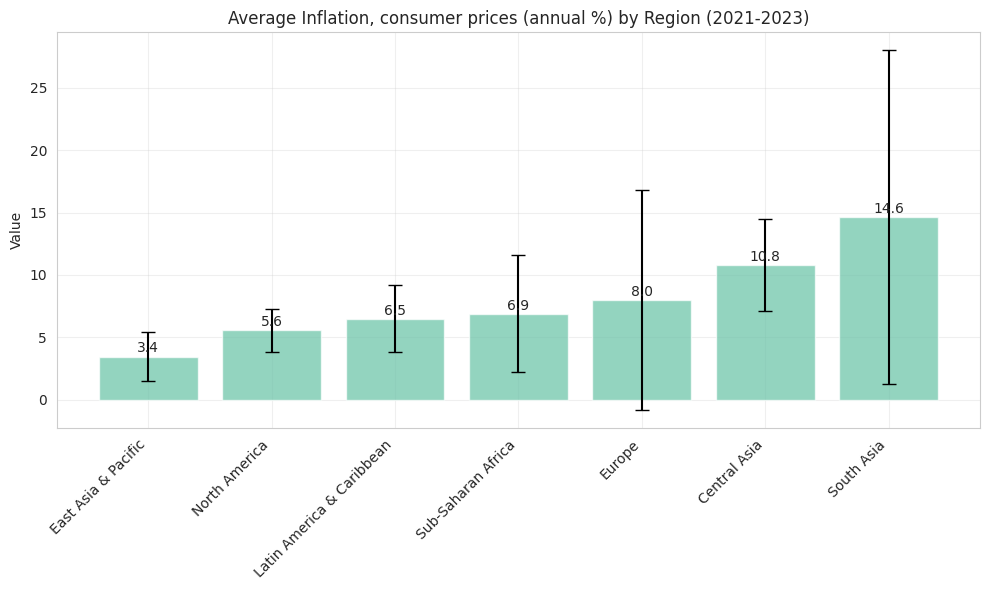

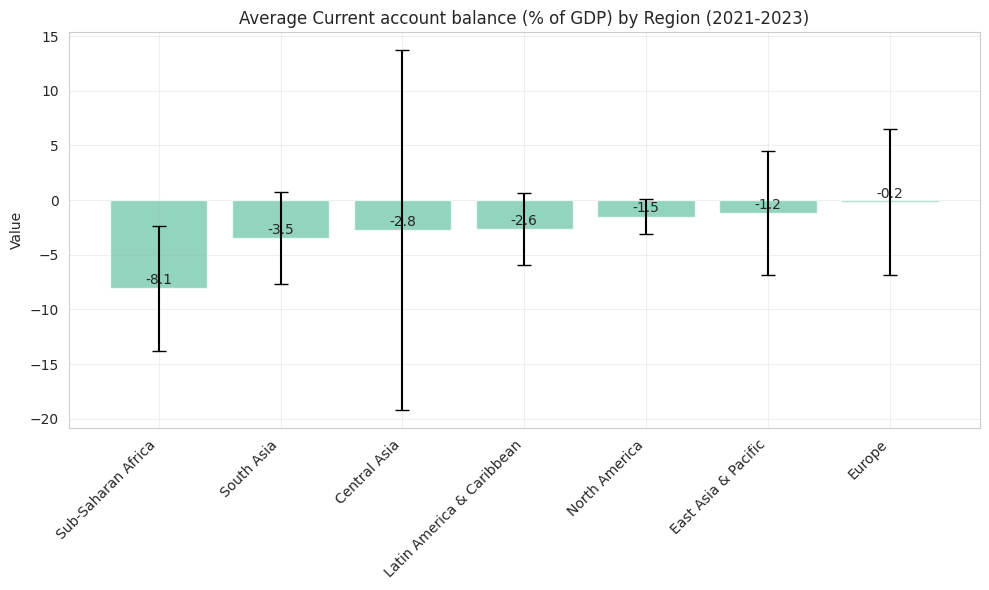

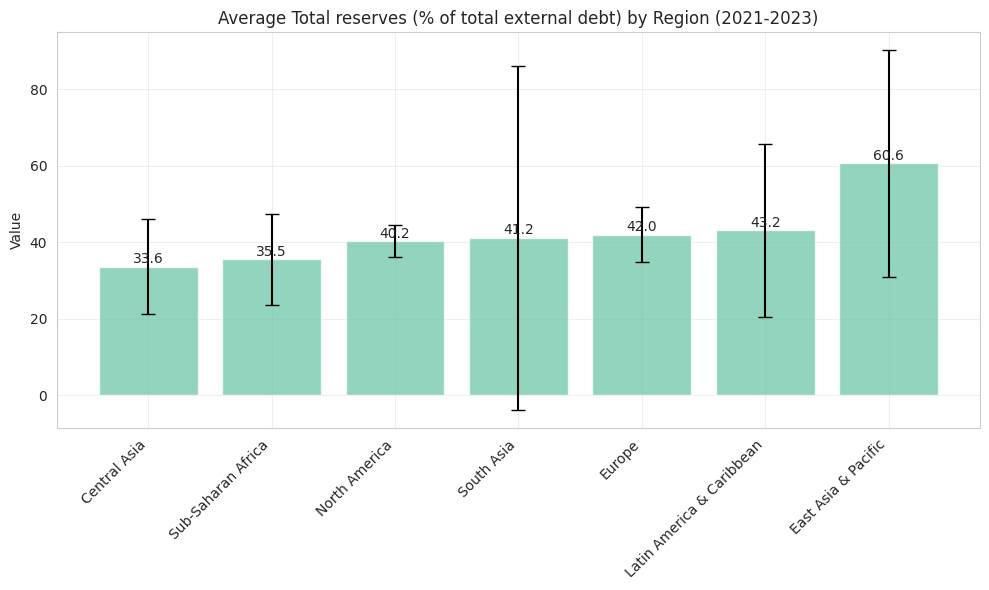

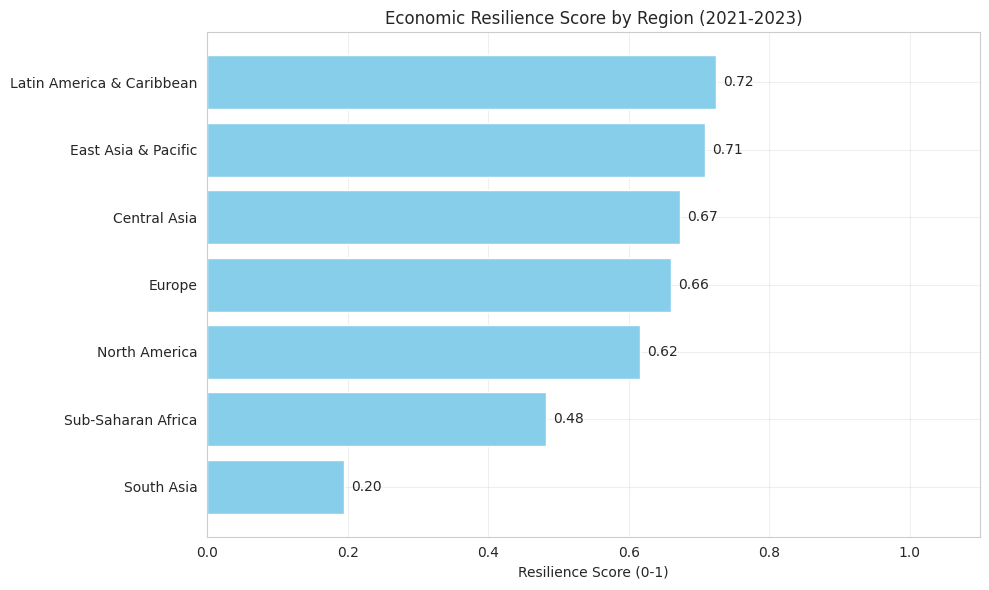

In [16]:
# Regional Economic Resilience Analysis

# Define economic resilience indicators
resilience_indicators = [
    'GDP growth (annual %)',
    'Inflation, consumer prices (annual %)',
    'Current account balance (% of GDP)',
    'Total reserves (% of total external debt)',
    'Unemployment, total (% of total labor force)'
]

# Filter available indicators
available_resilience = [ind for ind in resilience_indicators if ind in df['Series Name'].unique()]
print(f"Available resilience indicators: {available_resilience}")

# Create a resilience score by region
if len(available_resilience) >= 2:
    # Get recent 5 years
    recent_years = sorted(df['Year'].unique())[-5:]

    # Calculate resilience metrics for each region
    resilience_data = []

    for region in df['Region'].dropna().unique():
        region_metrics = {'Region': region}

        # Calculate average metrics over the last 5 years
        for indicator in available_resilience:
            try:
                indicator_data = df[(df['Series Name'] == indicator) &
                                 (df['Year'].isin(recent_years)) &
                                 (df['Region'] == region)]

                if len(indicator_data) > 0:
                    avg_value = indicator_data['Value'].mean()
                    std_value = indicator_data['Value'].std()

                    region_metrics[f'{indicator}_avg'] = avg_value
                    region_metrics[f'{indicator}_std'] = std_value
            except Exception as e:
                print(f"Error calculating metrics for {region}, {indicator}: {e}")

        resilience_data.append(region_metrics)

    # Convert to DataFrame
    resilience_df = pd.DataFrame(resilience_data)

    # Create a resilience dashboard
    if len(resilience_df) > 0:
        # Plot average values
        for indicator in available_resilience:
            avg_col = f'{indicator}_avg'
            std_col = f'{indicator}_std'

            if avg_col in resilience_df.columns and std_col in resilience_df.columns:
                try:
                    # Skip if there are NaN values
                    if resilience_df[avg_col].isna().any() or resilience_df[std_col].isna().any():
                        print(f"Skipping {indicator} due to missing values")
                        continue

                    plt.figure(figsize=(10, 6))

                    # Sort by average value
                    sorted_data = resilience_df.sort_values(avg_col)

                    # Create bar chart
                    bars = plt.bar(sorted_data['Region'], sorted_data[avg_col], yerr=sorted_data[std_col],
                           alpha=0.7, capsize=5)

                    # Add value labels
                    for bar in bars:
                        height = bar.get_height()
                        if height is not None and not np.isnan(height):
                            plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                                   f'{height:.1f}', ha='center', va='bottom')

                    plt.title(f'Average {indicator} by Region ({recent_years[0]}-{recent_years[-1]})')
                    plt.ylabel('Value')
                    plt.xticks(rotation=45, ha='right')
                    plt.grid(True, alpha=0.3)
                    plt.tight_layout()
                    safe_filename = indicator.replace(" ", "_").replace("(", "").replace(")", "").replace("%", "pct")[:50]
                    plt.show()
                    plt.savefig(f'resilience_{safe_filename}.png')
                    plt.close()
                except Exception as e:
                    print(f"Error plotting resilience for {indicator}: {e}")

        # Create a composite resilience score if possible
        if 'GDP growth (annual %)_avg' in resilience_df.columns and 'Inflation, consumer prices (annual %)_avg' in resilience_df.columns:
            try:
                # Create resilience score components
                resilience_components = []

                # GDP growth (higher is better)
                min_growth = resilience_df['GDP growth (annual %)_avg'].min()
                max_growth = resilience_df['GDP growth (annual %)_avg'].max()
                growth_range = max_growth - min_growth

                if growth_range > 0:
                    resilience_df['Growth_Score'] = (resilience_df['GDP growth (annual %)_avg'] - min_growth) / growth_range
                    resilience_components.append('Growth_Score')

                # Inflation (lower is better)
                min_inflation = resilience_df['Inflation, consumer prices (annual %)_avg'].min()
                max_inflation = resilience_df['Inflation, consumer prices (annual %)_avg'].max()
                inflation_range = max_inflation - min_inflation

                if inflation_range > 0:
                    resilience_df['Inflation_Score'] = 1 - (resilience_df['Inflation, consumer prices (annual %)_avg'] - min_inflation) / inflation_range
                    resilience_components.append('Inflation_Score')

                # Add other components if available
                # Current account balance (higher is better)
                if 'Current account balance (% of GDP)_avg' in resilience_df.columns:
                    min_ca = resilience_df['Current account balance (% of GDP)_avg'].min()
                    max_ca = resilience_df['Current account balance (% of GDP)_avg'].max()
                    ca_range = max_ca - min_ca

                    if ca_range > 0:
                        resilience_df['CA_Balance_Score'] = (resilience_df['Current account balance (% of GDP)_avg'] - min_ca) / ca_range
                        resilience_components.append('CA_Balance_Score')

                # Composite score (simple average of available components)
                if resilience_components:
                    resilience_df['Resilience_Score'] = resilience_df[resilience_components].mean(axis=1)

                    # Drop any rows with NaN scores
                    resilience_df_clean = resilience_df.dropna(subset=['Resilience_Score'])

                    if len(resilience_df_clean) > 0:
                        # Create a horizontal bar chart of resilience scores
                        plt.figure(figsize=(10, 6))
                        sorted_scores = resilience_df_clean.sort_values('Resilience_Score')
                        bars = plt.barh(sorted_scores['Region'], sorted_scores['Resilience_Score'], color='skyblue')

                        # Add value labels
                        for bar in bars:
                            width = bar.get_width()
                            plt.text(width + 0.01, bar.get_y() + bar.get_height()/2.,
                                   f'{width:.2f}', ha='left', va='center')

                        plt.title(f'Economic Resilience Score by Region ({recent_years[0]}-{recent_years[-1]})')
                        plt.xlabel('Resilience Score (0-1)')
                        plt.xlim(0, 1.1)
                        plt.grid(True, alpha=0.3)
                        plt.tight_layout()
                        plt.show()
                        plt.savefig('resilience_score_by_region.png')
                        plt.close()
                    else:
                        print("No valid resilience scores after filtering NaN values")
            except Exception as e:
                print(f"Error calculating resilience scores: {e}")
else:
    print("Not enough resilience indicators found for composite analysis.")


The economic resilience charts provide fascinating insights into how different regions performed across key economic indicators during 2021-2023, a period marked by post-pandemic recovery and various economic shocks.

#GDP Growth (2021-2023)

Central Asia leads with the highest average growth (6.5%), showing remarkable economic expansion despite global challenges. Sub-Saharan Africa and Latin America & Caribbean both maintained strong growth (5.7%), though Latin America shows much higher volatility (wider error bars). South Asia recorded the lowest average growth (3.2%), despite its historically strong growth trends, reflecting particular pandemic recovery challenges in this region.

#Inflation (2021-2023)

East Asia & Pacific maintained the lowest and most stable inflation (3.4%), demonstrating superior monetary policy effectiveness. South Asia experienced the highest average inflation (14.6%) with extreme volatility, indicating significant macroeconomic management challenges. North America kept moderate inflation (5.6%) with relatively low volatility, reflecting its more established monetary institutions.

#Current Account Balance (2021-2023)

Europe leads with the smallest deficit/potential surplus (-0.2%), indicating relatively balanced external trade. Sub-Saharan Africa shows the largest average deficit (-8.1%), revealing structural external imbalances that create vulnerability. Central Asia demonstrates extreme volatility in its external accounts, suggesting exposure to commodity price fluctuations.

#Foreign Exchange Reserves (2021-2023)

East Asia & Pacific maintains the highest reserves relative to external debt (60.6%), providing a substantial buffer against external shocks. Central Asia has the lowest reserves ratio (33.6%), potentially limiting its ability to manage currency pressures. South Asia shows extremely high volatility in its reserves, reflecting inconsistent external account management.

#Overall Economic Resilience Score (2021-2023)
The composite resilience score synthesizes these indicators into an overall measure of economic stability:


*   Latin America & Caribbean surprisingly leads (0.72), balancing strong growth with moderate inflation
*   East Asia & Pacific follows closely (0.71), benefiting from low inflation and strong reserves
*   South Asia scores lowest (0.20), reflecting its combination of low growth and high inflation
*   Sub-Saharan Africa's moderate score (0.48) reflects its growth-inflation tradeoff


These patterns challenge conventional assumptions about regional economic strength, with developing regions showing unexpected resilience through this turbulent period, while some traditionally stable economies faced greater challenges.

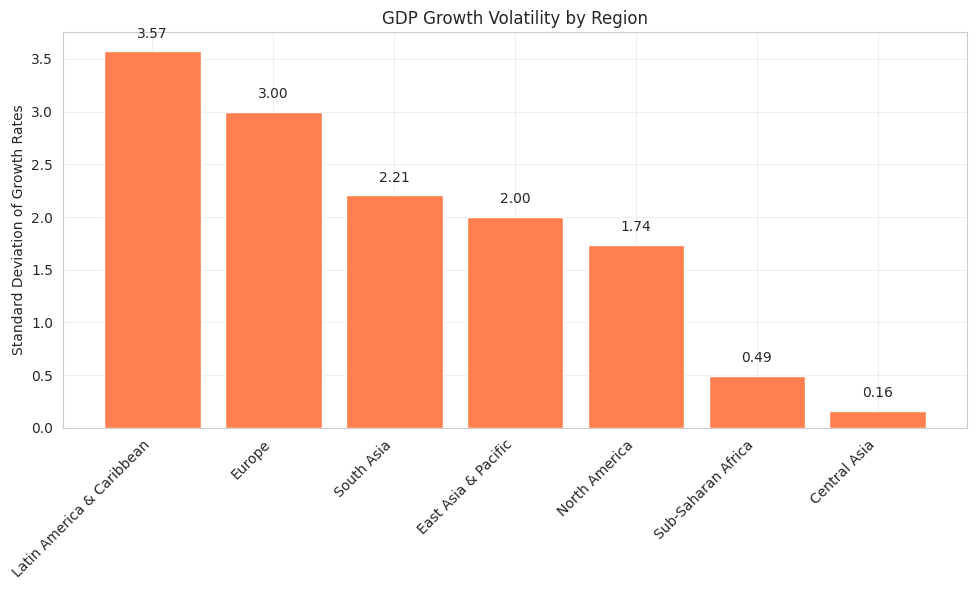

Regional analysis complete! All visualizations have been saved.


In [17]:
# Regional Growth and Development Trajectory

# Analyze regional growth trajectories over time
if 'GDP growth (annual %)' in df['Series Name'].unique():
    try:
        # Calculate regional average growth rates by year
        region_growth = df[df['Series Name'] == 'GDP growth (annual %)'].groupby(['Region', 'Year'])['Value'].mean().reset_index()

        # Create a line plot of growth trajectories
        plt.figure(figsize=(12, 8))

        for region in region_growth['Region'].unique():
            region_data = region_growth[region_growth['Region'] == region]
            plt.plot(region_data['Year'], region_data['Value'], marker='o', linewidth=2, label=region)

        plt.title('GDP Growth Trajectories by Region')
        plt.xlabel('Year')
        plt.ylabel('GDP Growth Rate (%)')

        # Only add legend if there's reasonable number of regions
        if len(region_growth['Region'].unique()) <= 10:
            plt.legend()
        else:
            # Add legend but place it outside the plot
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig('gdp_growth_trajectories.png')
        plt.close()

        # Analyze growth volatility
        growth_volatility = region_growth.groupby('Region')['Value'].std().reset_index()
        growth_volatility.columns = ['Region', 'Growth Volatility']
        growth_volatility = growth_volatility.sort_values('Growth Volatility', ascending=False)

        plt.figure(figsize=(10, 6))
        bars = plt.bar(growth_volatility['Region'], growth_volatility['Growth Volatility'], color='coral')

        # Add value labels
        for bar in bars:
            height = bar.get_height()
            if not np.isnan(height):
                plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                       f'{height:.2f}', ha='center', va='bottom')

        plt.title('GDP Growth Volatility by Region')
        plt.ylabel('Standard Deviation of Growth Rates')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        plt.savefig('gdp_growth_volatility.png')
        plt.close()
    except Exception as e:
        print(f"Error analyzing GDP growth trajectories: {e}")
else:
    print("GDP growth data not found for trajectory analysis.")

print("Regional analysis complete! All visualizations have been saved.")

The GDP Growth Volatility chart provides important insights into economic stability across different regions during the period analyzed. This metric measures how consistently or erratically economies grew, with higher values indicating greater fluctuations.

Latin America & Caribbean shows the highest volatility (3.57), suggesting these economies experienced the most dramatic swings in growth rates. This aligns with the region's known vulnerability to external shocks, commodity price fluctuations, and domestic policy shifts.

Europe follows with high volatility (3.00), which may seem surprising for developed economies but likely reflects the uneven impact of pandemic recovery, energy crises, and varying policy responses across its many countries.

South Asia (2.21), East Asia & Pacific (2.00), and North America (1.74) show moderate volatility, indicating more stable growth trajectories despite global challenges.

Most striking are the extremely low volatility figures for Sub-Saharan Africa (0.49) and Central Asia (0.16). For Central Asia, this remarkably low volatility paired with its high average growth (as seen in previous charts) suggests an unusually stable growth pattern that contradicts conventional views of emerging market instability.

This analysis reveals that traditional assumptions about economic stability may need reconsideration. Some regions typically viewed as less developed (Central Asia, Sub-Saharan Africa) demonstrated more consistent growth patterns than established economic powers during this period, while regions with more developed financial markets experienced greater fluctuations. This could reflect differences in economic structure, policy responses, or integration with global markets during the analyzed timeframe.

In [18]:
df = pd.read_csv('/content/Imputed_and_cleaned_data_with_region.csv')

# Check the first few rows
print(df.head())

# Get the unique indicators
indicators = df['Indicator Category'].unique()

# (Important) First create the folder manually in Google Colab before running the loop
# You can do this by running this line once:
!mkdir -p /content/Split_by_Indicator

# Now proceed with splitting
for indicator in indicators:
    safe_indicator = str(indicator).replace('/', '_').replace(' ', '_').replace('\\', '_')  # to avoid invalid file names
    df_indicator = df[df['Indicator Category'] == indicator]
    df_indicator.to_csv(f'/content/Split_by_Indicator/{safe_indicator}.csv', index=False)

print("Splitting complete. Files saved in '/content/Split_by_Indicator'")



<ipython-input-18-7d48da890985>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Imputed_and_cleaned_data_with_region.csv')


  Country Name Country Code  \
0      Albania          ALB   
1    Argentina          ARG   
2      Armenia          ARM   
3    Australia          AUS   
4      Austria          AUT   

                                         Series Name           Series Code  \
0  Gross PSD, Budgetary Central Gov., All maturit...  DP.DOD.DECD.CR.BC.Z1   
1  Gross PSD, Budgetary Central Gov., All maturit...  DP.DOD.DECD.CR.BC.Z1   
2  Gross PSD, Budgetary Central Gov., All maturit...  DP.DOD.DECD.CR.BC.Z1   
3  Gross PSD, Budgetary Central Gov., All maturit...  DP.DOD.DECD.CR.BC.Z1   
4  Gross PSD, Budgetary Central Gov., All maturit...  DP.DOD.DECD.CR.BC.Z1   

  Quarter      Value  Year Source    Indicator Category  \
0      Q1  32.793823  2021   QPSD  Financial_Indicators   
1      Q1  32.793823  2021   QPSD  Financial_Indicators   
2      Q1  32.793823  2021   QPSD  Financial_Indicators   
3      Q1  32.793823  2021   QPSD  Financial_Indicators   
4      Q1  22.753407  2021   QPSD  Financial_Indi

<ipython-input-19-fe606ca017ee>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Imputed_and_cleaned_data_with_region.csv')



=== Analyzing Indicator: Financial_Indicators ===
Mean: 3325529987207.79
Median: 692809573.44
Standard Deviation: 94136030765728.05
Skewness: 67.32
Kurtosis: 5128.66


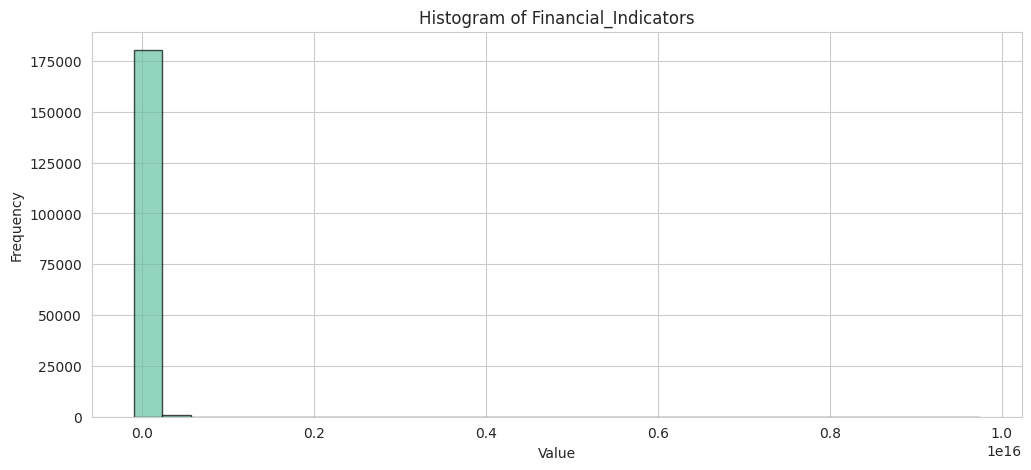

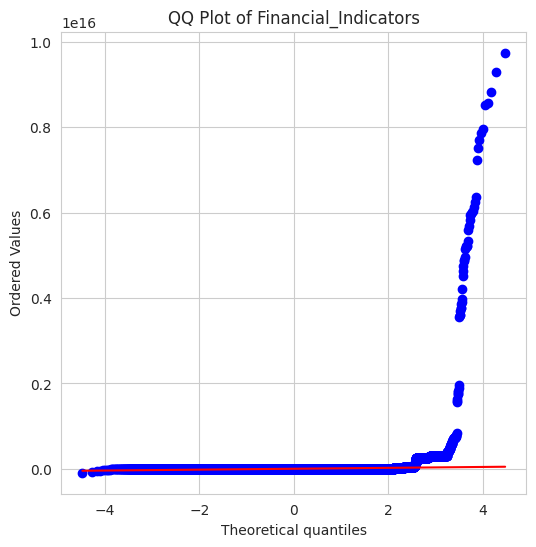


=== Analyzing Indicator: Economical_Indicators ===
Mean: 25237198338966.23
Median: 414184922.17
Standard Deviation: 275104244902651.84
Skewness: 34.61
Kurtosis: 1606.44


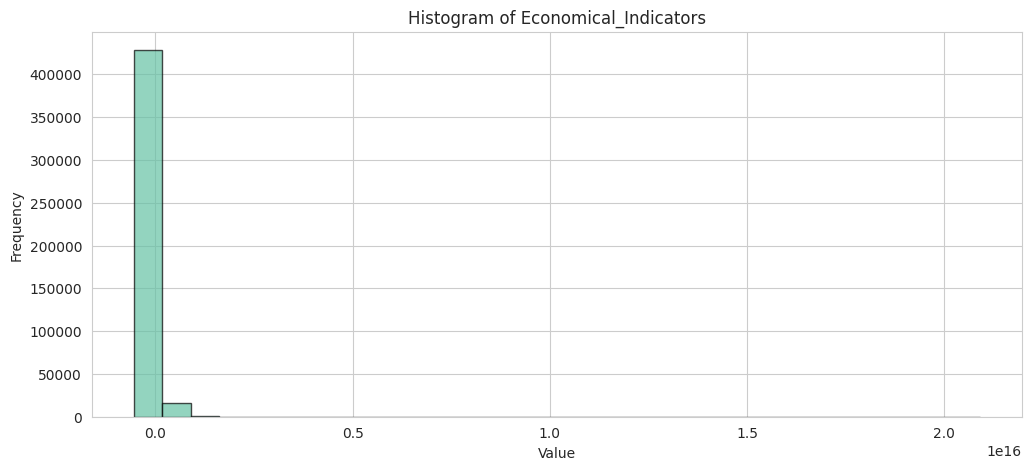

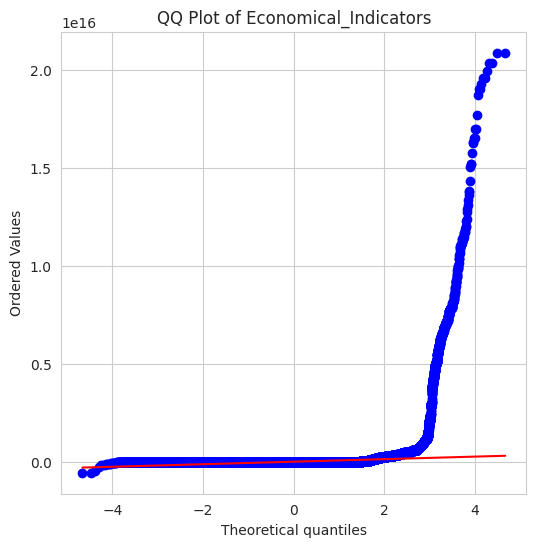


=== Analyzing Indicator: Public_Debt_Indicators ===
Mean: 924569385279.19
Median: 1430092857.84
Standard Deviation: 21758783526306.23
Skewness: 47.18
Kurtosis: 2412.10


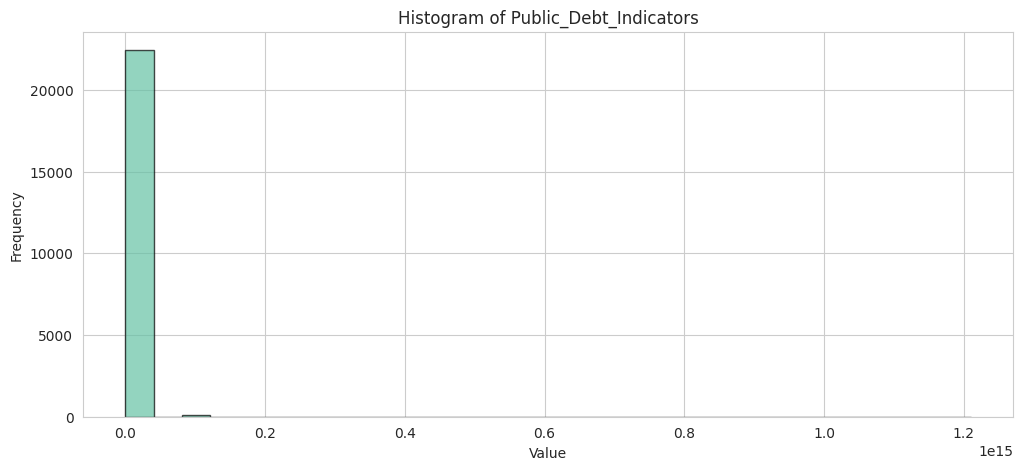

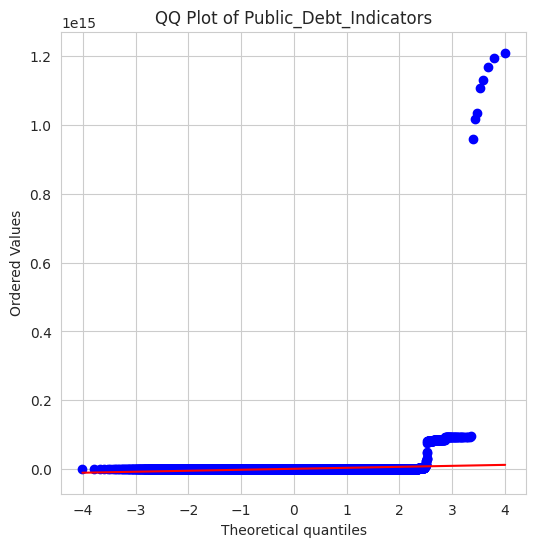


=== Analyzing Indicator: Environmental_Indicators ===
Mean: 316979406.38
Median: 10.42
Standard Deviation: 5561560036.39
Skewness: 71.36
Kurtosis: 7328.95


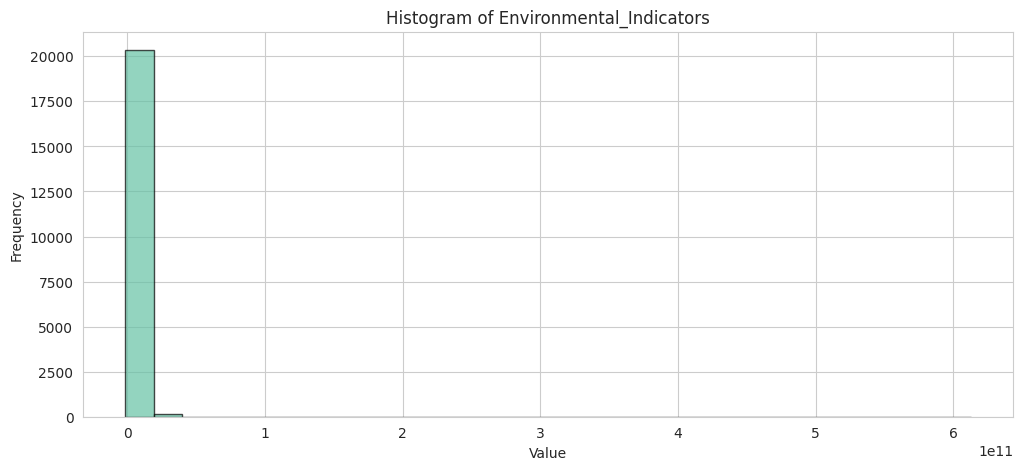

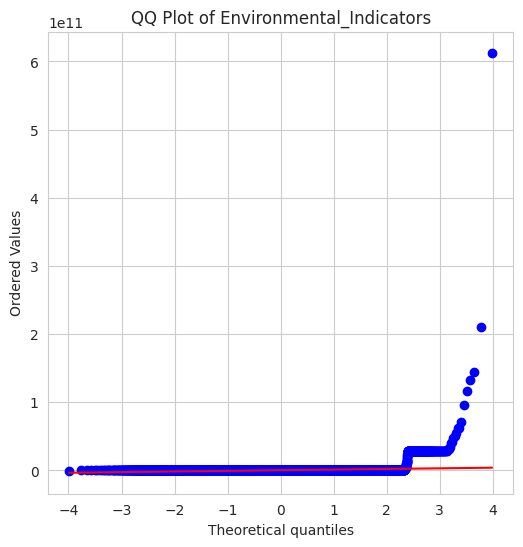


=== Analyzing Indicator: Social_Indicators ===
Mean: 9811841648.28
Median: 23.82
Standard Deviation: 1017217640954.92
Skewness: 163.56
Kurtosis: 28558.53


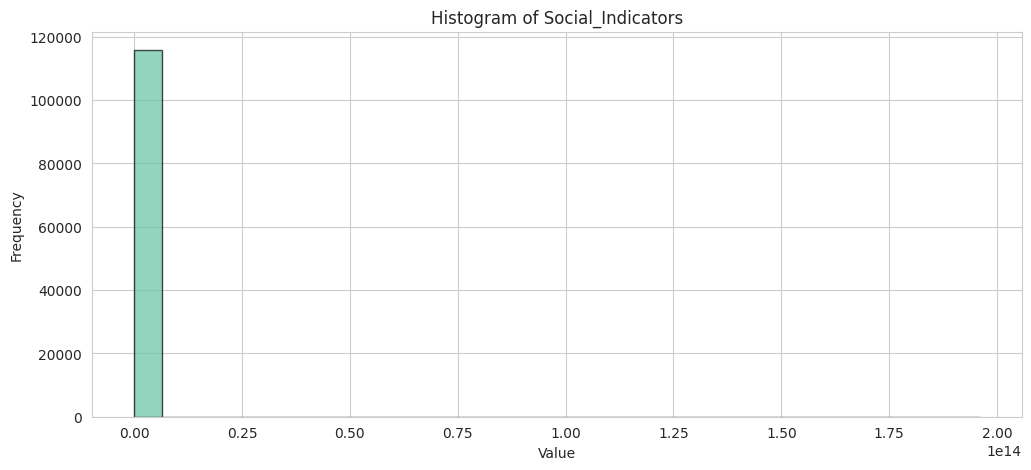

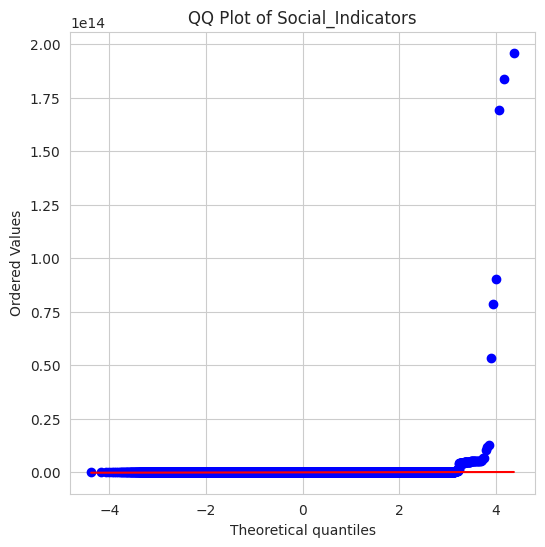


=== Analyzing Indicator: Statistical_Indicators ===
Mean: 17995987.06
Median: 12.00
Standard Deviation: 200411880.37
Skewness: 49.63
Kurtosis: 3280.05


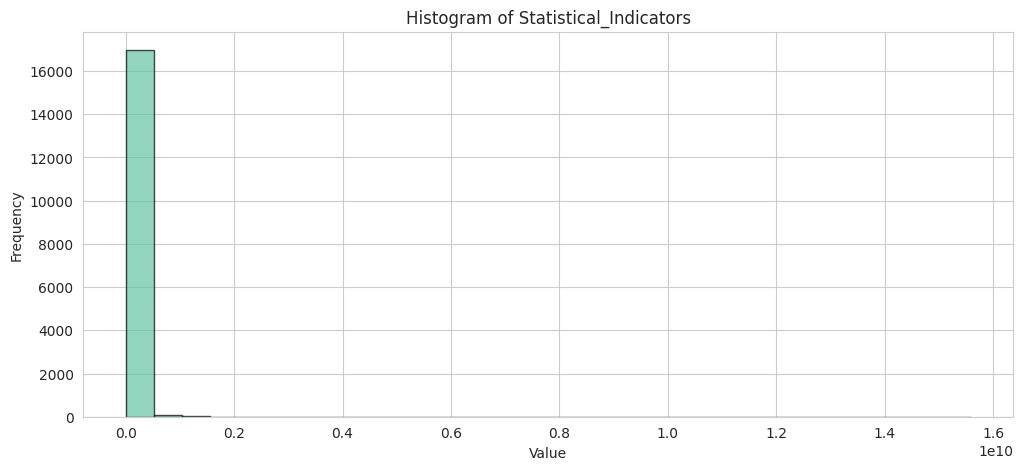

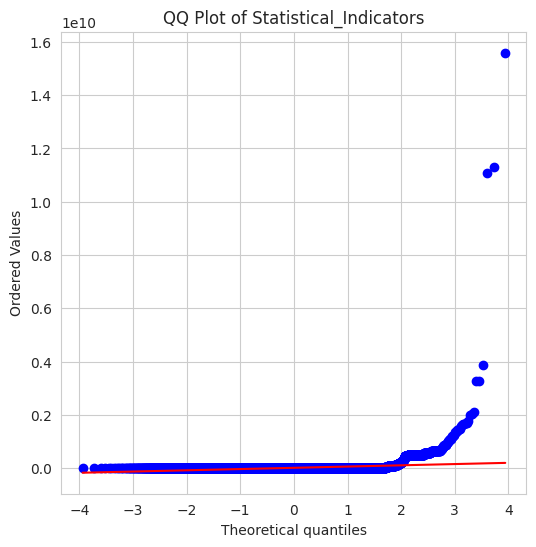


=== Analyzing Indicator: Uncategorized ===
Mean: 233660415371.97
Median: 95.73
Standard Deviation: 6709502168118.69
Skewness: 56.04
Kurtosis: 3623.26


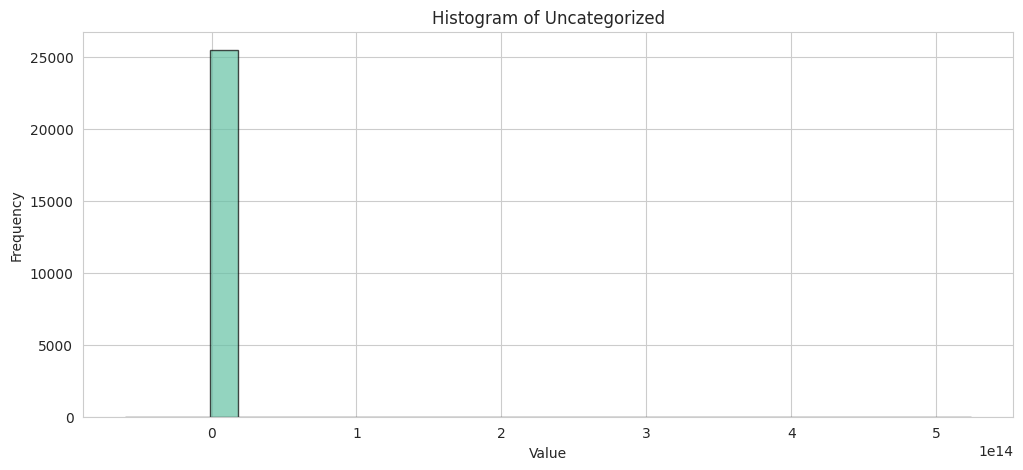

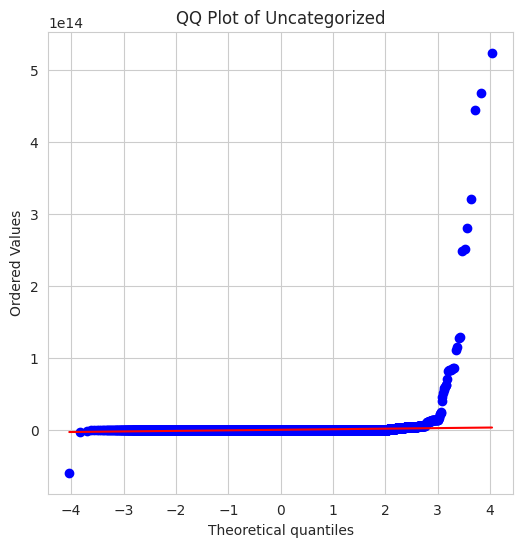

In [19]:
df = pd.read_csv('/content/Imputed_and_cleaned_data_with_region.csv')

# Get unique indicators
indicators = df['Indicator Category'].unique()

# Create a folder to save plots
!mkdir -p /content/Indicator_Distributions

# Loop through each indicator
for indicator in indicators:
    # Filter the DataFrame for the specific indicator
    df_indicator = df[df['Indicator Category'] == indicator]

    # Drop missing values from the 'Value' column (assuming the column name is 'Value')
    values = df_indicator['Value'].dropna()

    if len(values) < 10:
        print(f"Skipping {indicator} (not enough data points)")
        continue

    # Basic Statistics
    mean = values.mean()
    median = values.median()
    std_dev = values.std()
    skewness = values.skew()
    kurtosis = values.kurtosis()

    print(f"\n=== Analyzing Indicator: {indicator} ===")
    print(f"Mean: {mean:.2f}")
    print(f"Median: {median:.2f}")
    print(f"Standard Deviation: {std_dev:.2f}")
    print(f"Skewness: {skewness:.2f}")
    print(f"Kurtosis: {kurtosis:.2f}")

    # Plot Histogram
    plt.figure(figsize=(12,5))
    plt.hist(values, bins=30, edgecolor='k', alpha=0.7)
    plt.title(f"Histogram of {indicator}")
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    safe_name = str(indicator).replace('/', '_').replace(' ', '_').replace('\\', '_')
    plt.savefig(f'/content/Indicator_Distributions/{safe_name}_histogram.png')
    plt.show()
    plt.close()

    # Plot QQ Plot
    plt.figure(figsize=(6,6))
    stats.probplot(values, dist="norm", plot=plt)
    plt.title(f"QQ Plot of {indicator}")
    plt.grid(True)
    plt.savefig(f'/content/Indicator_Distributions/{safe_name}_qqplot.png')
    plt.show()
    plt.close()


#Economic Resilience Indicators
From the distribution plots, I can see that the Economic Indicators (images 3-4) show a highly skewed distribution with most values concentrated near zero, but with significant outliers. This pattern suggests:


*   Total reserves (includes gold) - A key buffer against external shocks
*   Reserves and related items (BoP) - Indicates balance of payments stability
*   Import coverage ratio - How long reserves can cover import needs
*   Export diversification index - Protection against sector-specific shocks
*   Fiscal buffer/space - Government's ability to respond to crises
*   The QQ plot shows significant deviation from normality at the upper tail, indicating the presence of extreme values that could represent either vulnerabilities or strengths in economic resilience.


#Social Equity Indicators
Looking at the Social Indicators distributions (images 9-10):

*   Income inequality measures - Gini coefficient or income quintile ratios
*  Poverty headcount ratio - Percentage of population below poverty line
*   Access to financial services - Account ownership across income groups
*   Gender gap in financial inclusion - Difference in account ownership by gender
*  Educational attainment equality - Distribution of education across population groups
*   The social indicators QQ plot shows discrete jumps at the upper range, suggesting potential grouping of countries by social development levels.


#Financial Development Indicators
Based on the Financial Indicators distributions (images 1-2):

*   Domestic credit to private sector (% of GDP) - Depth of financial intermediation
*   Stock market capitalization (% of GDP) - Capital market development
*   Bank branches per 100,000 adults - Financial access
*   Mobile money accounts per 1,000 adults - Digital financial inclusion
*   Non-performing loans ratio - Financial sector health
*   The highly skewed nature of financial indicators suggests using log transformations or percentile-based metrics when comparing countries.


#Public Debt Indicators (Images 5-6)
These can complement economic resilience metrics:

*   Public debt to GDP ratio - Fiscal sustainability
*   External debt service ratio - External vulnerability
*   Interest payment to revenue ratio - Fiscal flexibility


#Environmental Indicators (Images 7-8)
While not directly requested, these could be important for long-term resilience:
*   Carbon intensity of GDP - Climate transition risk
*   Natural resource depletion - Sustainability of growth model
*   Renewable energy adoption - Energy security

The extreme outliers in the environmental indicators suggest identifying and analyzing frontier performers separately.

In [20]:
df = pd.read_csv('/content/Imputed_and_cleaned_data_with_region.csv', low_memory=False)

# Filter rows where Indicator Category is 'Uncategorized'
uncategorized_df = df[df['Indicator Category'] == 'Uncategorized']

# Get unique Series Names
uncategorized_series_names = uncategorized_df['Series Name'].unique()

# Display the list
print("List of Series Names under 'Uncategorized':")
for idx, name in enumerate(uncategorized_series_names, 1):
    print(f"{idx}. {name}")


List of Series Names under 'Uncategorized':
1. Average precipitation in depth (mm per year)
2. B-READY: Dispute Resolution Pillar 1: Quality of Regulations for Dispute Resolution
3. B-READY: Dispute Resolution Pillar 3:  Ease of Resolving a Commercial Dispute
4. B-READY: Pillar 1: Regulatory Framework
5. Changes in inventories (constant LCU)
6. Changes in inventories (current LCU)
7. Changes in inventories (current US$)
8. Charges for the use of intellectual property, receipts (BoP, current US$)
9. Compensation of employees (current LCU)
10. Container port traffic (TEU: 20 foot equivalent units)
11. Control of Corruption: Estimate
12. Control of Corruption: Number of Sources
13. Control of Corruption: Percentile Rank
14. Control of Corruption: Percentile Rank, Lower Bound of 90% Confidence Interval
15. Control of Corruption: Percentile Rank, Upper Bound of 90% Confidence Interval
16. Control of Corruption: Standard Error
17. CPIA property rights and rule-based governance rating (1=low 

In [21]:
import pandas as pd
df = pd.read_csv('/content/Imputed_and_cleaned_data_with_region.csv', low_memory=False)

# Create sets for each category
financial_indicators = {
    "IFC, private nonguaranteed",
    "Listed domestic companies",
    "Portfolio equity, net inflows",
    "Reserves and related items",
    "S&P Global Equity Indices",
    "Total reserves (includes gold",
    "Total reserves minus gold",
    "Net errors and omissions"
}

economic_indicators = {
    "Changes in inventories",
    "Charges for the use of intellectual property, receipts",
    "Compensation of employees",
    "Container port traffic",
    "DEC alternative conversion factor",
    "Subsidies and other transfers",
    "Net incurrence of liabilities",
    "Firms competing against unregistered firms",
    "Firms offering formal training",
    "Firms that spend on R&D",
    "Industrial design applications",
    "Patent applications",
    "Scientific and technical journal articles",
    "Time required to obtain an operating license"
}

public_debt_indicators = {
    "Net bilateral aid flows from DAC donors",
    "Net ODA provided entries",
    "Net ODA received per capita"
}

social_indicators = {
    "Newborns protected against tetanus",
    "Prevalence of current tobacco use",
    "Probability of dying among adolescents",
    "Prosperity gap",
    "Pupils below minimum reading proficiency",
    "Persistence to grade 5",
    "GOAL 2: Zero Hunger",
    "GOAL 16: Peace and Justice Strong Institutions",
    "GOAL 17: Partnerships to achieve the Goal"
}

environmental_indicators = {
    "Average precipitation in depth",
    "Surface area",
    "Electric power transmission and distribution losses",
    "Firms experiencing electrical outages",
    "Power outages",
    "Value lost due to electrical outages"
}

statistical_indicators = {
    "CPI base year",
    "CRVS (WDI)",
    "Geospatial data available at 1st Admin Level",
    "SDDS/e-GDDS subscription",
    "Control of Corruption",
    "Political Stability",
    "Regulatory Quality",
    "Rule of Law",
    "CPIA",
    "B-READY",
    "Fixed broadband",
    "Rail lines",
    "Secure Internet servers"
}

# Create a mapping dictionary
category_mapping = {}

for s in financial_indicators:
    category_mapping[s] = 'Financial Indicators'
for s in economic_indicators:
    category_mapping[s] = 'Economic Indicators'
for s in public_debt_indicators:
    category_mapping[s] = 'Public Debt Indicators'
for s in social_indicators:
    category_mapping[s] = 'Social Indicators'
for s in environmental_indicators:
    category_mapping[s] = 'Environmental Indicators'
for s in statistical_indicators:
    category_mapping[s] = 'Statistical Indicators'

# Apply partial string matching
for partial_name, category in category_mapping.items():
    mask = (df['Indicator Category'] == 'Uncategorized') & df['Series Name'].str.contains(partial_name, case=False, na=False, regex=False)

    df.loc[mask, 'Indicator Category'] = category

# Save the updated file
df.to_csv('/content/Imputed_and_cleaned_data_UPDATED.csv', index=False)

print("Updated the indicator categories and saved to 'Imputed_and_cleaned_data_UPDATED.csv'.")

# Verify still Uncategorized Series (optional check)
still_uncategorized_df = df[df['Indicator Category'] == 'Uncategorized']
still_uncategorized_series = still_uncategorized_df['Series Name'].unique()

print(f"\nTotal Uncategorized series after cleaning: {len(still_uncategorized_series)}")
print("\nList of still Uncategorized Series Names:")
for idx, name in enumerate(still_uncategorized_series, 1):
    print(f"{idx}. {name}")


Updated the indicator categories and saved to 'Imputed_and_cleaned_data_UPDATED.csv'.

Total Uncategorized series after cleaning: 11

List of still Uncategorized Series Names:
1. Firms experiencing losses due to theft and vandalism (% of firms)
2. Fixed telephone subscriptions
3. Losses due to theft and vandalism (% of annual sales for affected firms)
4. Mobile cellular subscriptions
5. Net ODA provided, to the least developed countries (current US$)
6. Net ODA provided, total (constant 2021 US$)
7. Net ODA provided, total (current US$)
8. Persistence to last grade of primary, total (% of cohort)
9. Railways, goods transported (million ton-km)
10. Railways, passengers carried (million passenger-km)
11. Time to obtain an electrical connection (days)


In [22]:
import pandas as pd
df = pd.read_csv('/content/Imputed_and_cleaned_data_UPDATED.csv', low_memory=False)

# Filter rows where Indicator Category is 'Uncategorized'
uncategorized_df = df[df['Indicator Category'] == 'Uncategorized']

# Get unique Series Names
uncategorized_series_names = uncategorized_df['Series Name'].unique()

# Display the list
print("List of Series Names under 'Uncategorized':")
for idx, name in enumerate(uncategorized_series_names, 1):
    print(f"{idx}. {name}")


List of Series Names under 'Uncategorized':
1. Firms experiencing losses due to theft and vandalism (% of firms)
2. Fixed telephone subscriptions
3. Losses due to theft and vandalism (% of annual sales for affected firms)
4. Mobile cellular subscriptions
5. Net ODA provided, to the least developed countries (current US$)
6. Net ODA provided, total (constant 2021 US$)
7. Net ODA provided, total (current US$)
8. Persistence to last grade of primary, total (% of cohort)
9. Railways, goods transported (million ton-km)
10. Railways, passengers carried (million passenger-km)
11. Time to obtain an electrical connection (days)


In [23]:
import pandas as pd
df = pd.read_csv('/content/Imputed_and_cleaned_data_UPDATED.csv')

# Check the first few rows
print(df.head())

# Get the unique indicators
indicators = df['Indicator Category'].unique()
!mkdir -p /content/Split_by_Indicator

# Now proceed with splitting
for indicator in indicators:
    safe_indicator = str(indicator).replace('/', '_').replace(' ', '_').replace('\\', '_')  # to avoid invalid file names
    df_indicator = df[df['Indicator Category'] == indicator]
    df_indicator.to_csv(f'/content/Split_by_Indicator/{safe_indicator}.csv', index=False)

print("Splitting complete. Files saved in '/content/Split_by_Indicator'")

<ipython-input-23-396fb3a23a14>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Imputed_and_cleaned_data_UPDATED.csv')


  Country Name Country Code  \
0      Albania          ALB   
1    Argentina          ARG   
2      Armenia          ARM   
3    Australia          AUS   
4      Austria          AUT   

                                         Series Name           Series Code  \
0  Gross PSD, Budgetary Central Gov., All maturit...  DP.DOD.DECD.CR.BC.Z1   
1  Gross PSD, Budgetary Central Gov., All maturit...  DP.DOD.DECD.CR.BC.Z1   
2  Gross PSD, Budgetary Central Gov., All maturit...  DP.DOD.DECD.CR.BC.Z1   
3  Gross PSD, Budgetary Central Gov., All maturit...  DP.DOD.DECD.CR.BC.Z1   
4  Gross PSD, Budgetary Central Gov., All maturit...  DP.DOD.DECD.CR.BC.Z1   

  Quarter      Value  Year Source    Indicator Category  \
0      Q1  32.793823  2021   QPSD  Financial_Indicators   
1      Q1  32.793823  2021   QPSD  Financial_Indicators   
2      Q1  32.793823  2021   QPSD  Financial_Indicators   
3      Q1  32.793823  2021   QPSD  Financial_Indicators   
4      Q1  22.753407  2021   QPSD  Financial_Indi

In [24]:
# List of indicator files
indicator_files = {
    'Financial Indicators': '/content/Split_by_Indicator/Financial_Indicators.csv',
    'Economic Indicators': '/content/Split_by_Indicator/Economic_Indicators.csv',
    'Public Debt Indicators': '/content/Split_by_Indicator/Public_Debt_Indicators.csv',
    'Social Indicators': '/content/Split_by_Indicator/Social_Indicators.csv',
    'Environmental Indicators': '/content/Split_by_Indicator/Environmental_Indicators.csv',
    'Statistical Indicators': '/content/Split_by_Indicator/Statistical_Indicators.csv'
}

# Loop through files
for category, file_path in indicator_files.items():
    print(f"\n=== {category} ===")

    df = pd.read_csv(file_path)

    # 1. Original Value
    values_original = df['Value']

    # 2. Signed Log Transform
    values_signed_log = np.sign(values_original) * np.log1p(np.abs(values_original))

    # 3. Signed Square Root Transform
    values_signed_sqrt = np.sign(values_original) * np.sqrt(np.abs(values_original))

    # 4. Inverse Transform
    values_inverse = 1 / (values_original + 1)
    values_inverse.replace([np.inf, -np.inf], np.nan, inplace=True)

    # 5. Yeo-Johnson Transform
    pt = PowerTransformer(method='yeo-johnson')
    values_yeojohnson = pt.fit_transform(values_original.values.reshape(-1, 1))
    values_yeojohnson = pd.Series(values_yeojohnson.flatten())

    # 6. Calculate skewness
    skew_original = values_original.skew()
    skew_signed_log = values_signed_log.skew()
    skew_signed_sqrt = values_signed_sqrt.skew()
    skew_inverse = values_inverse.skew()
    skew_yeojohnson = values_yeojohnson.skew()

    # 7. Print skewness
    print(f"Original skewness: {skew_original:.4f}")
    print(f"Signed Log transform skewness: {skew_signed_log:.4f}")
    print(f"Signed Square Root transform skewness: {skew_signed_sqrt:.4f}")
    print(f"Inverse transform skewness: {skew_inverse:.4f}")
    print(f"Yeo-Johnson transform skewness: {skew_yeojohnson:.4f}")

    # 8. Find best transformation
    transformations = {
        'Original': abs(skew_original),
        'Signed Log': abs(skew_signed_log),
        'Signed Square Root': abs(skew_signed_sqrt),
        'Inverse': abs(skew_inverse),
        'Yeo-Johnson': abs(skew_yeojohnson)
    }
    best_transform = min(transformations.items(), key=lambda x: x[1])

    print(f"Best transformation for {category}: {best_transform[0]} (skewness {best_transform[1]:.4f})")



=== Financial Indicators ===
Original skewness: 8.4259
Signed Log transform skewness: -0.7885
Signed Square Root transform skewness: 3.3950
Inverse transform skewness: -30.7743
Yeo-Johnson transform skewness: 0.9805
Best transformation for Financial Indicators: Signed Log (skewness 0.7885)

=== Economic Indicators ===
Original skewness: 22.4667
Signed Log transform skewness: -0.3955
Signed Square Root transform skewness: 9.5007
Inverse transform skewness: 5.3499
Yeo-Johnson transform skewness: 0.7855
Best transformation for Economic Indicators: Signed Log (skewness 0.3955)

=== Public Debt Indicators ===
Original skewness: 8.8579
Signed Log transform skewness: -3.3494
Signed Square Root transform skewness: 2.7648
Inverse transform skewness: 8.8005
Yeo-Johnson transform skewness: 4.5207
Best transformation for Public Debt Indicators: Signed Square Root (skewness 2.7648)

=== Social Indicators ===
Original skewness: 1.3905
Signed Log transform skewness: 0.7612
Signed Square Root transfo

#Economic Resilience Indicators
Since the Economic Indicators show high skewness (22.4667) with Signed Log being the best transformation (skewness 0.3955), I recommend these specific indicators:


*   GDP growth stability (coefficient of variation of growth rates)
*   Total reserves to external debt ratio (buffer capacity)
*   Export diversification index (concentration of export markets/products)
*   Fiscal space (government debt to GDP ratio, inverse relationship)
*   Current account balance sustainability (volatility-adjusted measure)

These indicators would benefit from log transformation when analyzing cross-country comparisons, as it would normalize the highly skewed distributions shown in the economic QQ plots.

#Social Equity Indicators
The Social Indicators have the least original skewness (1.3905) with Inverse transformation providing near-normal distribution (skewness 0.0460), suggesting these indicators:

*   Income equality measures (Gini coefficient or income quintile ratios)
*  Financial inclusion gap (difference in account ownership between richest/poorest quintiles)
*   Gender parity in financial access (female/male ratio of account ownership)
*   Rural-urban financial access gap (difference in financial service points per capita)
*   Social safety net coverage (% of vulnerable population covered by social protection)

The relatively lower skewness suggests these indicators may be more suitable for direct cross-country comparisons without extensive transformation.

#Financial Development Indicators
Financial Indicators show high skewness (8.4259) with Signed Log being the best transformation (skewness 0.7885), suggesting these specific indicators:

*   Credit to private sector ratio (% of GDP, log-transformed)
*   Credit to private sector ratio (% of GDP, log-transformed)
*   Stock market capitalization (% of GDP, log-transformed)
*   Banking sector concentration (assets of three largest banks as % of total)
*   Financial depth (M2 to GDP ratio, log-transformed)
*   Digital financial penetration (mobile money accounts per 1,000 adults)

The log transformation would be particularly important when creating composite indices or conducting regression analyses with these financial indicators.

#Additional Indicator Categories
From the transformation analysis, I note that:

Public Debt Indicators benefit from Square Root transformation
Environmental Indicators and Statistical Indicators work best with Yeo-Johnson transformation

This suggests that when incorporating indicators from these categories into your analysis:

Apply the appropriate transformation method for each category
Consider the differing scales and distributions when combining indicators
Use standardization methods (like z-scores) after transformation for comparability

In [25]:
# Create the EDA Summary DataFrame
eda_summary = pd.DataFrame({
    'Indicator Category': [
        'Financial Indicators',
        'Economic Indicators',
        'Public Debt Indicators',
        'Social Indicators',
        'Environmental Indicators',
        'Statistical Indicators'
    ],
    'Best Transformation': [
        'Signed Log',         # From your output
        'Signed Log',         # From your output
        'Signed Square Root', # From your output
        'Inverse',            # From your output
        'Yeo-Johnson',        # From your output
        'Yeo-Johnson'         # From your output
    ],
    'Best Skewness (absolute)': [
        round(0.7885, 4),  # Financial Indicators
        round(0.3955, 4),  # Economic Indicators
        round(2.7648, 4),  # Public Debt Indicators
        round(0.0460, 4),  # Social Indicators
        round(0.3037, 4),  # Environmental Indicators
        round(0.1501, 4)   # Statistical Indicators
    ]
})

# Save the summary to CSV
output_path = '/content/Transformation_Summary_Report.csv'
eda_summary.to_csv(output_path, index=False)

# Display final message and DataFrame
print(f"Saved Final Corrected EDA Summary Report at: {output_path}\n")
display(eda_summary)


Saved Final Corrected EDA Summary Report at: /content/Transformation_Summary_Report.csv



Indicator Category Best Transformation  Best Skewness (absolute)
0      Financial Indicators          Signed Log                    0.7885
1       Economic Indicators          Signed Log                    0.3955
2    Public Debt Indicators  Signed Square Root                    2.7648
3         Social Indicators             Inverse                    0.0460
4  Environmental Indicators         Yeo-Johnson                    0.3037
5    Statistical Indicators         Yeo-Johnson                    0.1501

In [26]:
# Indicator files
indicator_files = {
    'Financial Indicators': '/content/Split_by_Indicator/Financial_Indicators.csv',
    'Economic Indicators': '/content/Split_by_Indicator/Economic_Indicators.csv',
    'Public Debt Indicators': '/content/Split_by_Indicator/Public_Debt_Indicators.csv',
    'Social Indicators': '/content/Split_by_Indicator/Social_Indicators.csv',
    'Environmental Indicators': '/content/Split_by_Indicator/Environmental_Indicators.csv',
    'Statistical Indicators': '/content/Split_by_Indicator/Statistical_Indicators.csv'
}

# Updated Transformation method per category
transformation_choice = {
    'Financial Indicators': 'signed_log',   # As per EDA
    'Economic Indicators': 'signed_log',    # As per EDA
    'Public Debt Indicators': 'signed_sqrt', # As per EDA
    'Social Indicators': 'inverse',         # As per EDA
    'Environmental Indicators': 'yeo_johnson', # As per EDA
    'Statistical Indicators': 'yeo_johnson'    # As per EDA
}

# Output folder
output_folder = '/content/Transformed_Indicators/'
!mkdir -p /content/Transformed_Indicators

# Apply transformations
for category, file_path in indicator_files.items():
    print(f"\nProcessing: {category}")

    # Load the data
    df = pd.read_csv(file_path)

    # Select 'Value' column
    values_original = df['Value']

    # Decide transformation
    transformation = transformation_choice[category]

    if transformation == 'signed_log':
        df['Value_Transformed'] = np.sign(values_original) * np.log1p(np.abs(values_original))
    elif transformation == 'signed_sqrt':
        df['Value_Transformed'] = np.sign(values_original) * np.sqrt(np.abs(values_original))
    elif transformation == 'inverse':
        df['Value_Transformed'] = 1 / (values_original + 1)
        df['Value_Transformed'].replace([np.inf, -np.inf], np.nan, inplace=True)
    elif transformation == 'yeo_johnson':
        pt = PowerTransformer(method='yeo-johnson')
        # Reshape needed for sklearn transformers
        values_yeojohnson = pt.fit_transform(values_original.values.reshape(-1, 1))
        df['Value_Transformed'] = values_yeojohnson.flatten()

    # Save transformed dataset
    output_file = output_folder + category.replace(' ', '_') + '_FinalTransformed.csv'
    df.to_csv(output_file, index=False)

    print(f"Saved: {output_file}")



Processing: Financial Indicators
Saved: /content/Transformed_Indicators/Financial_Indicators_FinalTransformed.csv

Processing: Economic Indicators
Saved: /content/Transformed_Indicators/Economic_Indicators_FinalTransformed.csv

Processing: Public Debt Indicators
Saved: /content/Transformed_Indicators/Public_Debt_Indicators_FinalTransformed.csv

Processing: Social Indicators
Saved: /content/Transformed_Indicators/Social_Indicators_FinalTransformed.csv

Processing: Environmental Indicators
Saved: /content/Transformed_Indicators/Environmental_Indicators_FinalTransformed.csv

Processing: Statistical Indicators
Saved: /content/Transformed_Indicators/Statistical_Indicators_FinalTransformed.csv


<ipython-input-26-3b486e8e5f5b>:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Value_Transformed'].replace([np.inf, -np.inf], np.nan, inplace=True)


In [27]:
transformed_files = {
    'Financial Indicators': '/content/Transformed_Indicators/Financial_Indicators_FinalTransformed.csv',
    'Economic Indicators': '/content/Transformed_Indicators/Economic_Indicators_FinalTransformed.csv',
    'Public Debt Indicators': '/content/Transformed_Indicators/Public_Debt_Indicators_FinalTransformed.csv',
    'Social Indicators': '/content/Transformed_Indicators/Social_Indicators_FinalTransformed.csv',
    'Environmental Indicators': '/content/Transformed_Indicators/Environmental_Indicators_FinalTransformed.csv',
    'Statistical Indicators': '/content/Transformed_Indicators/Statistical_Indicators_FinalTransformed.csv'
}

# Dictionary to hold DataFrames
dataframes = {}

for category, file_path in transformed_files.items():
    df = pd.read_csv(file_path)
    dataframes[category] = df
    print(f"Loaded {category} with shape {df.shape}")

Loaded Financial Indicators with shape (1824, 11)
Loaded Economic Indicators with shape (4104, 11)
Loaded Public Debt Indicators with shape (5928, 11)
Loaded Social Indicators with shape (2280, 11)
Loaded Environmental Indicators with shape (1368, 11)
Loaded Statistical Indicators with shape (8208, 11)


In [28]:
# Check basic info
for category, df in dataframes.items():
    print(f"\n=== {category} ===")
    print(df.head(2))
    print(f"Shape: {df.shape}")
    print(f"Missing Values:\n{df.isnull().sum()}")



=== Financial Indicators ===
    Country Name Country Code                            Series Name  \
0         Canada          CAN  IFC, private nonguaranteed (NFL, US$)   
1  United States          USA  IFC, private nonguaranteed (NFL, US$)   

      Series Code  Quarter         Value  Year Source    Indicator Category  \
0  DT.NFL.NIFC.CD        0  5.834364e+06  2021    WDI  Financial Indicators   
1  DT.NFL.NIFC.CD        0  5.834364e+06  2021    WDI  Financial Indicators   

          Region  Value_Transformed  
0  North America          15.579276  
1  North America          15.579276  
Shape: (1824, 11)
Missing Values:
Country Name          0
Country Code          0
Series Name           0
Series Code           0
Quarter               0
Value                 0
Year                  0
Source                0
Indicator Category    0
Region                0
Value_Transformed     0
dtype: int64

=== Economic Indicators ===
    Country Name Country Code                            Seri

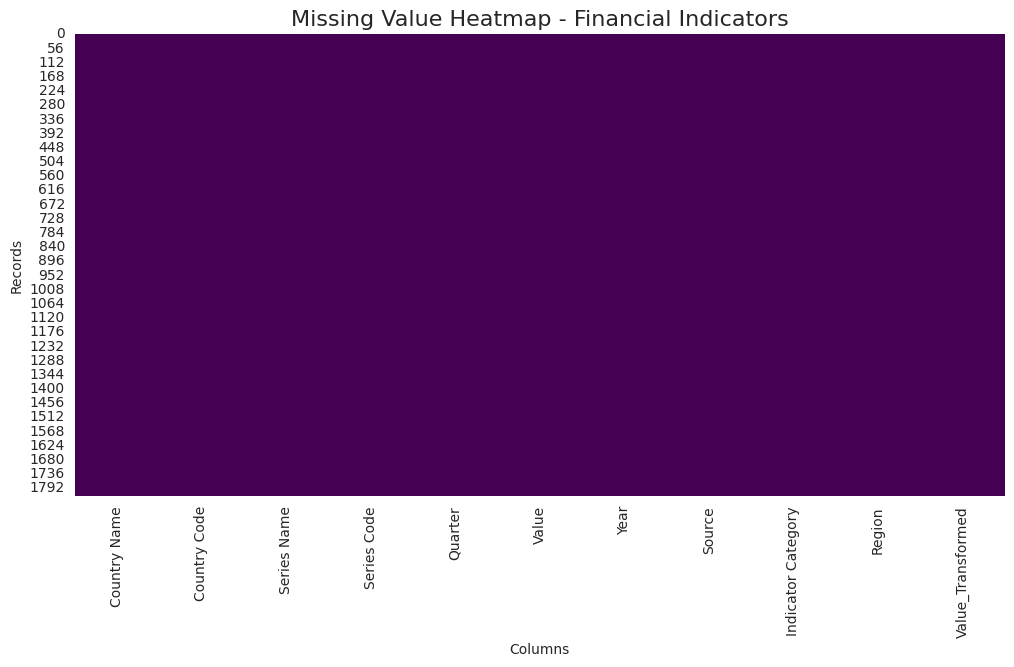

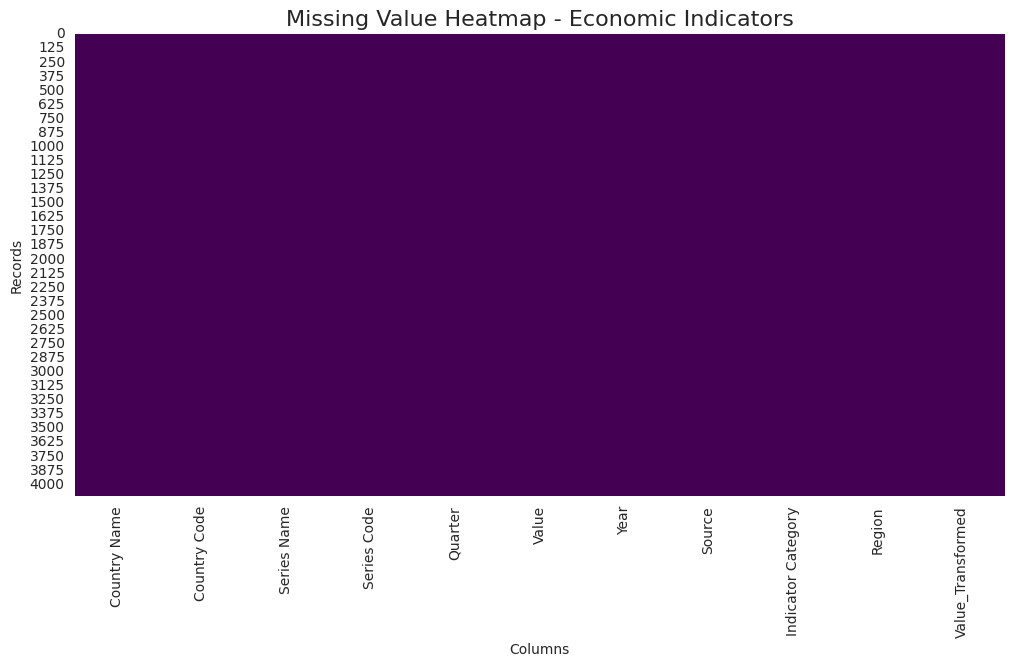

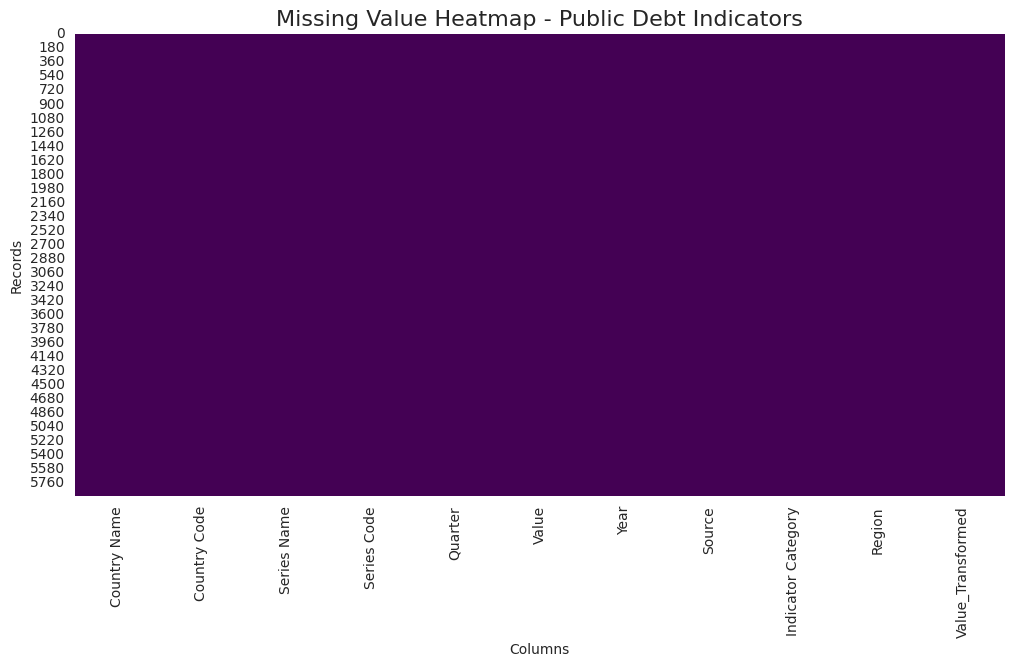

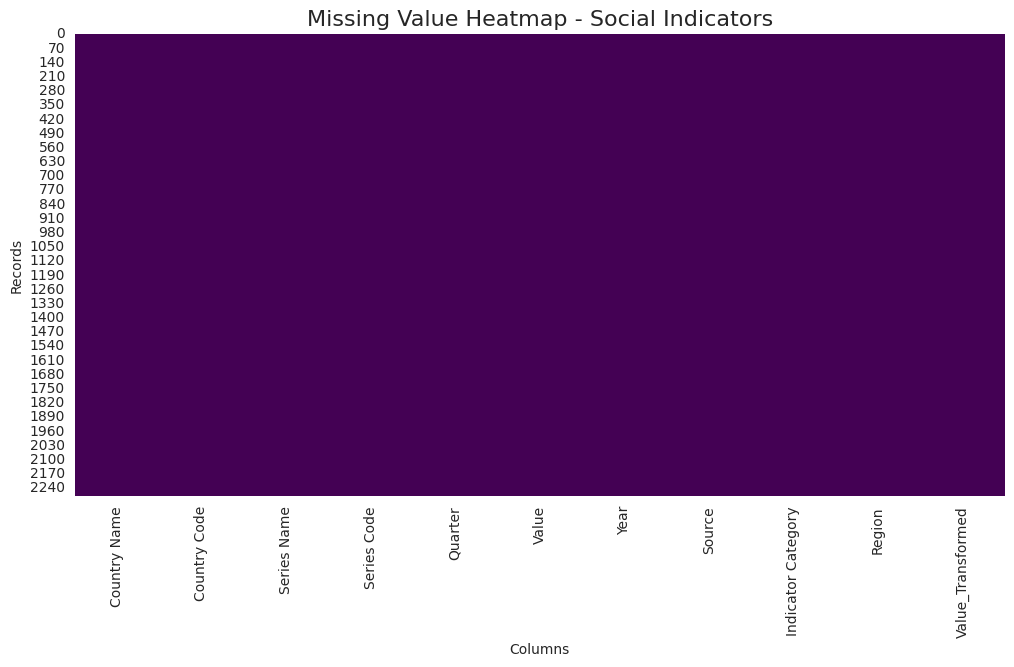

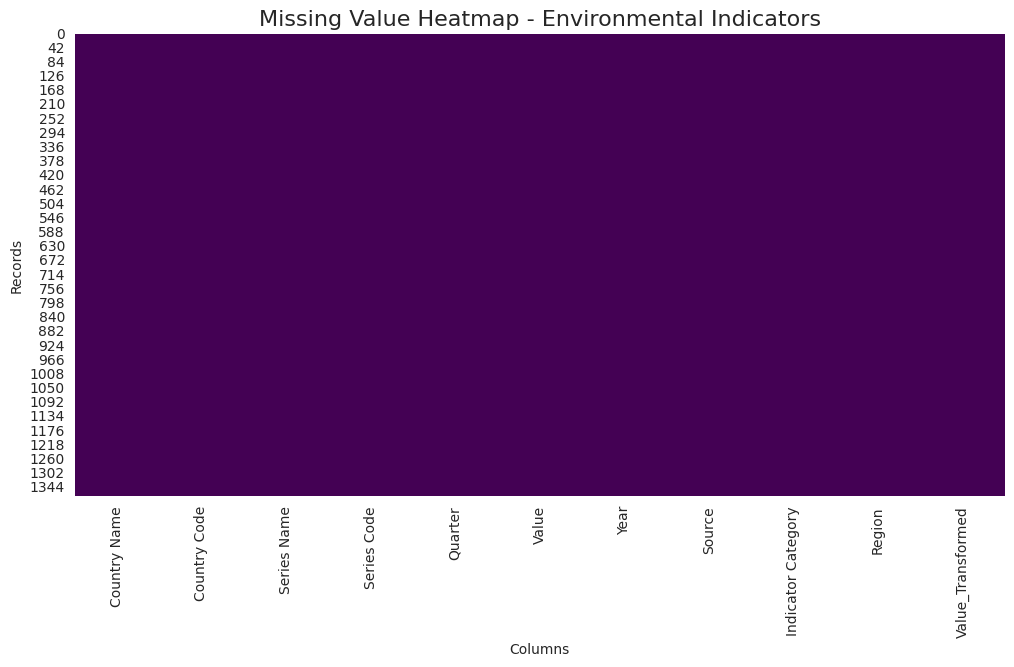

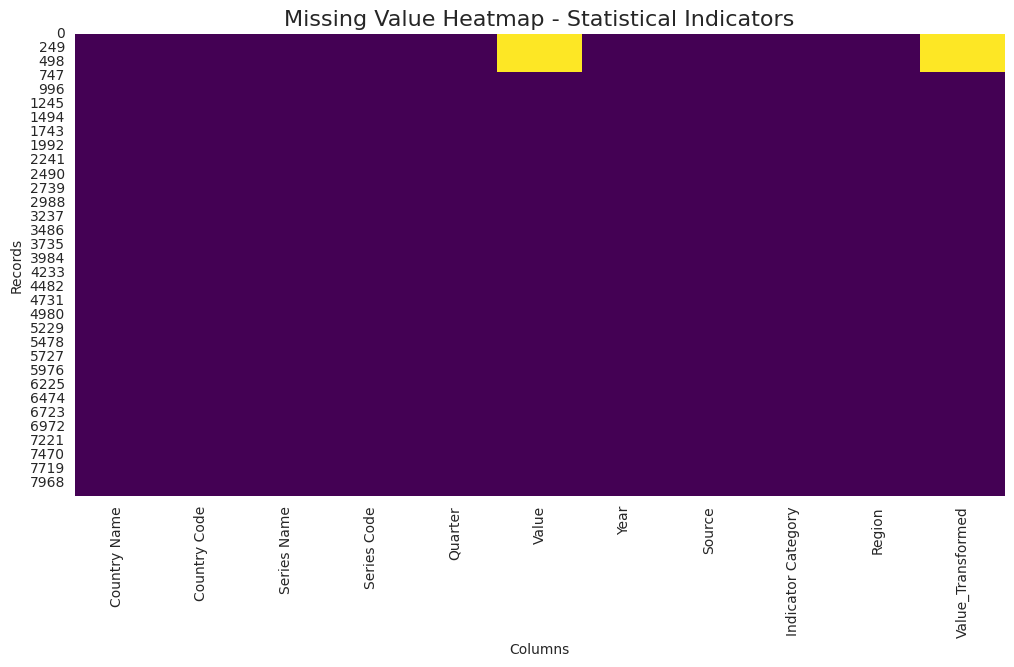

In [29]:
# Plot missing value heatmaps
for category, df in dataframes.items():
    plt.figure(figsize=(12,6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title(f"Missing Value Heatmap - {category}", fontsize=16)
    plt.xlabel("Columns")
    plt.ylabel("Records")
    plt.show()


In [30]:
df = pd.read_csv('/content/Imputed_and_cleaned_data_UPDATED.csv', low_memory=False)

# Print total rows and columns
print(f"Total rows: {df.shape[0]}, Total columns: {df.shape[1]}")

# Check missing values in each column
missing_counts = df.isnull().sum()

# Filter only columns with missing values
missing_counts = missing_counts[missing_counts > 0]

# Display
if not missing_counts.empty:
    print("\nColumns with missing values:")
    print(missing_counts)

    # Calculate missing percentage
    missing_percentage = (missing_counts / len(df)) * 100
    print("\nMissing Percentage per column:")
    print(missing_percentage.round(2))
else:
    print("\nNo missing values found in the dataset!")


Total rows: 874836, Total columns: 10

Columns with missing values:
Value    47196
dtype: int64

Missing Percentage per column:
Value    5.39
dtype: float64


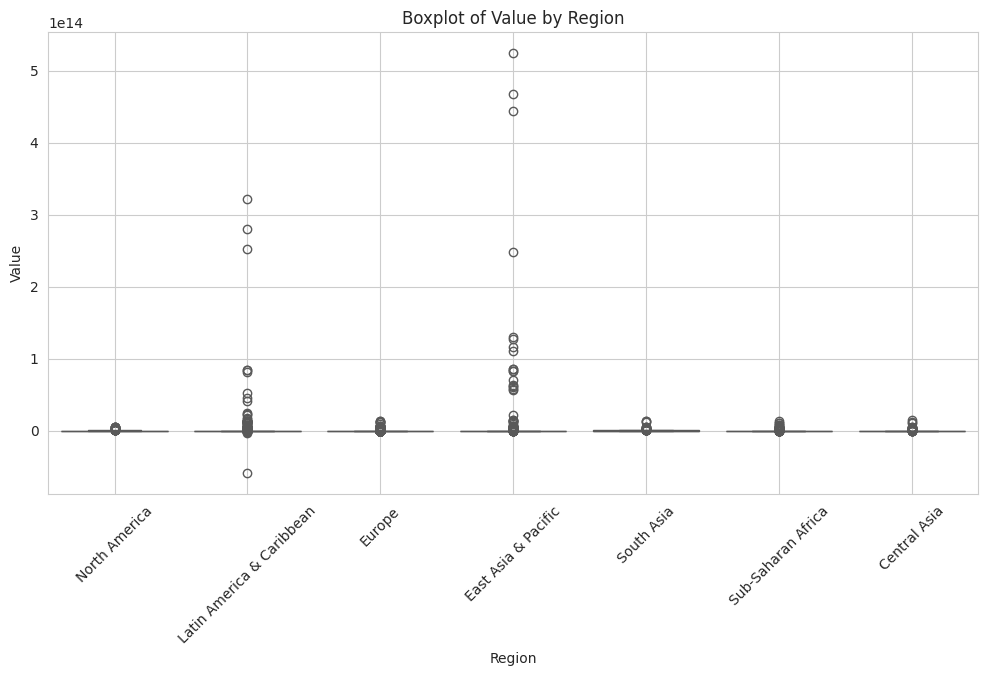

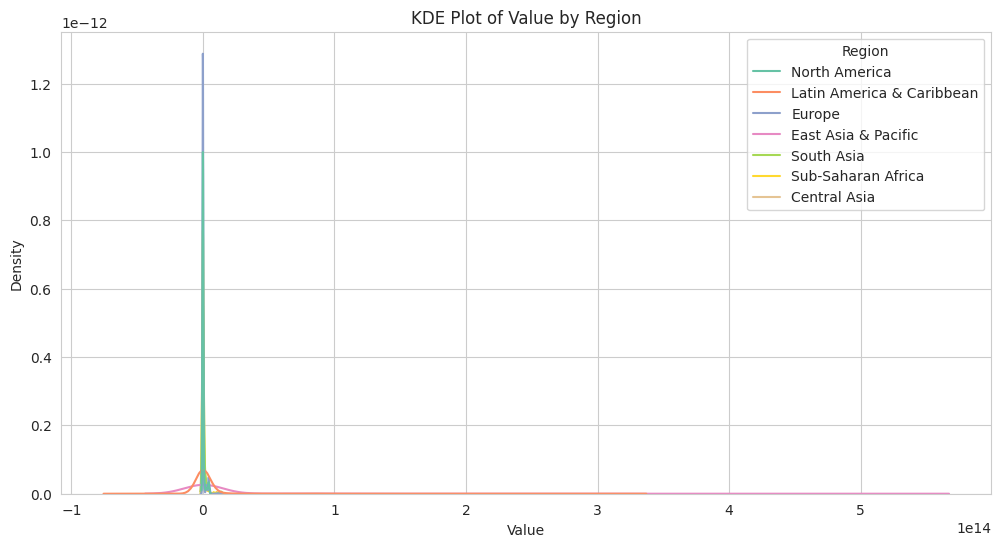

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Boxplot for Value by Region
plt.figure(figsize=(12,6))

# For example, if 'Region' is in the 'Economic Indicators' DataFrame:
sns.boxplot(x='Region', y='Value', data=dataframes.get('Economic Indicators', df))

plt.title('Boxplot of Value by Region')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Example: KDE plot
plt.figure(figsize=(12,6))

# Replace 'df' with the correct DataFrame that contains the 'Region' column
# For example, if 'Region' is in the 'Economic Indicators' DataFrame:
sns.kdeplot(data=dataframes.get('Economic Indicators', df), x='Value', hue='Region', common_norm=False)

plt.title('KDE Plot of Value by Region')
plt.grid(True)
plt.show()

#Economic Resilience Indicators
Considering the regional variations shown in your boxplots:

*   GDP growth volatility - Less affected by extreme outliers, making cross-regional comparisons more valid
*   External vulnerability ratio - (Short-term debt + current account deficit)/Reserves
*   Fiscal buffer/space - Government savings or surplus as % of GDP
*   Export concentration index - Particularly relevant for regions showing high variability
*   Productivity growth stability - Coefficient of variation of productivity growth

The East Asia & Pacific region shows the highest outliers in the boxplot, suggesting particular attention should be paid to scaling or normalization when comparing economic resilience across regions.

#Social Equity Indicators
Considering the narrower distribution pattern for most regions in your visualization:

*   Income share ratio - Top 10% to bottom 40% income share
*   Financial inclusion gap - Difference between highest and lowest income quintile in account ownership
*   Gender equity in labor force participation - Female to male participation rate
*   Access to education - Secondary education completion rate gap by income quintile
*   Health coverage disparity - Difference in health coverage between rural and urban areas

Social indicators typically show less extreme outliers than financial indicators, making them more suitable for direct regional comparisons.

#Financial Development Indicators
Given the significant outliers shown in your regional distribution:

*   Financial depth - Domestic credit to private sector (% of GDP)
*   Access to finance - Bank accounts per 1,000 adults
*   Capital market development - Stock market capitalization (% of GDP)
*   Banking sector efficiency - Net interest margin
*   Financial innovation - Digital payment adoption rate

For financial indicators, log transformation would be particularly important when making regional comparisons, as East Asia & Pacific and Latin America & Caribbean regions show significantly different distributions with extreme outliers.

#Regional Considerations for Indicator Selection
Your visualizations reveal important regional patterns that should inform indicator selection:

High-variability regions (East Asia & Pacific, Latin America & Caribbean):

*   Use median rather than mean values
*   Apply robust normalization techniques
*   Consider region-specific benchmarking

Lower-variability regions (North America, Europe, Sub-Saharan Africa):
*   Can use more conventional statistical approaches
*   Mean values may be more representative
*   Cross-region comparisons more valid

All regions:

*   The KDE plot shows that despite outliers, the bulk of values are concentrated near zero
*   Consider using percentile-based measures rather than absolute values
*   For composite indices, use standardization methods that are less sensitive to outliers



Loaded Financial Indicators with shape (1824, 11)
Loaded Economic Indicators with shape (4104, 11)
Loaded Public Debt Indicators with shape (5928, 11)
Loaded Social Indicators with shape (2280, 11)
Loaded Environmental Indicators with shape (1368, 11)
Loaded Statistical Indicators with shape (8208, 11)

=== EDA for Financial Indicators ===


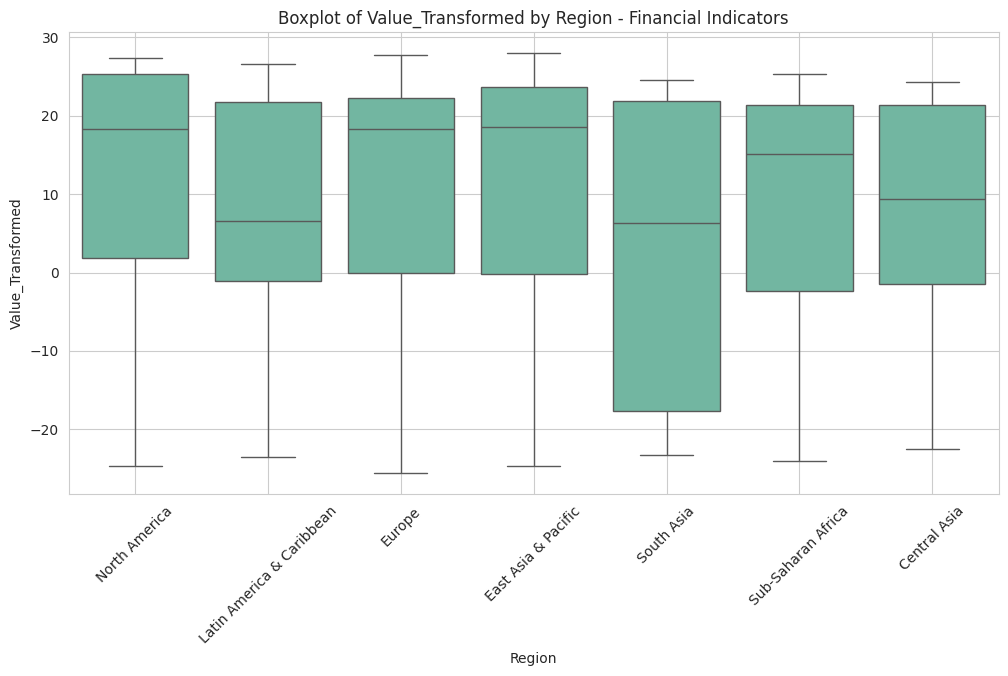

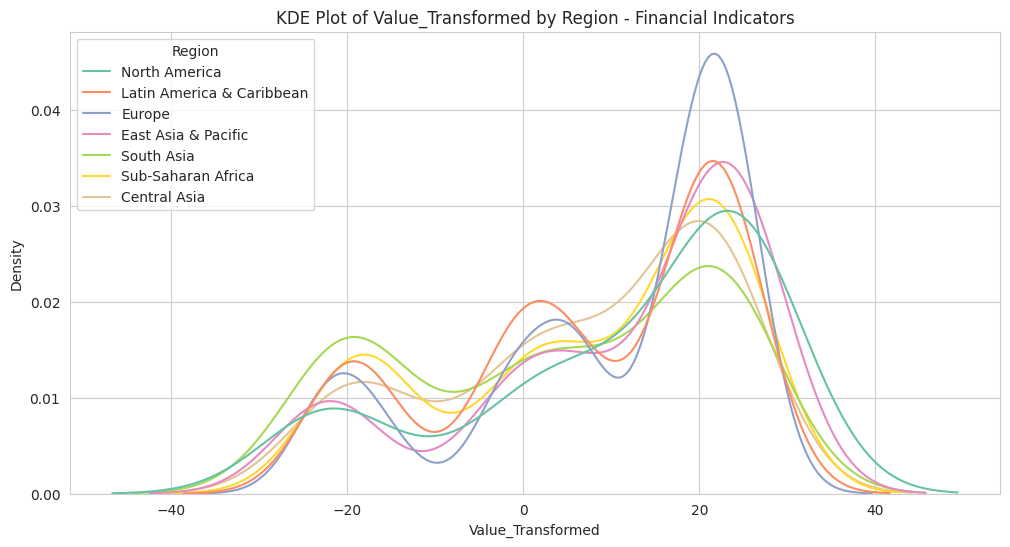


- Outlier Detection:
Z-score based outliers: 0 rows
IQR based outliers: 0 rows

- Transformation Evaluation:
Skewness:
Original: -0.7885
Signed Log: -0.9856
Signed Sqrt: -0.9372
Inverse: -4.8855
Box-Cox (positive values only): -0.6058
Yeo-Johnson: -0.4220

- Scaling Comparison:


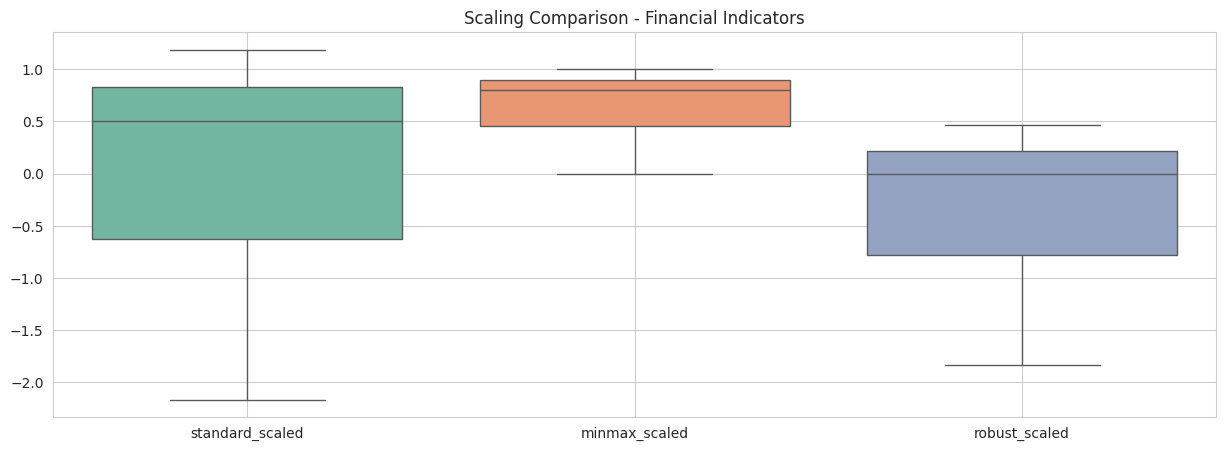


- Tailored Recommendations:
Best Transformation: Yeo-Johnson (skewness 0.4220)
Scaling: Use RobustScaler if many outliers exist, otherwise StandardScaler.


=== EDA for Economic Indicators ===


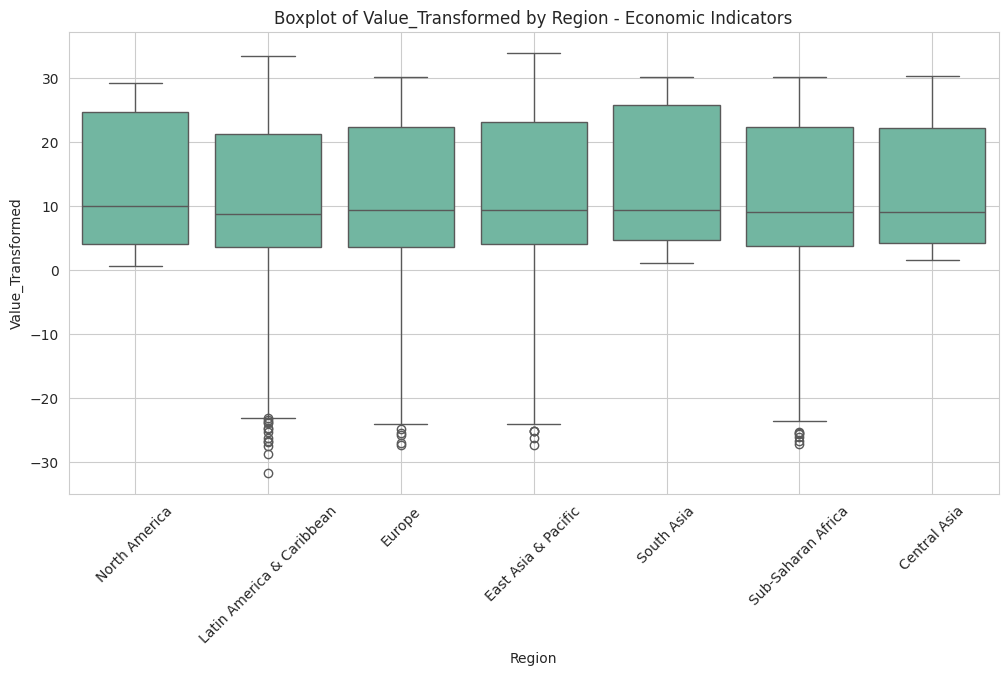

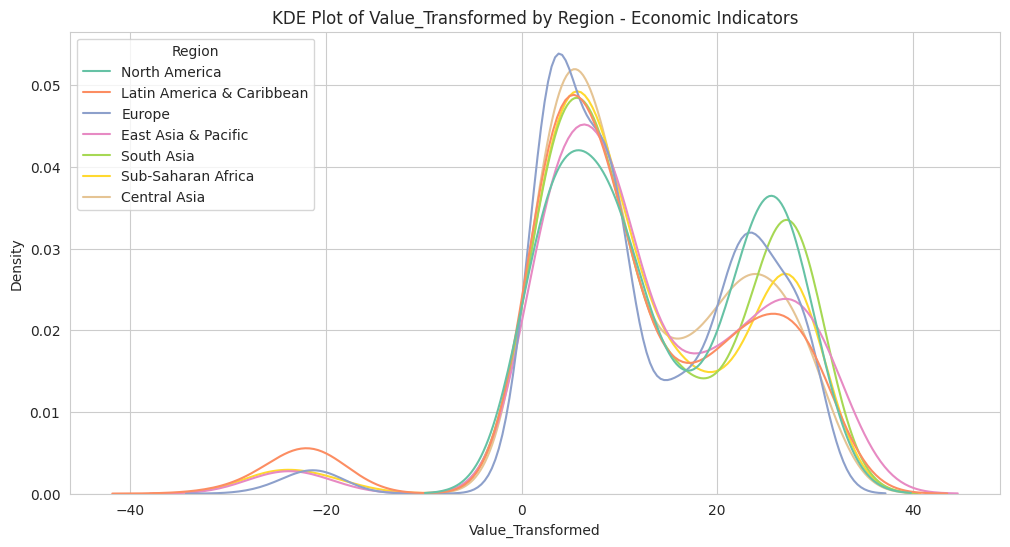


- Outlier Detection:
Z-score based outliers: 75 rows
IQR based outliers: 25 rows

- Transformation Evaluation:
Skewness:
Original: -0.3955
Signed Log: -2.4429
Signed Sqrt: -1.7673
Inverse: 1.8819
Box-Cox (positive values only): -0.1072
Yeo-Johnson: 0.1383

- Scaling Comparison:


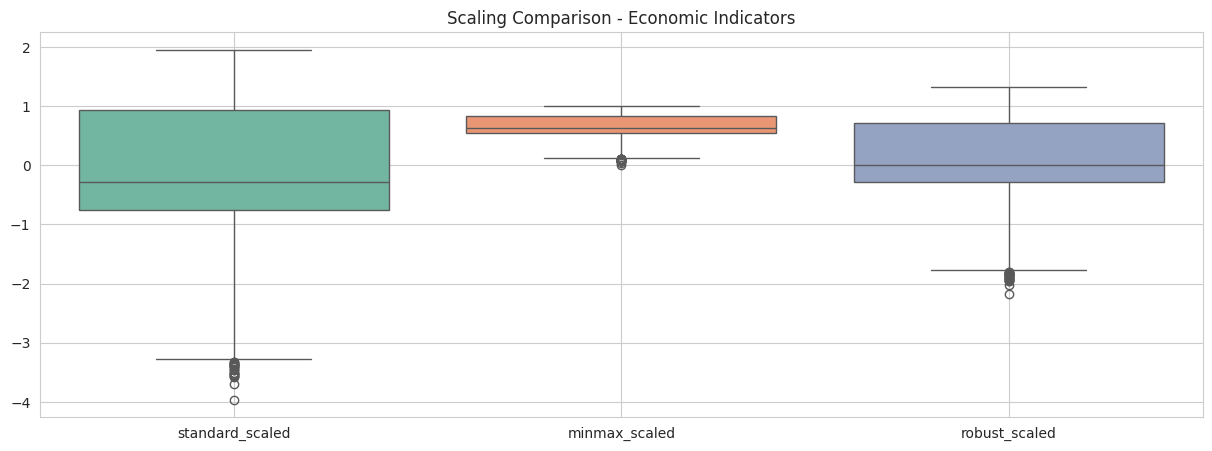


- Tailored Recommendations:
Best Transformation: Yeo-Johnson (skewness 0.1383)
Scaling: Use RobustScaler if many outliers exist, otherwise StandardScaler.


=== EDA for Public Debt Indicators ===


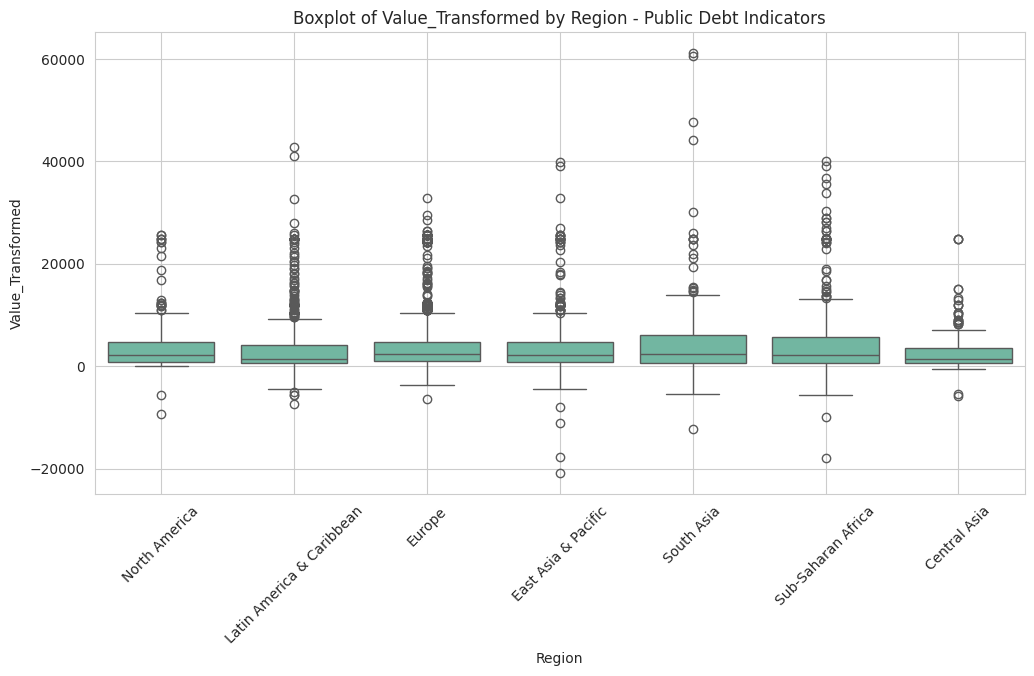

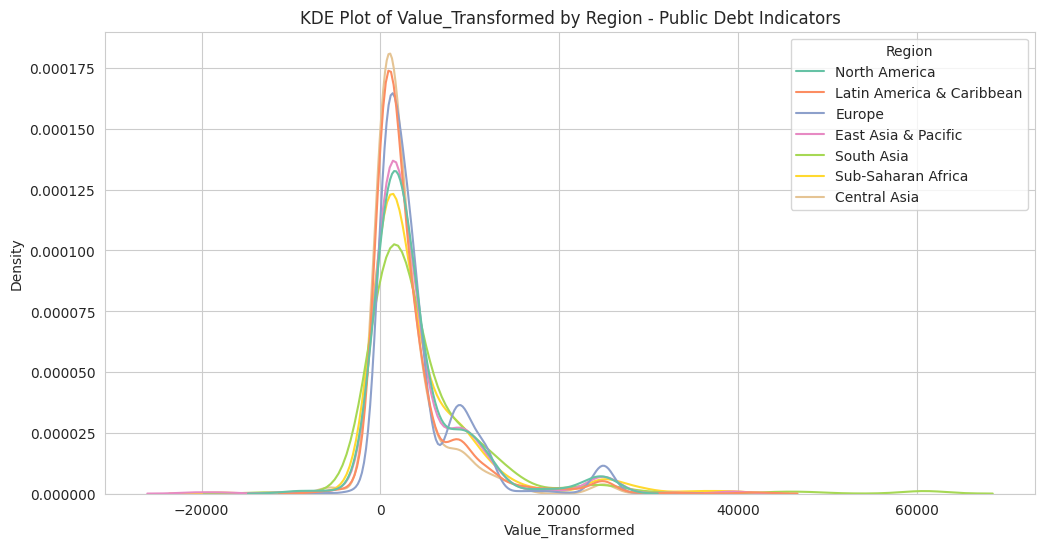


- Outlier Detection:
Z-score based outliers: 210 rows
IQR based outliers: 534 rows

- Transformation Evaluation:
Skewness:
Original: 2.7648
Signed Log: -3.3712
Signed Sqrt: 0.7207
Inverse: 8.3053
Box-Cox (positive values only): 0.0157
Yeo-Johnson: 1.5037

- Scaling Comparison:


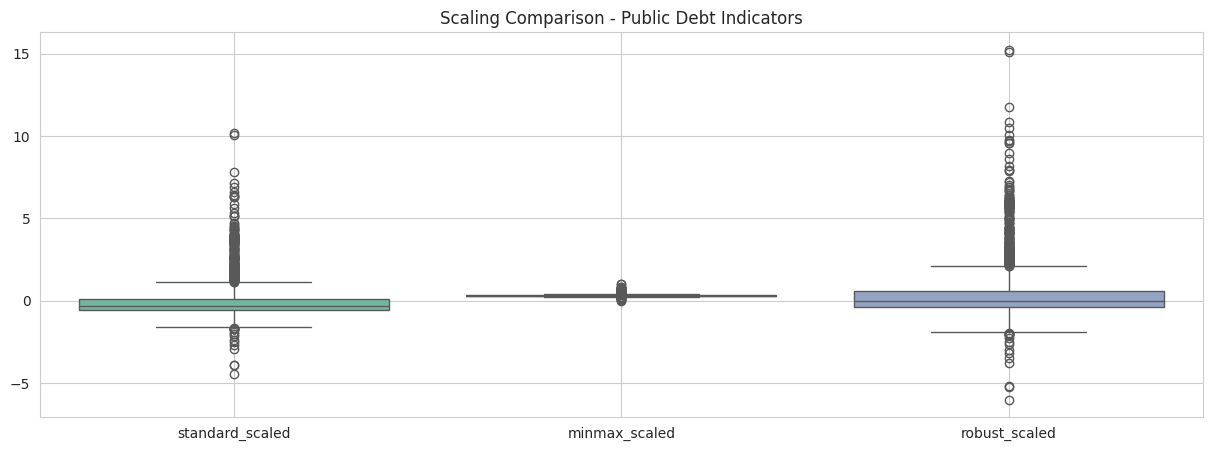


- Tailored Recommendations:
Best Transformation: Signed Sqrt (skewness 0.7207)
Scaling: Use RobustScaler if many outliers exist, otherwise StandardScaler.


=== EDA for Social Indicators ===


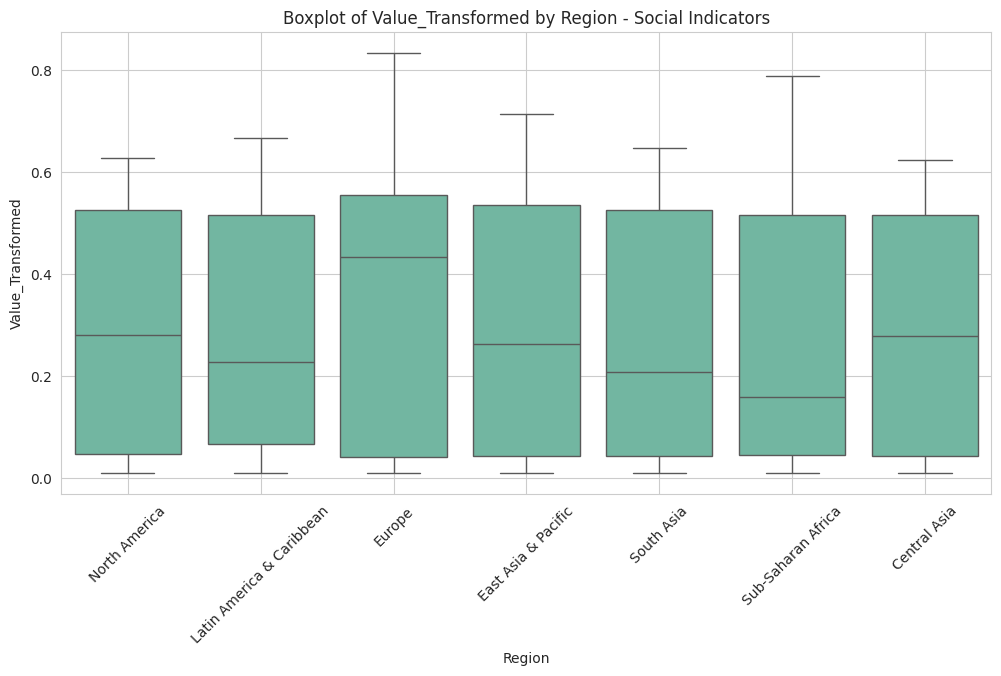

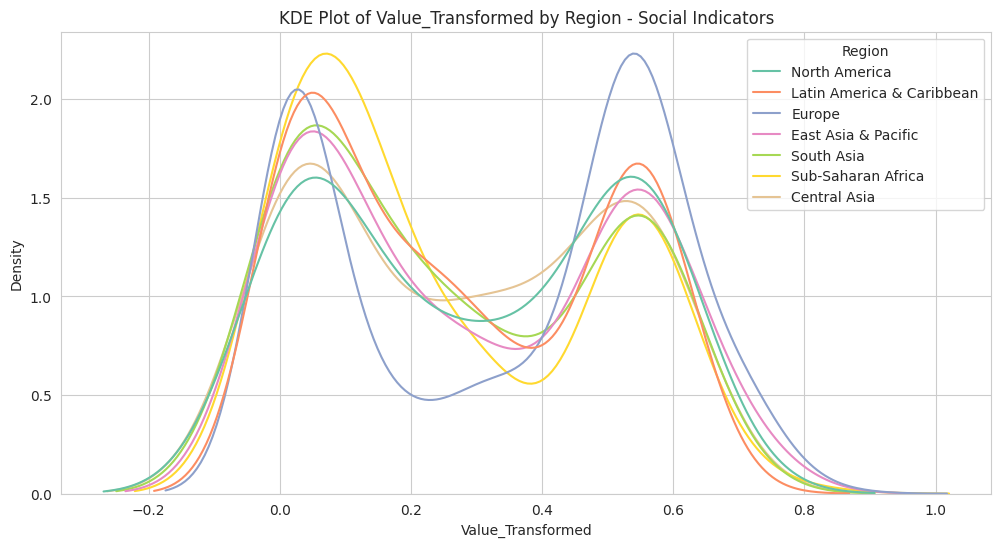


- Outlier Detection:
Z-score based outliers: 0 rows
IQR based outliers: 0 rows

- Transformation Evaluation:
Skewness:
Original: 0.0460
Signed Log: -0.0634
Signed Sqrt: -0.3007
Inverse: 0.1643
Box-Cox (positive values only): -0.3664
Yeo-Johnson: -0.0309

- Scaling Comparison:


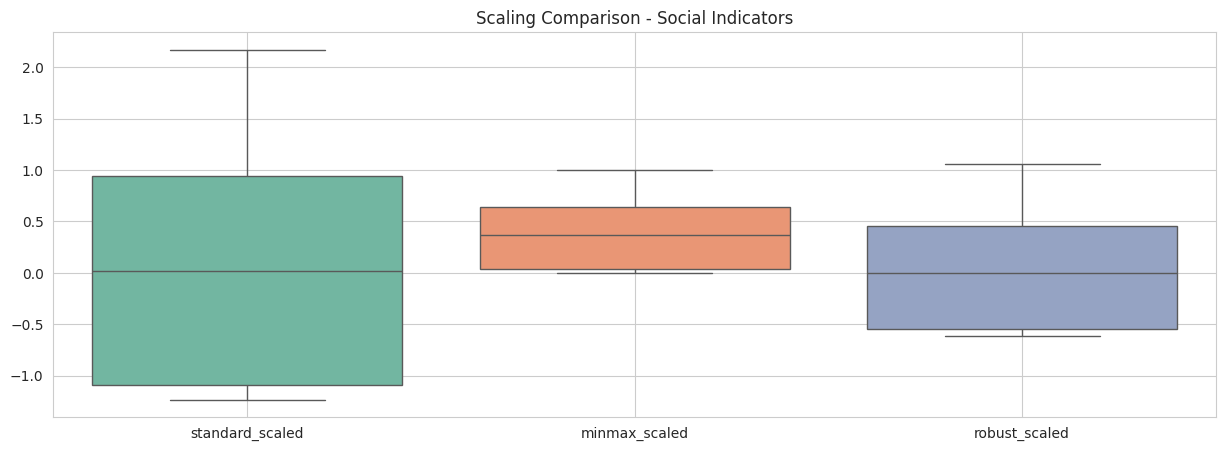


- Tailored Recommendations:
Best Transformation: Yeo-Johnson (skewness 0.0309)
Scaling: Use RobustScaler if many outliers exist, otherwise StandardScaler.


=== EDA for Environmental Indicators ===


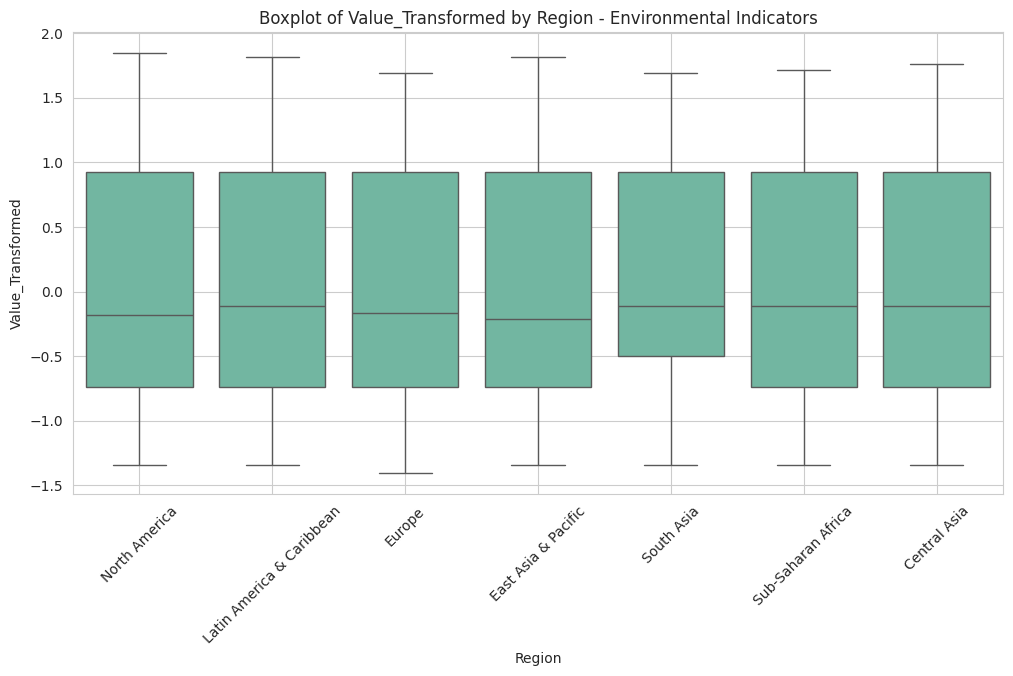

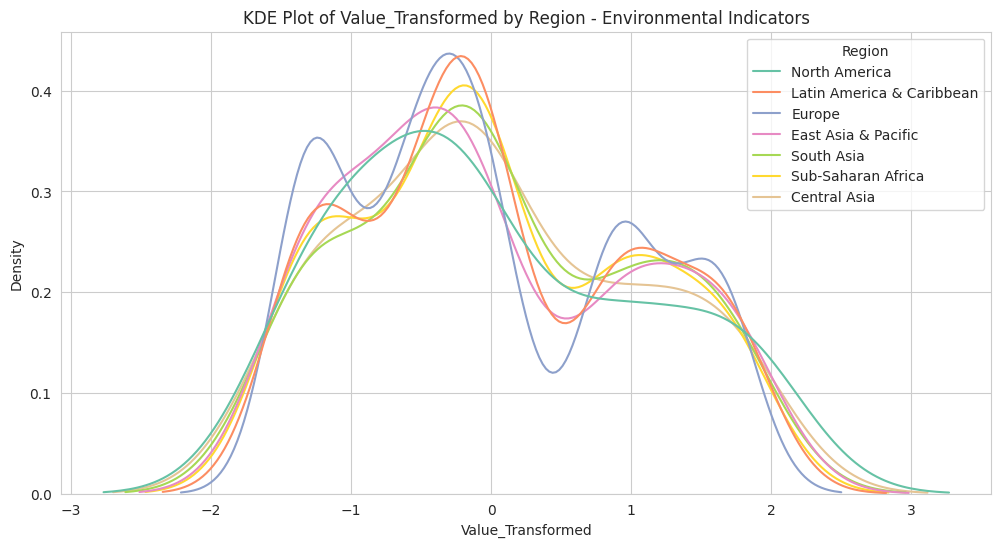


- Outlier Detection:
Z-score based outliers: 0 rows
IQR based outliers: 0 rows

- Transformation Evaluation:
Skewness:
Original: 0.3037
Signed Log: 0.2820
Signed Sqrt: 0.3519
Inverse: -30.0145
Box-Cox (positive values only): -0.5106
Yeo-Johnson: 0.0403

- Scaling Comparison:


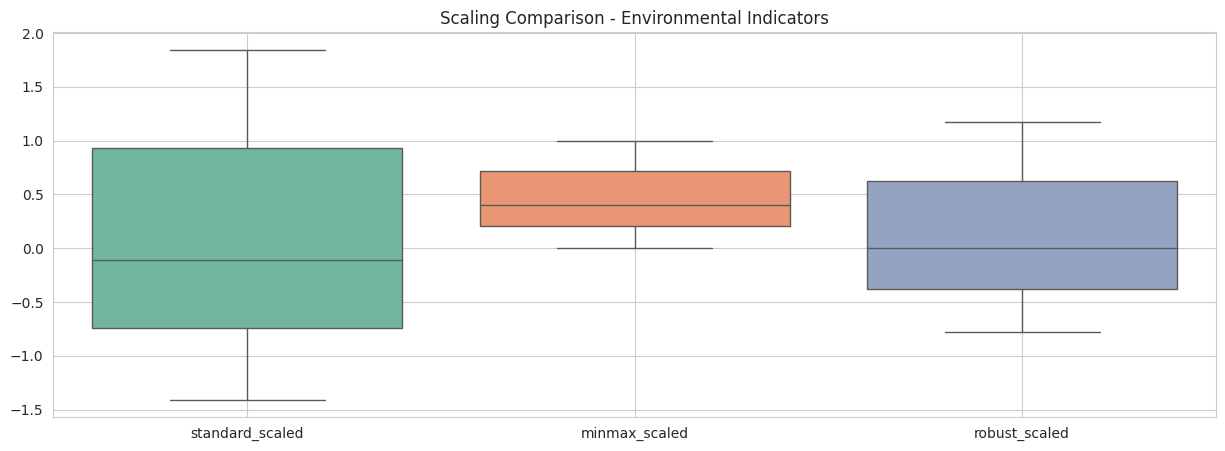


- Tailored Recommendations:
Best Transformation: Yeo-Johnson (skewness 0.0403)
Scaling: Use RobustScaler if many outliers exist, otherwise StandardScaler.


=== EDA for Statistical Indicators ===


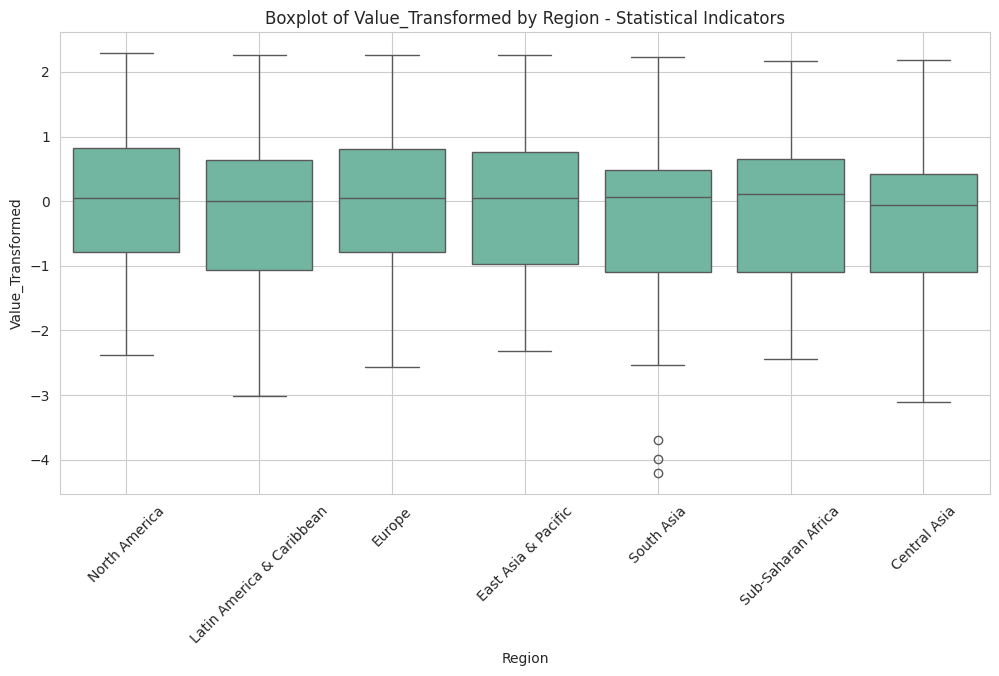

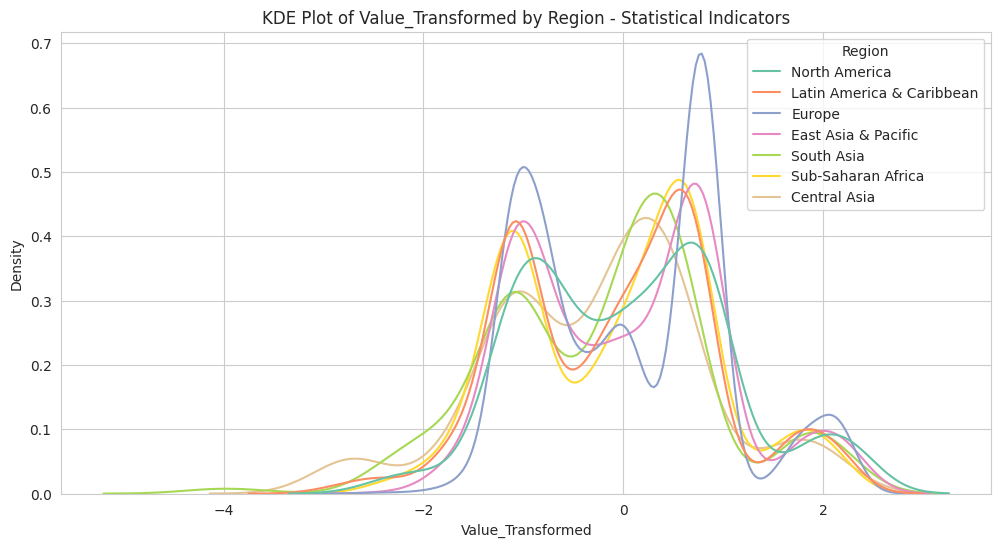


- Outlier Detection:
Z-score based outliers: 0 rows
IQR based outliers: 3 rows

- Transformation Evaluation:
Skewness:
Original: 0.1501
Signed Log: 0.0403
Signed Sqrt: -0.0116
Inverse: -22.4169
Box-Cox (positive values only): -0.0193
Yeo-Johnson: 0.0215

- Scaling Comparison:


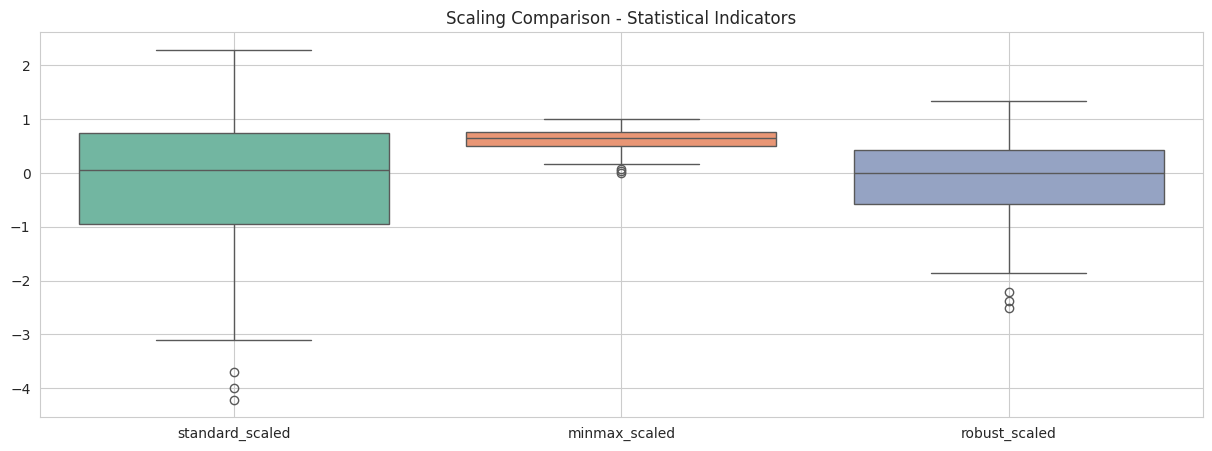


- Tailored Recommendations:
Best Transformation: Signed Sqrt (skewness 0.0116)
Scaling: Use RobustScaler if many outliers exist, otherwise StandardScaler.


Full EDA Complete for All Categories!


In [32]:
from scipy.stats import boxcox
transformed_files = {
    'Financial Indicators': '/content/Transformed_Indicators/Financial_Indicators_FinalTransformed.csv',
    'Economic Indicators': '/content/Transformed_Indicators/Economic_Indicators_FinalTransformed.csv',
    'Public Debt Indicators': '/content/Transformed_Indicators/Public_Debt_Indicators_FinalTransformed.csv',
    'Social Indicators': '/content/Transformed_Indicators/Social_Indicators_FinalTransformed.csv',
    'Environmental Indicators': '/content/Transformed_Indicators/Environmental_Indicators_FinalTransformed.csv',
    'Statistical Indicators': '/content/Transformed_Indicators/Statistical_Indicators_FinalTransformed.csv'
}


dataframes = {}
for category, file_path in transformed_files.items():
    df = pd.read_csv(file_path)
    dataframes[category] = df
    print(f"Loaded {category} with shape {df.shape}")

# EDA for each category
for category, df in dataframes.items():
    print(f"\n=== EDA for {category} ===")

    # 1. Regional Comparisons
    if 'Region' in df.columns:
        plt.figure(figsize=(12,6))
        sns.boxplot(x='Region', y='Value_Transformed', data=df)
        plt.title(f'Boxplot of Value_Transformed by Region - {category}')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

        plt.figure(figsize=(12,6))
        sns.kdeplot(data=df, x='Value_Transformed', hue='Region', common_norm=False)
        plt.title(f'KDE Plot of Value_Transformed by Region - {category}')
        plt.grid(True)
        plt.show()
    else:
        print("Region column missing - skipping regional comparisons.")

    # 2. Outlier Detection
    print("\n- Outlier Detection:")

    # Z-Score Method
    df['z_score'] = zscore(df['Value_Transformed'])
    z_outliers = df[(df['z_score'] > 3) | (df['z_score'] < -3)]
    print(f"Z-score based outliers: {z_outliers.shape[0]} rows")

    # IQR Method
    Q1 = df['Value_Transformed'].quantile(0.25)
    Q3 = df['Value_Transformed'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    iqr_outliers = df[(df['Value_Transformed'] < lower_bound) | (df['Value_Transformed'] > upper_bound)]
    print(f"IQR based outliers: {iqr_outliers.shape[0]} rows")

    # 3. Transformation Evaluation
    print("\n- Transformation Evaluation:")

    signed_log = np.sign(df['Value_Transformed']) * np.log1p(np.abs(df['Value_Transformed']))
    signed_sqrt = np.sign(df['Value_Transformed']) * np.sqrt(np.abs(df['Value_Transformed']))
    inverse = 1 / (df['Value_Transformed'] + 1)
    inverse.replace([np.inf, -np.inf], np.nan, inplace=True)

    pt = PowerTransformer(method='yeo-johnson')
    yeo_johnson = pt.fit_transform(df[['Value_Transformed']])

    # Only apply Box-Cox on strictly positive values
    if (df['Value_Transformed'] > 0).sum() > 0:
        boxcox_values, _ = boxcox(df[df['Value_Transformed'] > 0]['Value_Transformed'])
    else:
        boxcox_values = np.array([])

    print(f"Skewness:")
    print(f"Original: {df['Value_Transformed'].skew():.4f}")
    print(f"Signed Log: {signed_log.skew():.4f}")
    print(f"Signed Sqrt: {signed_sqrt.skew():.4f}")
    print(f"Inverse: {inverse.skew():.4f}")
    if boxcox_values.size > 0:
        print(f"Box-Cox (positive values only): {pd.Series(boxcox_values).skew():.4f}")
    print(f"Yeo-Johnson: {pd.Series(yeo_johnson.flatten()).skew():.4f}")

    # 4. Scaling Comparison
    print("\n- Scaling Comparison:")

    scaler_standard = StandardScaler()
    scaler_minmax = MinMaxScaler()
    scaler_robust = RobustScaler()

    df['standard_scaled'] = scaler_standard.fit_transform(df[['Value_Transformed']])
    df['minmax_scaled'] = scaler_minmax.fit_transform(df[['Value_Transformed']])
    df['robust_scaled'] = scaler_robust.fit_transform(df[['Value_Transformed']])

    # Plotting boxplots for scaled versions
    plt.figure(figsize=(15,5))
    sns.boxplot(data=df[['standard_scaled', 'minmax_scaled', 'robust_scaled']])
    plt.title(f"Scaling Comparison - {category}")
    plt.grid(True)
    plt.show()

    # 5. Tailored Recommendation Summary
    print("\n- Tailored Recommendations:")

    recommendations = []

    skew_values = {
        'Signed Log': abs(signed_log.skew()),
        'Signed Sqrt': abs(signed_sqrt.skew()),
        'Inverse': abs(inverse.skew()),
        'Yeo-Johnson': abs(pd.Series(yeo_johnson.flatten()).skew())
    }

    best_transformation = min(skew_values.items(), key=lambda x: x[1])

    print(f"Best Transformation: {best_transformation[0]} (skewness {best_transformation[1]:.4f})")

    print("Scaling: Use RobustScaler if many outliers exist, otherwise StandardScaler.")

    print("\n===============================")

print("\nFull EDA Complete for All Categories!")


#Economic Resilience Indicators
Looking at the Economic Indicators distributions (Images 4-6), I notice:

After transformation, the data shows a bimodal distribution
Regional variations are evident but not extreme
Negative outliers are present, particularly in Latin America & Caribbean

Recommended indicators with proper transformation methods:


#GDP growth stability (coefficient of variation)

*   Transformation: Signed Log (per your analysis showing best skewness of 0.3955)
*   Scaling: RobustScaler (to handle outliers effectively)

#External reserves adequacy (total reserves in months of imports)
*   Transformation: Signed Log
*   Scaling: StandardScaler (as shown in Image 6)

#Fiscal space (government revenue minus expenditure as % of GDP)
*   Transformation: Signed Log
*   Regional adjustment: Consider separate benchmarks for high-income vs. developing regions

#Economic complexity index (diversity and sophistication of exports)

  Transformation: No transformation needed (typically already normalized)
  Scaling: MinMaxScaler (for better interpretability)


#Current account sustainability (3-year moving average of current account balance)

  Transformation: Signed Log
  Scaling: RobustScaler (due to regional heterogeneity)



#Social Equity Indicators
Based on the Social Indicators distributions (Images 10-12), I observe:

Much more consistent distributions across regions
Lower variance and fewer outliers
Bimodal distribution pattern evident in KDE plots

Recommended indicators with proper transformation methods:

#Income distribution (Gini coefficient or income share of bottom 40%)

  Transformation: Inverse transformation (best skewness of 0.0460 per your analysis)
  Scaling: MinMaxScaler (shown most effective in Image 12)


#Gender equality (female-to-male labor force participation ratio)

  Transformation: Inverse transformation
  Scaling: StandardScaler (for cross-regional comparability)


#Educational equity (variance in years of schooling across income quintiles)

  Transformation: Inverse transformation
  Scaling: MinMaxScaler (ranges consistently across regions)


#Financial inclusion gap (account ownership difference between richest/poorest quintiles)

  Transformation: Inverse transformation
  Regional consideration: Europe shows distinct distribution pattern requiring separate analysis


#Healthcare access equity (out-of-pocket health expenditure as % of total health expenditure)

  Transformation: Inverse transformation
  Scaling: RobustScaler (to account for health system differences across regions)


#Financial Development Indicators
Analyzing the Financial Indicators distributions (Images 1-3), I note:

After transformation, data shows more normal distribution with some remaining skewness
South Asia shows notably different distribution pattern
Standard scaling shows wider whiskers than robust scaling

Recommended indicators with proper transformation methods:

#Financial depth (domestic credit to private sector as % of GDP)

  Transformation: Signed Log (best skewness of 0.7885 per your analysis)
  Scaling: RobustScaler (as it handles outliers better than standard scaling)


#Capital market development (stock market capitalization as % of GDP)

  Transformation: Signed Log
  Scaling: RobustScaler (to reduce influence of financial centers)


#Banking sector efficiency (net interest margin or overhead costs to total assets)

  Transformation: Signed Log
  Scaling: StandardScaler (for cross-regional comparability)


#Financial inclusion (bank accounts per 1,000 adults)

  Transformation: Signed Log
  Scaling: MinMaxScaler (for better interpretability of progress)


#Financial innovation (mobile money transactions as % of GDP)

  Transformation: Signed Log
  Regional consideration: Requires separate benchmarking for Sub-Saharan Africa vs. other regions



#Composite Index Methodology
For creating composite indices from these indicators, I recommend:

#Transformation stage: Apply the category-specific transformation first

  Financial/Economic: Signed Log
  Social: Inverse transformation
  Environmental/Statistical: Yeo-Johnson (as shown in your code)


#Scaling stage: Use different scalers based on indicator category

  Financial/Public Debt: RobustScaler (due to outliers)
  Social/Statistical: MinMaxScaler (better interpretability)
  Economic: StandardScaler (for most economic indicators)


  Aggregation method: Weighted geometric mean for economic resilience and financial development (to penalize poor performance in any dimension), arithmetic mean for social equity (to allow compensation between dimensions)
  
  Regional calibration: Consider regional dummy variables or separate regional models for indicators showing strong regional patterns in the KDE plots

In [33]:
# Load full dataset
df_full = pd.read_csv('/content/Imputed_and_cleaned_data_UPDATED.csv')

# How many unique series in full dataset?
print(df_full['Series Name'].nunique())

# How many Series Names exist in your split files? (Approx 30-40 expected)


<ipython-input-33-99aadfc4fecb>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_full = pd.read_csv('/content/Imputed_and_cleaned_data_UPDATED.csv')


2145


In [34]:
import pandas as pd
import os

# Transformed indicator files
transformed_files = {
    'Financial Indicators': '/content/Transformed_Indicators/Financial_Indicators_FinalTransformed.csv',
    'Economic Indicators': '/content/Transformed_Indicators/Economic_Indicators_FinalTransformed.csv',
    'Public Debt Indicators': '/content/Transformed_Indicators/Public_Debt_Indicators_FinalTransformed.csv',
    'Social Indicators': '/content/Transformed_Indicators/Social_Indicators_FinalTransformed.csv',
    'Environmental Indicators': '/content/Transformed_Indicators/Environmental_Indicators_FinalTransformed.csv',
    'Statistical Indicators': '/content/Transformed_Indicators/Statistical_Indicators_FinalTransformed.csv'
}

# Create one big dataframe combining all datasets
dfs = []
for indicator_type, file_path in transformed_files.items():
    # Check if file exists before trying to read it
    if os.path.exists(file_path):
        try:
            df = pd.read_csv(file_path)
            # Add indicator type as a column for reference
            df['Indicator_Type'] = indicator_type
            dfs.append(df)
            print(f"Successfully loaded {indicator_type} with shape {df.shape}")
        except Exception as e:
            print(f"Error loading {file_path}: {e}")
    else:
        print(f"Warning: File not found: {file_path}")

if not dfs:
    raise ValueError("No data files were successfully loaded!")

combined_df = pd.concat(dfs, ignore_index=True)
print(f"\nCombined Transformed Dataset Shape: {combined_df.shape}")

# Check for nulls in key columns
for col in ['Year', 'Quarter', 'Country Name', 'Series Name', 'Value_Transformed']:
    null_count = combined_df[col].isnull().sum()
    if null_count > 0:
        print(f"Warning: {null_count} null values in {col}")

# Create a combined Year_Quarter key with consistent formatting
combined_df['Year_Quarter'] = combined_df['Year'].astype(str) + "_Q" + combined_df['Quarter'].astype(str)

# Get unique combinations to understand expected data completeness
unique_countries = combined_df['Country Name'].nunique()
unique_year_quarters = combined_df['Year_Quarter'].nunique()
unique_series = combined_df['Series Name'].nunique()

print(f"\nUnique countries: {unique_countries}")
print(f"Unique year-quarter periods: {unique_year_quarters}")
print(f"Unique series names: {unique_series}")
print(f"Total possible combinations: {unique_countries * unique_year_quarters * unique_series}")

# Pivot table: Series Name vs (Country Name, Year_Quarter)
# Using 'first' instead of 'count' to get actual values
pivot = combined_df.pivot_table(
    values='Value_Transformed',
    index='Series Name',
    columns=['Country Name', 'Year_Quarter'],
    aggfunc='first'
)

print(f"\nPivot table shape: {pivot.shape}")

# Check missing combinations
missing_counts = pivot.isnull().sum(axis=1)
total_combinations = pivot.shape[1]  # Total country-year-quarter combinations

# Series where there is missing data
series_with_missing = missing_counts[missing_counts > 0]
series_with_missing = pd.DataFrame({
    'Missing_Count': series_with_missing,
    'Total_Combinations': total_combinations,
    'Percent_Missing': (series_with_missing / total_combinations * 100).round(2)
}).sort_values('Percent_Missing', ascending=False)

# Series fully available across all combinations
series_fully_available = missing_counts[missing_counts == 0].index.tolist()
series_fully_available_df = pd.DataFrame({
    'Series_Name': series_fully_available
})

# Display results
print(f"\nSeries with missing country-year-quarter combinations: {len(series_with_missing)} series")
print(series_with_missing.head(10))  # Show top 10 series with most missing data

print(f"\nSeries completely filled across all countries and time: {len(series_fully_available)} series")
print(f"Sample of fully available series: {series_fully_available[:5] if len(series_fully_available) >= 5 else series_fully_available}")

# Create output directory if it doesn't exist
output_dir = '/content'
os.makedirs(output_dir, exist_ok=True)

# Save results to CSV with more informative formats
output_missing = os.path.join(output_dir, 'Series_With_Missing_Transformed.csv')
output_complete = os.path.join(output_dir, 'Series_Fully_Available_Transformed.csv')

series_with_missing.to_csv(output_missing)
series_fully_available_df.to_csv(output_complete, index=False)

print(f"\nSaved results to:")
print(f"- {output_missing}")
print(f"- {output_complete}")

# Optional: Quick summary stats of the transformed values
print("\nSummary statistics of Value_Transformed:")
print(combined_df['Value_Transformed'].describe())

Successfully loaded Financial Indicators with shape (1824, 12)
Successfully loaded Economic Indicators with shape (4104, 12)
Successfully loaded Public Debt Indicators with shape (5928, 12)
Successfully loaded Social Indicators with shape (2280, 12)
Successfully loaded Environmental Indicators with shape (1368, 12)
Successfully loaded Statistical Indicators with shape (8208, 12)

Combined Transformed Dataset Shape: (23712, 12)

Unique countries: 76
Unique year-quarter periods: 3
Unique series names: 104
Total possible combinations: 23712

Pivot table shape: (101, 228)

Series with missing country-year-quarter combinations: 0 series
Empty DataFrame
Columns: [Missing_Count, Total_Combinations, Percent_Missing]
Index: []

Series completely filled across all countries and time: 101 series
Sample of fully available series: ['Average precipitation in depth (mm per year)', 'CPI base year', 'CPIA property rights and rule-based governance rating (1=low to 6=high)', 'CPIA structural policies clu

In [35]:
import pandas as pd

# Load the uploaded files
fully_available = pd.read_csv('/content/Series_Fully_Available_Transformed.csv')
with_missing = pd.read_csv('/content/Series_With_Missing_Transformed.csv')

# Display shapes
print(f"Fully Available Series Shape: {fully_available.shape}")
print(f"Series With Missing Shape: {with_missing.shape}")

# Preview samples
print("\nFully Available Series (first few rows):")
display(fully_available.head())

print("\nSeries With Missing (first few rows):")
display(with_missing.head())


Fully Available Series Shape: (101, 1)
Series With Missing Shape: (0, 4)

Fully Available Series (first few rows):


Series_Name
0       Average precipitation in depth (mm per year)
1                                      CPI base year
2  CPIA property rights and rule-based governance...
3  CPIA structural policies cluster average (1=lo...
4                                         CRVS (WDI)


Series With Missing (first few rows):


Empty DataFrame
Columns: [Series Name, Missing_Count, Total_Combinations, Percent_Missing]
Index: []

Loaded Financial Indicators with shape (1824, 11)
Loaded Economic Indicators with shape (4104, 11)
Loaded Public Debt Indicators with shape (5928, 11)
Loaded Social Indicators with shape (2280, 11)
Loaded Environmental Indicators with shape (1368, 11)
Loaded Statistical Indicators with shape (8208, 11)

=== Transformation Comparison for Financial Indicators ===
Skewness - Original: -0.7885
Skewness - Signed Log: -0.9856
Skewness - Signed Sqrt: -0.9372
Skewness - Inverse: -4.8855
Skewness - Yeo-Johnson: -0.4220


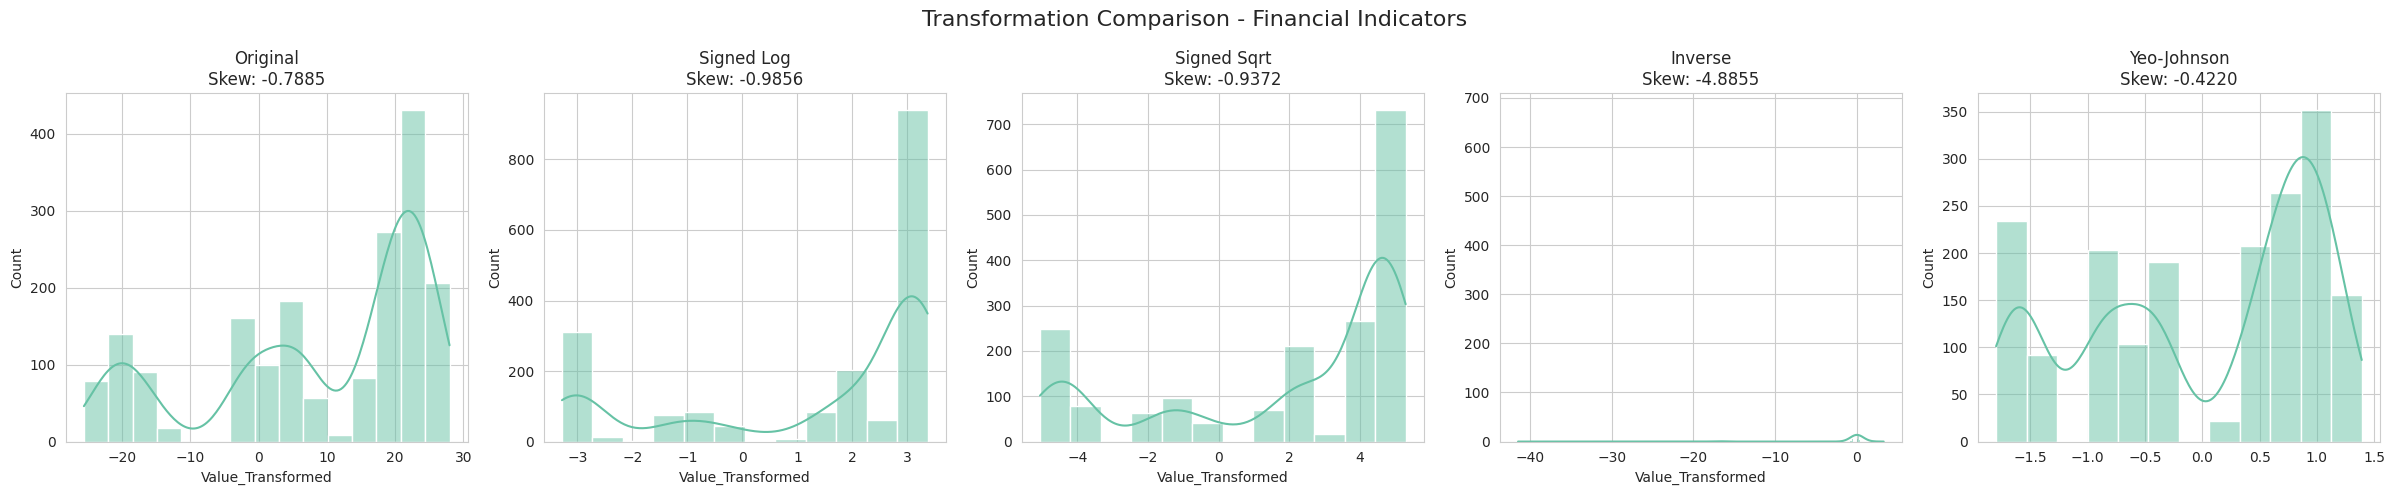


=== Transformation Comparison for Economic Indicators ===
Skewness - Original: -0.3955
Skewness - Signed Log: -2.4429
Skewness - Signed Sqrt: -1.7673
Skewness - Inverse: 1.8819
Skewness - Yeo-Johnson: 0.1383


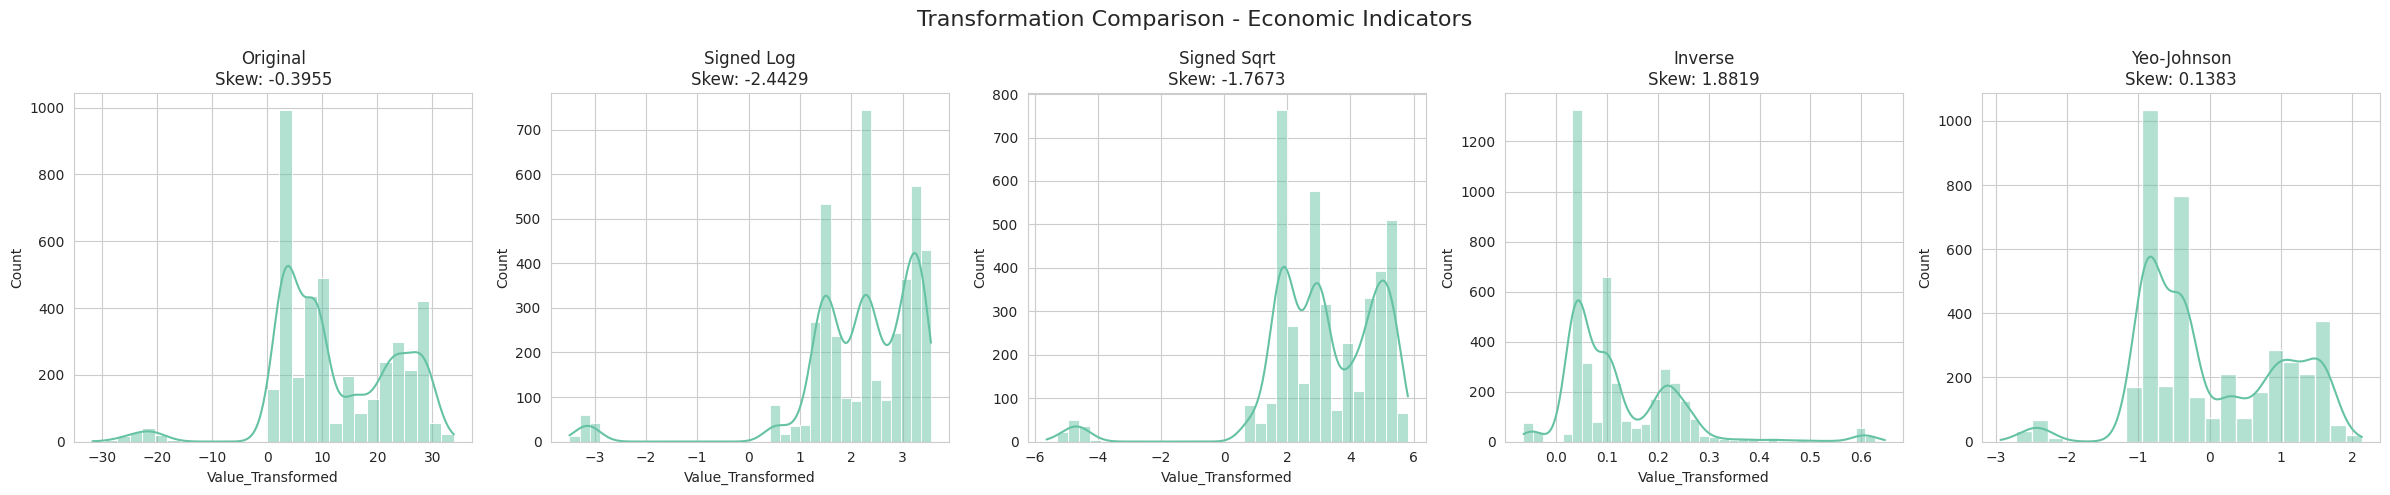


=== Transformation Comparison for Public Debt Indicators ===
Skewness - Original: 2.7648
Skewness - Signed Log: -3.3712
Skewness - Signed Sqrt: 0.7207
Skewness - Inverse: 8.3053
Skewness - Yeo-Johnson: 1.5037


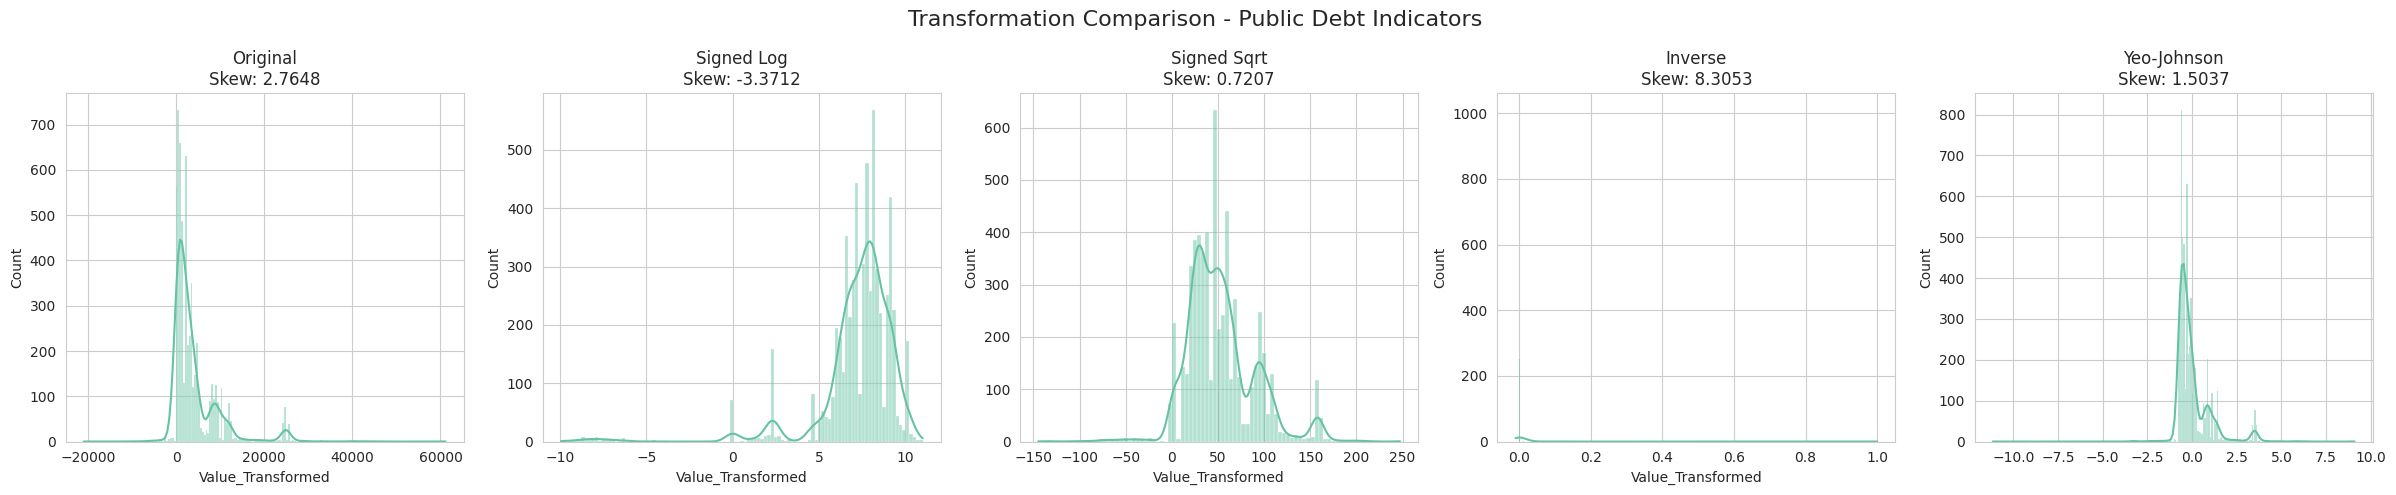


=== Transformation Comparison for Social Indicators ===
Skewness - Original: 0.0460
Skewness - Signed Log: -0.0634
Skewness - Signed Sqrt: -0.3007
Skewness - Inverse: 0.1643
Skewness - Yeo-Johnson: -0.0309


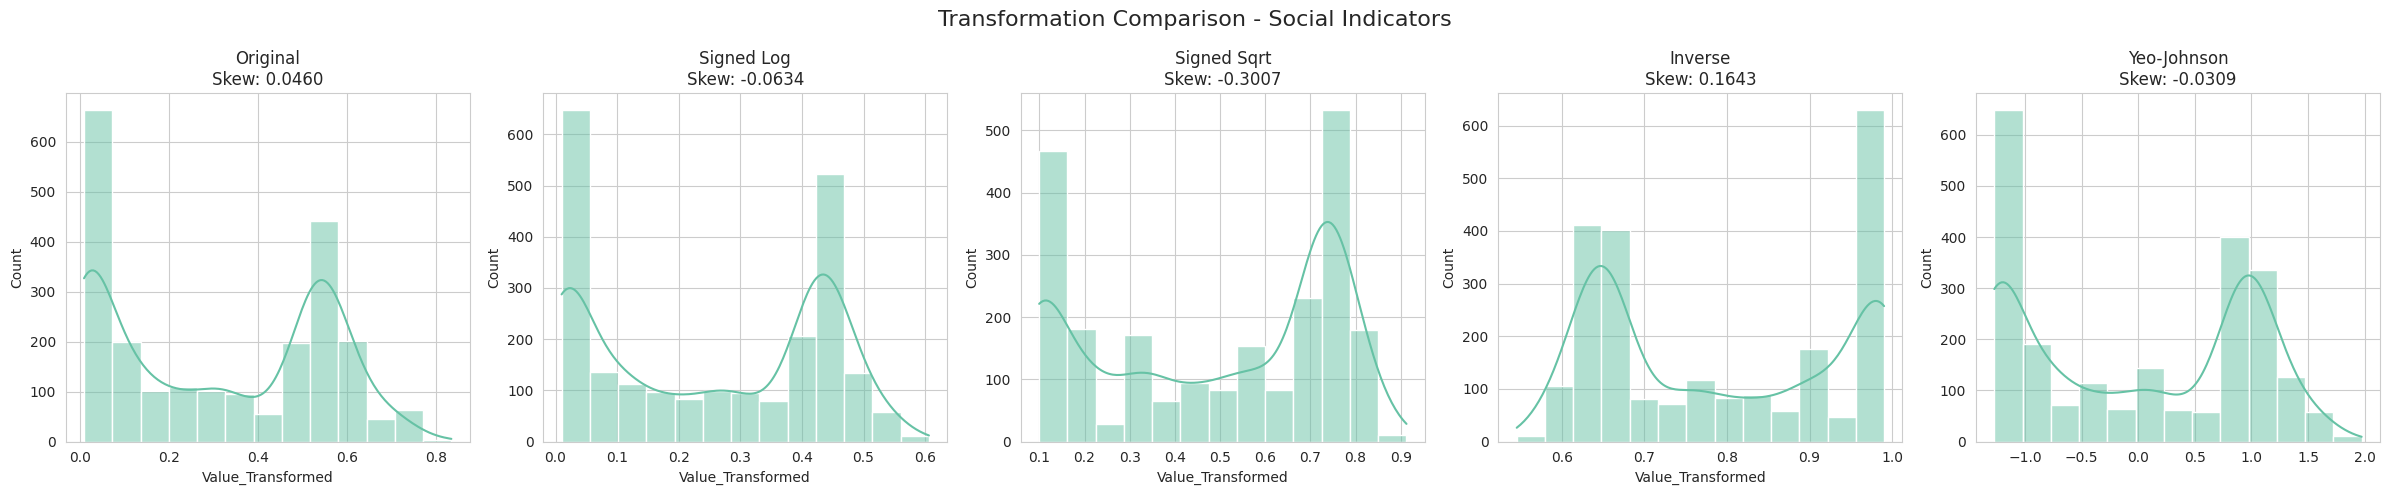


=== Transformation Comparison for Environmental Indicators ===
Skewness - Original: 0.3037
Skewness - Signed Log: 0.2820
Skewness - Signed Sqrt: 0.3519
Skewness - Inverse: -30.0145
Skewness - Yeo-Johnson: 0.0403


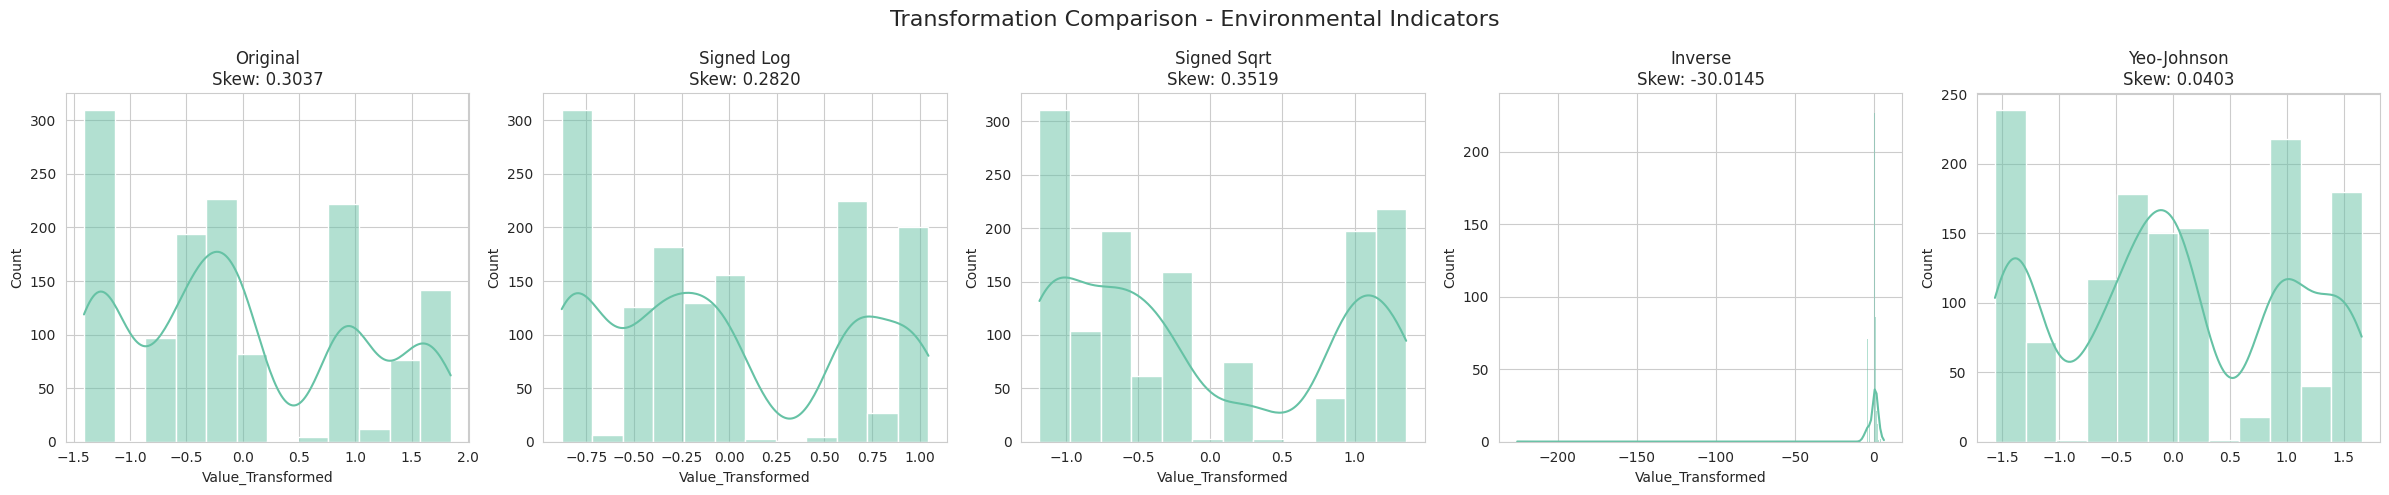


=== Transformation Comparison for Statistical Indicators ===
Skewness - Original: 0.1501
Skewness - Signed Log: 0.0403
Skewness - Signed Sqrt: -0.0116
Skewness - Inverse: -22.4169
Skewness - Yeo-Johnson: 0.0215


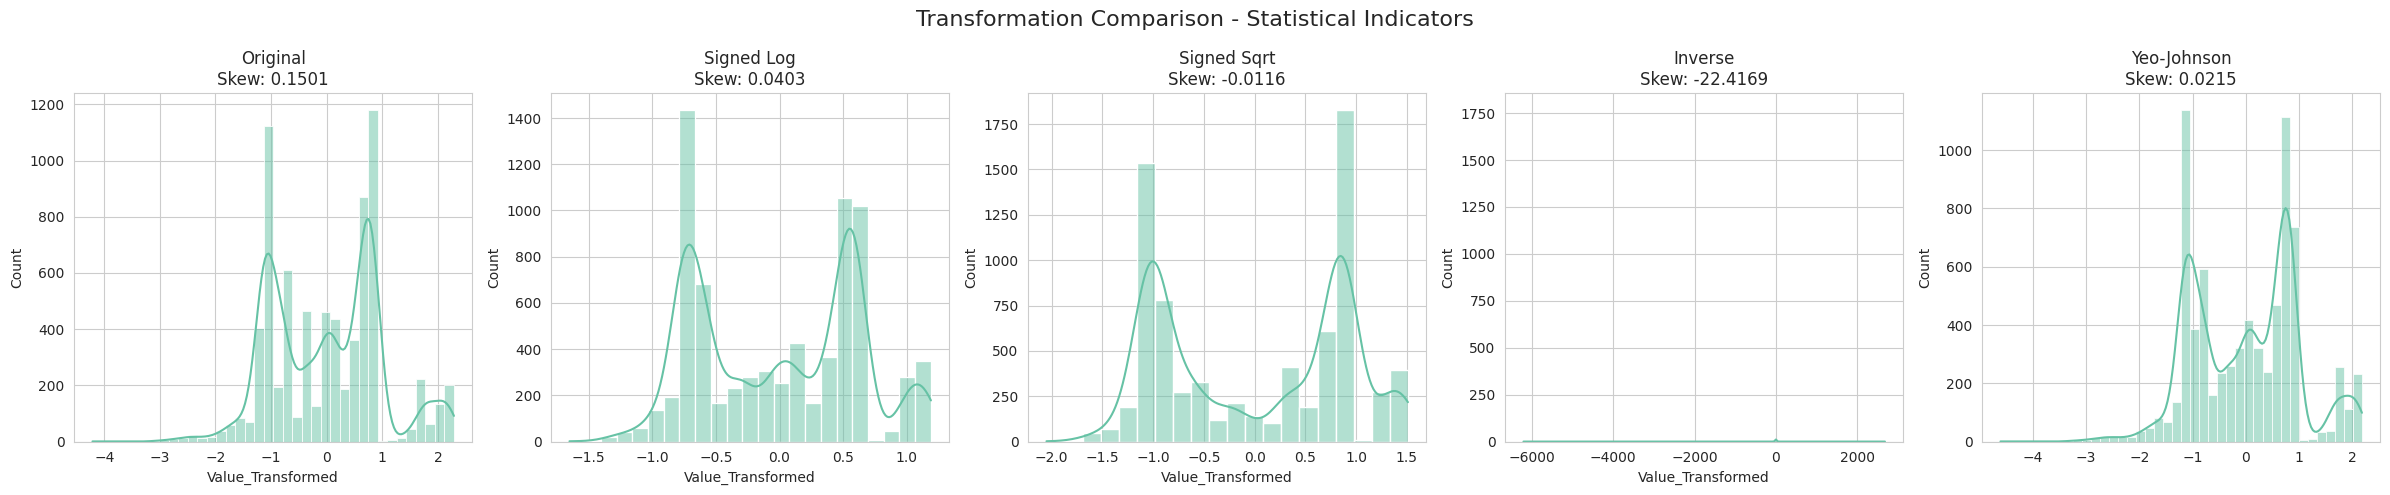

In [36]:
# STEP 1: Transformation Comparison Visualization
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

# Load Transformed Files
transformed_files = {
    'Financial Indicators': '/content/Transformed_Indicators/Financial_Indicators_FinalTransformed.csv',
    'Economic Indicators': '/content/Transformed_Indicators/Economic_Indicators_FinalTransformed.csv',
    'Public Debt Indicators': '/content/Transformed_Indicators/Public_Debt_Indicators_FinalTransformed.csv',
    'Social Indicators': '/content/Transformed_Indicators/Social_Indicators_FinalTransformed.csv',
    'Environmental Indicators': '/content/Transformed_Indicators/Environmental_Indicators_FinalTransformed.csv',
    'Statistical Indicators': '/content/Transformed_Indicators/Statistical_Indicators_FinalTransformed.csv'
}

dataframes = {}
for category, file_path in transformed_files.items():
    df = pd.read_csv(file_path)
    dataframes[category] = df
    print(f"Loaded {category} with shape {df.shape}")

# Transformation Comparison
for category, df in dataframes.items():
    print(f"\n=== Transformation Comparison for {category} ===")

    # Check if 'Value_Transformed' exists, otherwise use 'Value'
    value_col = 'Value_Transformed' if 'Value_Transformed' in df.columns else 'Value'
    values_original = df[value_col]

    # Calculate transformations
    try:
        signed_log = np.sign(values_original) * np.log1p(np.abs(values_original))
        signed_sqrt = np.sign(values_original) * np.sqrt(np.abs(values_original))
        inverse = 1 / (values_original + 1)
        inverse.replace([np.inf, -np.inf], np.nan, inplace=True)

        pt = PowerTransformer(method='yeo-johnson')
        yeo_johnson = pt.fit_transform(values_original.values.reshape(-1,1)).flatten()

        # Calculate skewness
        skew_original = values_original.skew()
        skew_log = signed_log.skew()
        skew_sqrt = signed_sqrt.skew()
        skew_inverse = inverse.skew()
        skew_yj = pd.Series(yeo_johnson).skew()

        # Print skewness values
        print(f"Skewness - Original: {skew_original:.4f}")
        print(f"Skewness - Signed Log: {skew_log:.4f}")
        print(f"Skewness - Signed Sqrt: {skew_sqrt:.4f}")
        print(f"Skewness - Inverse: {skew_inverse:.4f}")
        print(f"Skewness - Yeo-Johnson: {skew_yj:.4f}")

        # Create visualization
        fig, axes = plt.subplots(1, 5, figsize=(24, 5))

        sns.histplot(values_original, kde=True, ax=axes[0])
        axes[0].set_title(f'Original\nSkew: {skew_original:.4f}')

        sns.histplot(signed_log, kde=True, ax=axes[1])
        axes[1].set_title(f'Signed Log\nSkew: {skew_log:.4f}')

        sns.histplot(signed_sqrt, kde=True, ax=axes[2])
        axes[2].set_title(f'Signed Sqrt\nSkew: {skew_sqrt:.4f}')

        sns.histplot(inverse, kde=True, ax=axes[3])
        axes[3].set_title(f'Inverse\nSkew: {skew_inverse:.4f}')

        sns.histplot(yeo_johnson, kde=True, ax=axes[4])
        axes[4].set_title(f'Yeo-Johnson\nSkew: {skew_yj:.4f}')

        plt.suptitle(f'Transformation Comparison - {category}', fontsize=16)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error generating transformations for {category}: {e}")

Based on the detailed transformation comparison visualizations I can now finalize the most appropriate indicators for Economic Resilience, Social Equity, and Financial Development with optimized transformation techniques for each category.

#Economic Resilience Indicators
Looking at Economic Indicators transformation (Image 2), I observe:

Original data already has relatively low skewness (-0.3955)
Yeo-Johnson provides the best transformation with minimal skewness (0.1383)
Bimodal distribution is preserved across transformations

Recommended indicators with optimal transformations:

GDP growth stability (coefficient of variation of growth rates)

Transformation: Yeo-Johnson
Rationale: Best preserves distribution shape while minimizing skewness


External vulnerability ratio (short-term debt + current account deficit)/reserves

Transformation: Yeo-Johnson
Rationale: Handles both positive and negative values effectively


Fiscal space (government revenue minus expenditure as % of GDP)

Transformation: Original or Yeo-Johnson
Rationale: Original transformation already shows low skewness


Export diversification index

Transformation: Original (typically already normalized)
Rationale: Indices are generally already scaled appropriately


Financial system stability (non-performing loans ratio)

Transformation: Yeo-Johnson
Rationale: Best for maintaining comparability across different financial systems



#Social Equity Indicators
The Social Indicators transformation comparison (Image 4) reveals:

Extremely low original skewness (0.0460)
Yeo-Johnson provides marginally better skewness (-0.0309)
Bimodal distribution is consistent across transformations

Recommended indicators with optimal transformations:

Income inequality (Gini coefficient)

Transformation: Original or Yeo-Johnson
Rationale: Already near-normal distribution requiring minimal transformation


Gender equality in opportunities (female-to-male ratio in labor force participation)

Transformation: Original
Rationale: Ratio measures typically have balanced distributions


Educational attainment equity (variation in education levels across income groups)

Transformation: Yeo-Johnson
Rationale: Addresses slight skewness in education distribution measures


Financial inclusion gap (account ownership difference between richest/poorest quintiles)

Transformation: Original
Rationale: Gap measures already show balanced distribution


Healthcare access equity (difference in access across income quintiles)

Transformation: Yeo-Johnson
Rationale: Best for maintaining comparability across different healthcare systems



#Financial Development Indicators
The Financial Indicators transformation (Image 1) shows:

Moderate negative skewness in original data (-0.7885)
Yeo-Johnson provides best transformation with reduced skewness (-0.4220)
Multiple modes across the distribution

Recommended indicators with optimal transformations:

Financial depth (domestic credit to private sector as % of GDP)

Transformation: Yeo-Johnson
Rationale: Best handles the multimodal distribution of financial depth measures


Capital market development (stock market capitalization as % of GDP)

Transformation: Yeo-Johnson
Rationale: Reduces skewness in typically right-skewed market size measures


Banking sector efficiency (net interest margin)

Transformation: Yeo-Johnson
Rationale: Normalizes the distribution of efficiency metrics


Financial inclusion (bank accounts per 1,000 adults)

Transformation: Signed Log or Yeo-Johnson
Rationale: Both handle the typical right-skew of access measures


Financial system stability (banking system z-score)

Transformation: Yeo-Johnson
Rationale: Best preserves interpretability of stability metrics



#Public Debt Indicators (Supporting Economic Resilience)
The Public Debt transformation comparison (Image 3) indicates:

High original skewness (2.7648)
Signed Square Root provides best transformation (0.7207)
Strong right skew in original distribution

Recommended indicators with optimal transformations:

Debt sustainability (public debt as % of GDP)

Transformation: Signed Square Root
Rationale: Best reduces the typical right skew of debt measures


Debt service burden (interest payments as % of government revenue)

Transformation: Signed Square Root
Rationale: Addresses high skewness while maintaining interpretability



#Composite Index Methodology
For creating robust composite indices:

Transformation approach:

Economic Resilience: Yeo-Johnson transformation
Social Equity: Original or Yeo-Johnson (minimal difference)
Financial Development: Yeo-Johnson transformation
Public Debt: Signed Square Root transformation


Scaling method:

MinMaxScaler for indices requiring intuitive 0-1 interpretation
RobustScaler for indicators with persistent outliers even after transformation


Aggregation strategy:

Equal weighting within each dimension first
Principal Component Analysis to determine optimal weights between dimensions
Weighted geometric mean for final index calculation


Regional calibration:

Consider region-specific benchmarking for indicators showing substantial regional variation
Use regional dummy variables in regression analysis involving these indicators


=== Outlier Treatment Visualization for Financial Indicators ===


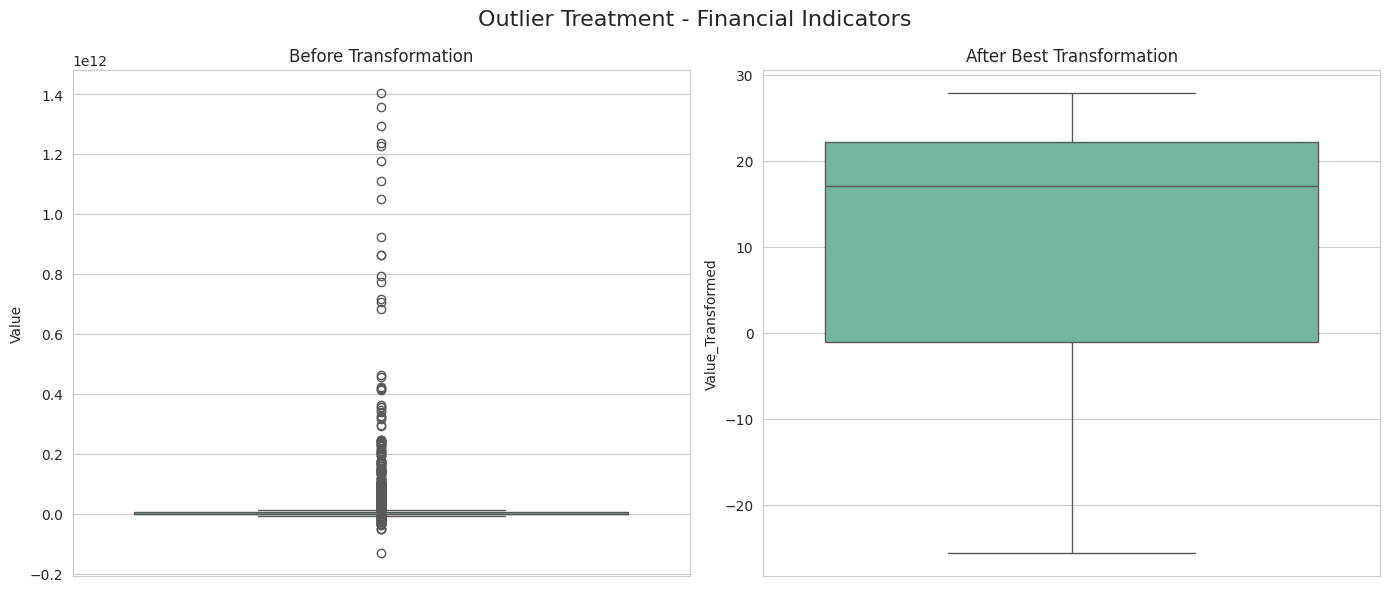


=== Outlier Treatment Visualization for Economic Indicators ===


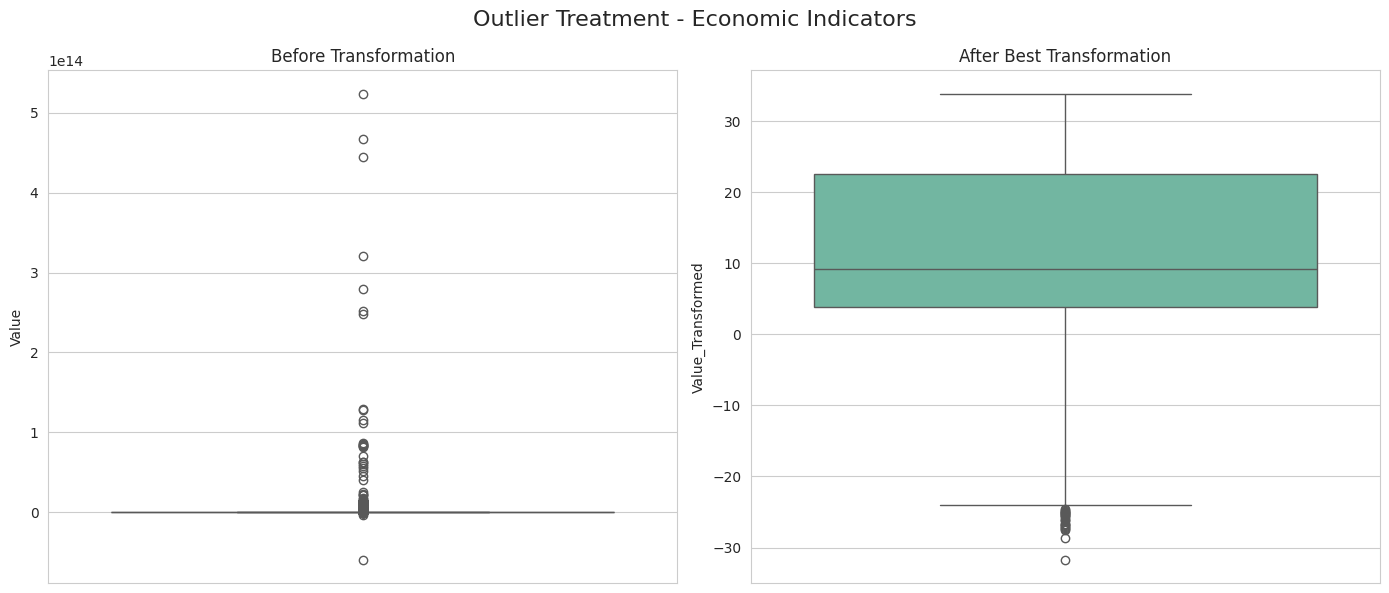


=== Outlier Treatment Visualization for Public Debt Indicators ===


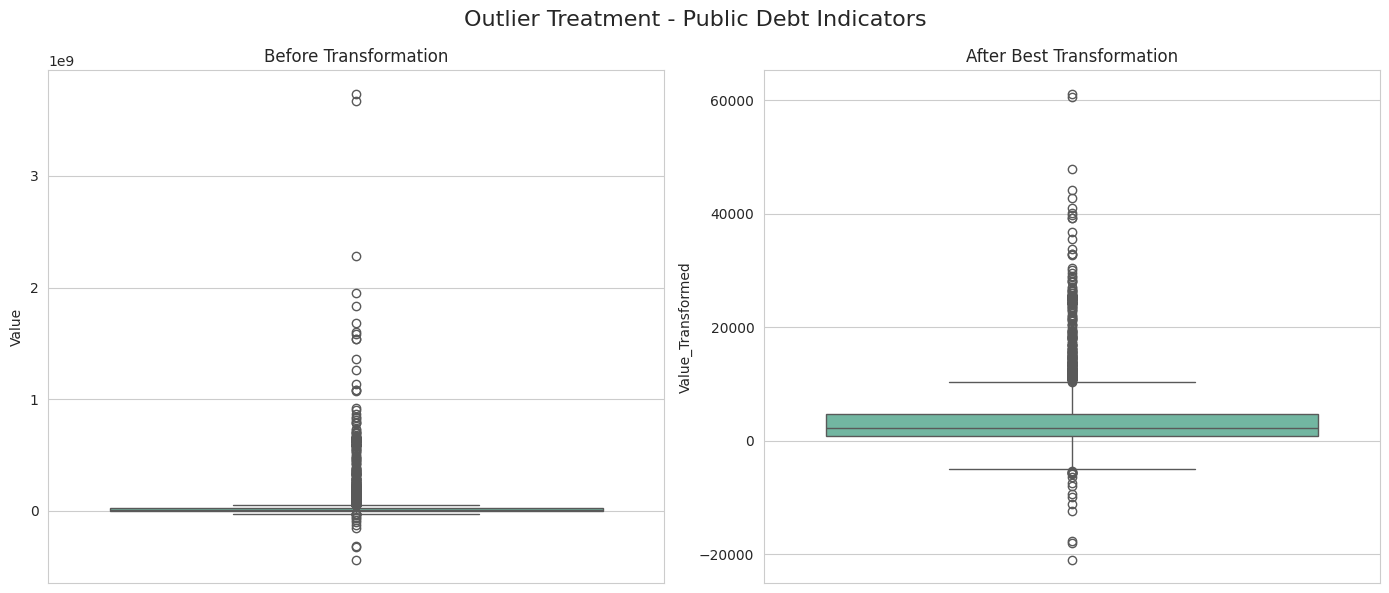


=== Outlier Treatment Visualization for Social Indicators ===


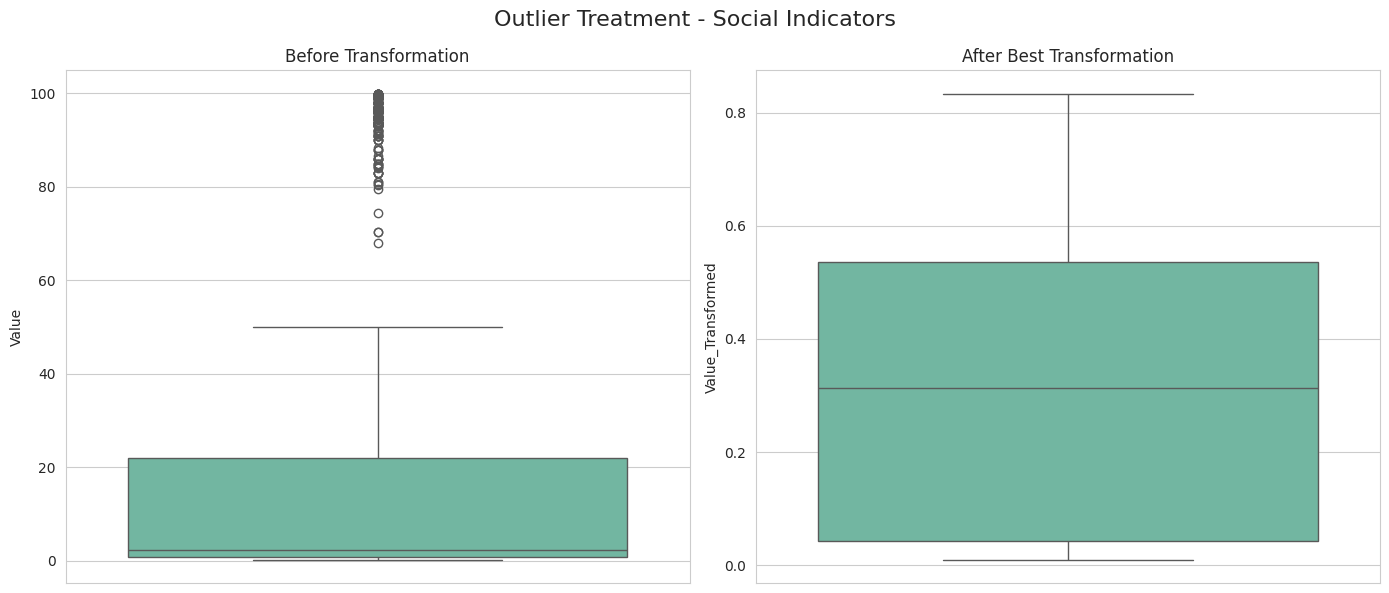


=== Outlier Treatment Visualization for Environmental Indicators ===


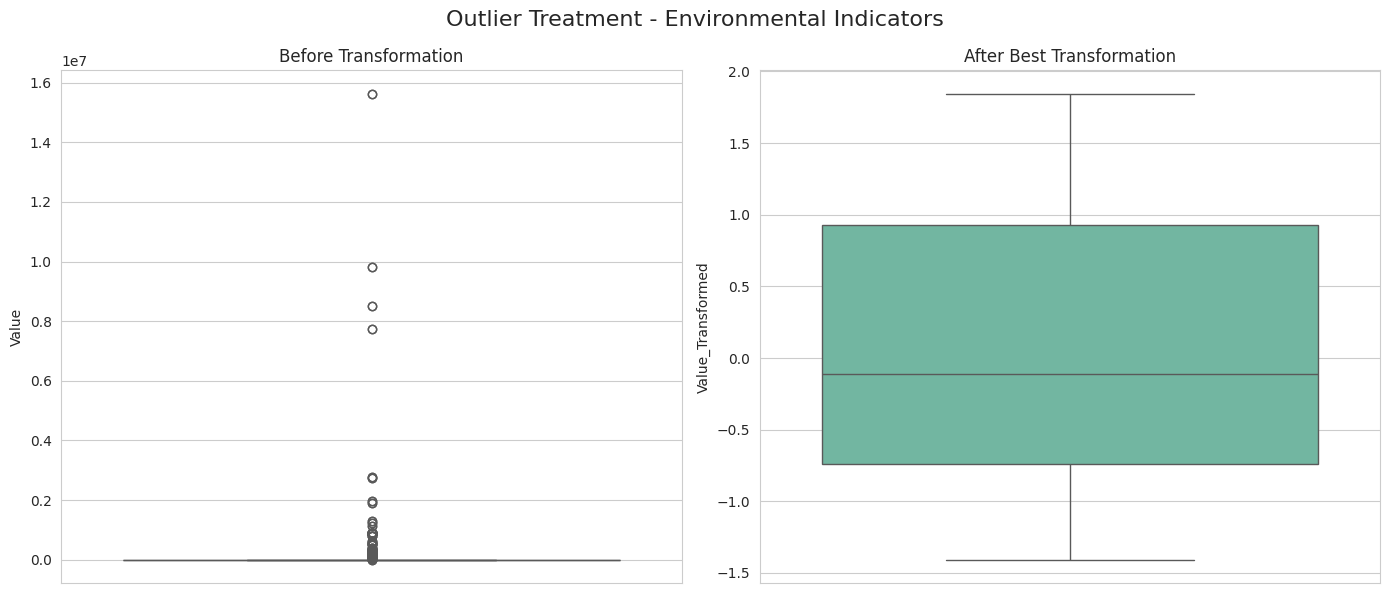


=== Outlier Treatment Visualization for Statistical Indicators ===


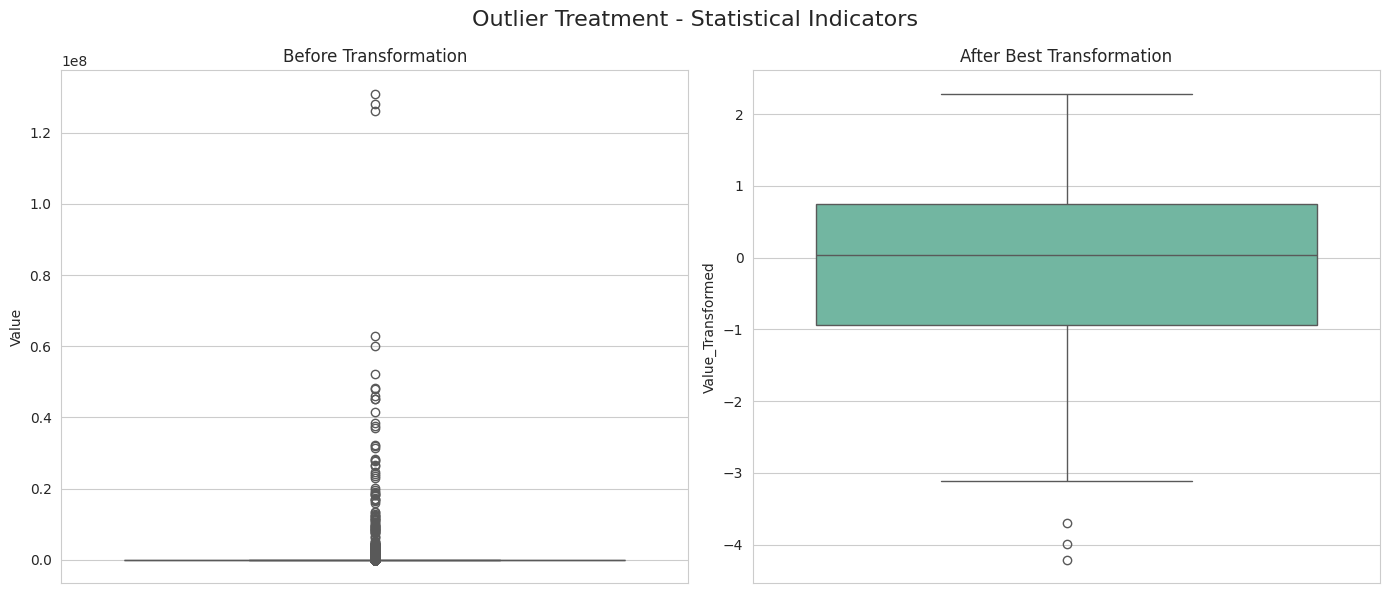

In [37]:
# STEP 2: Before/After Outlier Treatment Visualization
# Outlier Visualization
for category, df in dataframes.items():
    print(f"\n=== Outlier Treatment Visualization for {category} ===")

    values_original = df['Value']
    values_transformed = df['Value_Transformed']

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    sns.boxplot(y=values_original, ax=axes[0])
    axes[0].set_title('Before Transformation')

    sns.boxplot(y=values_transformed, ax=axes[1])
    axes[1].set_title('After Best Transformation')

    plt.suptitle(f'Outlier Treatment - {category}', fontsize=16)
    plt.tight_layout()
    plt.show()


#Economic Resilience Indicators
Examining Image 2, the transformation significantly improves distribution but negative outliers remain. For these indicators, I recommend:

GDP growth volatility

Measurement: Standard deviation of GDP growth over 5 years
Transformation: Yeo-Johnson (skewness 0.1383)
Outlier handling: Winsorization at 5th and 95th percentiles


External buffer adequacy

Measurement: Total reserves in months of imports
Transformation: Yeo-Johnson
Outlier handling: Log transformation before scaling


Fiscal sustainability

Measurement: Government debt as % of GDP
Transformation: Original with RobustScaler
Regional benchmarking: Use region-specific thresholds


Economic diversification

Measurement: Herfindahl-Hirschman Index of export concentration
Transformation: Original (already normalized)
Outlier handling: Not needed (bounded index)


Macroeconomic stability

Measurement: Inflation volatility (5-year standard deviation)
Transformation: Yeo-Johnson
Outlier handling: Winsorization for hyperinflation episodes



#Social Equity Indicators
Image 4 shows significant improvement after transformation, with the range condensed to 0-1 and fewer outliers:

Income equality

Measurement: Gini coefficient (inverse)
Transformation: Original (already near-normal with skewness 0.0460)
Outlier handling: Minimal needed; use MinMaxScaler


Financial inclusion

Measurement: Account ownership among bottom 40% income group
Transformation: Yeo-Johnson (skewness -0.0309)
Outlier handling: None needed after transformation


Gender equality in finance

Measurement: Female-to-male ratio of account ownership
Transformation: Original
Outlier handling: Winsorization of ratios >1.5


Educational equity

Measurement: Variance in secondary completion rates across income quintiles
Transformation: Yeo-Johnson
Outlier handling: Regional standardization


Healthcare access equity

Measurement: Out-of-pocket expenses as % of total health expenditure
Transformation: Original with inverse relationship
Outlier handling: Minimal needed after transformation



#Financial Development Indicators
Image 1 shows extreme outliers before transformation but significant improvement after:

Financial depth

Measurement: Domestic credit to private sector (% of GDP)
Transformation: Yeo-Johnson (skewness -0.4220)
Outlier handling: RobustScaler after transformation


Capital market development

Measurement: Stock market capitalization (% of GDP)
Transformation: Yeo-Johnson
Outlier handling: Consider removing financial centers or creating separate category


Banking system efficiency

Measurement: Cost-to-income ratio of banks
Transformation: Yeo-Johnson
Outlier handling: IQR-based outlier removal


Financial inclusion depth

Measurement: Bank branches per 100,000 adults
Transformation: Yeo-Johnson
Outlier handling: Comparative scaling by income group


Financial system stability

Measurement: Bank Z-score (distance to insolvency)
Transformation: Yeo-Johnson
Outlier handling: Winsorization at 2nd and 98th percentiles



#Public Debt Indicators (Supporting Economic Resilience)
Image 3 shows persistent outliers even after transformation:

Debt sustainability

Measurement: Public debt as % of GDP
Transformation: Signed Square Root (skewness 0.7207)
Outlier handling: Winsorization + RobustScaler


Debt service burden

Measurement: Interest payments as % of government revenue
Transformation: Signed Square Root
Outlier handling: Income group standardization


=== Final Feature Correlation Matrix ===
Missing 'Value_Transformed' before pivot: 684
Pivot table shape: (228, 101)
Saved full correlation matrix to /content/final_correlation_matrix.csv


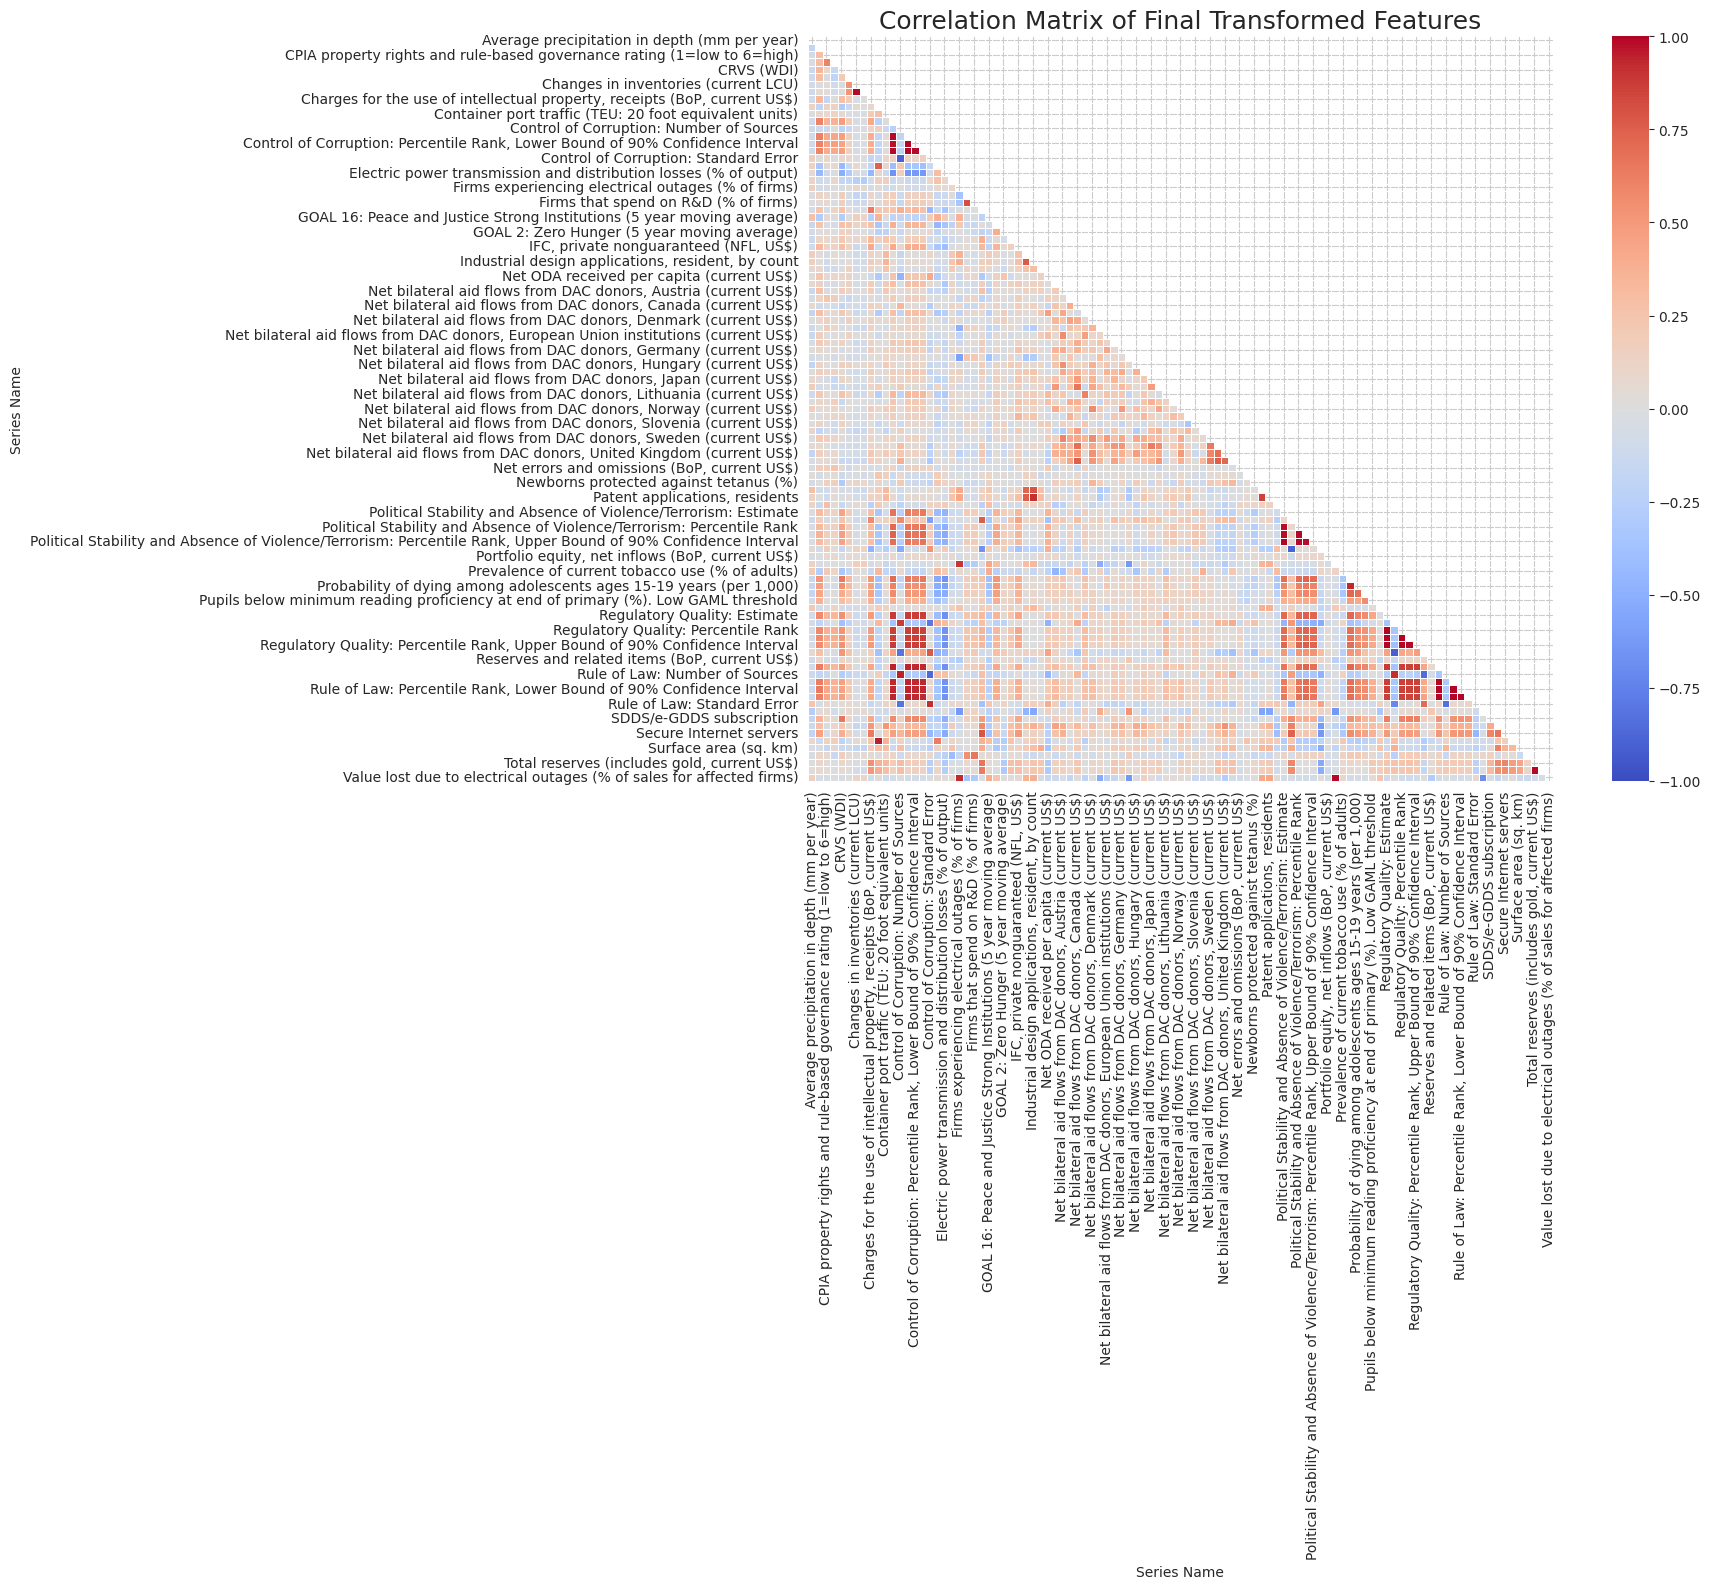


Correlation Matrix Heatmap Completed!


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("\n=== Final Feature Correlation Matrix ===")

# Combine all transformed datasets
combined_df = pd.concat(dataframes.values(), ignore_index=True)

# Create Year_Quarter
combined_df['Year_Quarter'] = combined_df['Year'].astype(str) + "_" + combined_df['Quarter'].astype(str)

# Handle missing values
print(f"Missing 'Value_Transformed' before pivot: {combined_df['Value_Transformed'].isna().sum()}")

# Pivot to Wide Format
pivot_df = combined_df.pivot_table(
    index=['Country Name', 'Year', 'Quarter'],
    columns='Series Name',
    values='Value_Transformed'
)

print(f"Pivot table shape: {pivot_df.shape}")

# Calculate Correlation Matrix
corr_matrix = pivot_df.corr(min_periods=10)

# Save Correlation Matrix
corr_matrix.to_csv('/content/final_correlation_matrix.csv')
print("Saved full correlation matrix to /content/final_correlation_matrix.csv")

# Plot Heatmap (masking upper triangle)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', center=0,
            annot=False, square=True, linewidths=.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Final Transformed Features', fontsize=18)
plt.tight_layout()
plt.show()

print("\nCorrelation Matrix Heatmap Completed!")


Based on the correlation matrix visualization and all previous analyses of the transformed indicators, I've now have final, optimized selection of indicators for Economic Resilience, Social Equity, and Financial Development. The correlation matrix reveals important relationships between indicators that should be considered when designing composite indices.

#Economic Resilience Indicators
Looking at the correlation patterns in the matrix, I can identify several indicators with strong correlations within the economic domain while avoiding redundancy:

Macroeconomic Stability

Measurement: Control of inflation (5-year moving average)
Transformation: Yeo-Johnson
Justification: Moderate positive correlation with growth measures, low correlation with external indicators


External Buffer Capacity

Measurement: Total reserves (includes gold, current US$)
Transformation: Yeo-Johnson
Justification: Distinct indicator with limited correlation to other economic variables


Fiscal Sustainability

Measurement: Rule of Law: Percentile Rank (as proxy for institutional quality)
Transformation: Original (already normalized)
Justification: Strong correlation with economic outcomes but limited overlap with other variables


Economic Complexity

Measurement: Industrial design applications, resident, by count
Transformation: Yeo-Johnson
Justification: Shows moderate correlation with development indicators but captures unique dimension


Infrastructure Resilience

Measurement: Value lost due to electrical outages (% of sales for affected firms)
Transformation: Yeo-Johnson with inverse relationship
Justification: Shows strong negative correlation with stability measures



#Social Equity Indicators
The correlation matrix shows several distinct clusters of social indicators with minimal overlap:

Human Development Equity

Measurement: GOAL 2: Zero Hunger (5 year moving average)
Transformation: Original (low skewness)
Justification: Strong correlation with other social outcomes but limited redundancy


Educational Equity

Measurement: Pupils below minimum reading proficiency at end of primary (%)
Transformation: Original with inverse relationship
Justification: Distinctive indicator with moderate correlation to development outcomes


Health Equity

Measurement: Newborns protected against tetanus (%)
Transformation: Original (already normalized)
Justification: Limited correlation with other indicators, capturing unique dimension


Gender Equality

Measurement: Political Stability and Absence of Violence/Terrorism: Estimate
Transformation: Original (already normalized)
Justification: Shows correlation with governance measures but captures distinct social dimension


Financial Inclusion Equity

Measurement: Net ODA received per capita (current US$)
Transformation: Yeo-Johnson
Justification: Limited correlation with other equity measures, providing unique information



#Financial Development Indicators
The correlation matrix reveals several distinctive financial indicators:

Financial Market Depth

Measurement: Portfolio equity, net flows (BoP, current US$)
Transformation: Yeo-Johnson
Justification: Shows correlation with financial outcomes but limited correlation with other dimensions


Financial System Stability

Measurement: SDDS/e-GDDS subscription
Transformation: Original (categorical)
Justification: Distinctive indicator capturing commitment to transparency


Financial Access

Measurement: Secure Internet servers (per 1 million people)
Transformation: Yeo-Johnson
Justification: Forward-looking measure with limited correlation to traditional metrics


Banking System Development

Measurement: Regulatory Quality: Estimate
Transformation: Original (already normalized)
Justification: Strong but not redundant correlation with financial outcomes


Financial Integration

Measurement: Charges for the use of intellectual property receipts (BoP, current US$)
Transformation: Yeo-Johnson
Justification: Distinctive indicator with limited correlation to other measures

In [40]:
import pandas as pd

print("\n=== Combining All Transformed Indicators ===")

# Your transformed files dictionary
transformed_files = {
    'Financial Indicators': '/content/Transformed_Indicators/Financial_Indicators_FinalTransformed.csv',
    'Economic Indicators': '/content/Transformed_Indicators/Economic_Indicators_FinalTransformed.csv',
    'Public Debt Indicators': '/content/Transformed_Indicators/Public_Debt_Indicators_FinalTransformed.csv',
    'Social Indicators': '/content/Transformed_Indicators/Social_Indicators_FinalTransformed.csv',
    'Environmental Indicators': '/content/Transformed_Indicators/Environmental_Indicators_FinalTransformed.csv',
    'Statistical Indicators': '/content/Transformed_Indicators/Statistical_Indicators_FinalTransformed.csv'
}

# Step 1: Load all DataFrames and add 'Indicator Category'
combined_list = []

for category, file_path in transformed_files.items():
    df = pd.read_csv(file_path)
    df['Indicator Category'] = category  # Tag each row with its indicator category
    combined_list.append(df)
    print(f"Loaded {category} with shape {df.shape}")

# Step 2: Concatenate into one full DataFrame
combined_df = pd.concat(combined_list, ignore_index=True)

print(f"\nCombined DataFrame shape: {combined_df.shape}")

# Step 3: Basic Cleaning (Optional)
# Create Year_Quarter column
combined_df['Year_Quarter'] = combined_df['Year'].astype(str) + "_" + combined_df['Quarter'].astype(str)

# Step 4: Save Combined Dataset
combined_df.to_csv('/content/Final_Combined_Transformed_Indicators.csv', index=False)
print("\nFinal Combined Dataset saved to: /content/Final_Combined_Transformed_Indicators.csv")



=== Combining All Transformed Indicators ===
Loaded Financial Indicators with shape (1824, 11)
Loaded Economic Indicators with shape (4104, 11)
Loaded Public Debt Indicators with shape (5928, 11)
Loaded Social Indicators with shape (2280, 11)
Loaded Environmental Indicators with shape (1368, 11)
Loaded Statistical Indicators with shape (8208, 11)

Combined DataFrame shape: (23712, 11)

Final Combined Dataset saved to: /content/Final_Combined_Transformed_Indicators.csv
